In [1]:
import pandas as pd

#yelp_business = pd.read_json('yelp_academic_dataset_business.json')


# read the entire file into a python array
with open('yelp_academic_dataset_business.json', 'rb') as f:
    data = f.readlines()

# remove the trailing "\n" from each line
data = map(lambda x: x.rstrip(), data)

# each element of 'data' is an individual JSON object.
# i want to convert it into an *array* of JSON objects
# which, in and of itself, is one large JSON object
# basically... add square brackets to the beginning
# and end, and have all the individual business JSON objects
# separated by a comma
data_json_str = b'[' + b','.join(data) + b']'

# now, load it into pandas
data_df = pd.read_json(data_json_str)
data_df.head(10)

C:\Users\Robert\Anaconda3\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


attributes             business_id  \
0  {'Alcohol': 'none', 'Outdoor Seating': False, ...  5UmKMjUEUNdYWqANhGckJw   
1  {'Happy Hour': True, 'Accepts Credit Cards': T...  UsFtqoBl7naz8AVUBZMjQQ   
2                                                 {}  3eu6MEFlq2Dg7bQh8QbdOg   
3                            {'Good for Kids': True}  cE27W9VPgO88Qxe4ol6y_g   
4  {'Parking': {'lot': False, 'validated': False,...  HZdLhv6COCleJMo7nPl-RA   
5  {'Alcohol': 'full_bar', 'Coat Check': False, '...  mVHrayjG3uZ_RLHkLj-AMg   
6                           {'Good for Kids': False}  VHYT1qgQw5JvXAlUDhTArA   
7  {'Alcohol': 'full_bar', 'Coat Check': False, '...  KayYbHCt-RkbGcPdGOThNg   
8                                                 {}  b12U9TFESStdy7CsTtcOeg   
9                            {'Good for Kids': True}  Sktj1eHQFuVa-M4bgnEh8g   

                                          categories         city  \
0                           [Fast Food, Restaurants]   Dravosburg   
1                                        [Nightlife]   Dravosburg   
2                          [Auto Repair, Automotive]   Dravosburg   
3                     [Active Life, Mini Golf, Golf]  Bethel Park   
4  [Shopping, Home Services, Internet Service Pro...   Pittsburgh   
5  [Bars, American (New), Nightlife, Lounges, Res...       rankin   
6     [Active Life, Trainers, Fitness & Instruction]   Pittsburgh   
7  [Bars, American (Traditional), Nightlife, Rest...     Carnegie   
8                   [Auto Repair, Automotive, Tires]     Carnegie   
9                           [Active Life, Mini Golf]     Carnegie   

                                       full_address  \
0      4734 Lebanon Church Rd\nDravosburg, PA 15034   
1              202 McClure St\nDravosburg, PA 15034   
2                 1 Ravine St\nDravosburg, PA 15034   
3           1530 Hamilton Rd\nBethel Park, PA 15234   
4     301 South Hills Village\nPittsburgh, PA 15241   
5                 414 Hawkins Ave\nrankin, PA 15104   
6  2101 Greentree Rd Ste B201\nPittsburgh, PA 15220   
7   141 Hawthorne St\nGreentree\nCarnegie, PA 15106   
8           718A Hope Hollow Rd\nCarnegie, PA 15106   
9     920 Forsythe Rd\nCarnegie\nCarnegie, PA 15106   

                                               hours   latitude  longitude  \
0  {'Friday': {'close': '21:00', 'open': '11:00'}...  40.354327 -79.900706   
1                                                 {}  40.350553 -79.886814   
2                                                 {}  40.350956 -79.889059   
3                                                 {}  40.354115 -80.014660   
4  {'Saturday': {'close': '21:00', 'open': '10:00...  40.357620 -80.059980   
5  {'Friday': {'close': '20:00', 'open': '10:00'}...  40.413464 -79.880247   
6                                                 {}  40.390386 -80.070897   
7  {'Saturday': {'close': '02:00', 'open': '12:00...  40.415517 -80.067534   
8  {'Saturday': {'close': '16:00', 'open': '07:30...  40.394588 -80.084454   
9                                                 {}  40.405404 -80.076267   

                               name neighborhoods   open  review_count  stars  \
0                         Mr Hoagie            []   True             4    4.5   
1                      Clancy's Pub            []   True             4    3.5   
2                  Joe Cislo's Auto            []   True             3    5.0   
3          Cool Springs Golf Center            []  False             5    2.5   
4                           Verizon            []   True             5    2.5   
5                     Emil's Lounge            []   True            20    5.0   
6                 Extreme Fitness 2            []   True             3    2.5   
7             Alexion's Bar & Grill   [Greentree]   True            21    4.0   
8     Flynn's Tire And Auto Service            []   True             7    2.5   
9  Forsythe Miniature Golf & Snacks    [Carnegie]  False             4    4.0   

  state      type  
0    PA  business  
1   

In [2]:
types = set()
for i in data_df['type']:
    types.add(i)

print(types)


{'business'}


In [3]:
print(type(data_df['attributes'][0]))

<class 'dict'>


In [4]:
attributes = {}
import sys
rest_data_df = data_df[['Restaurants' in x for x in data_df['categories']]]
print(len(rest_data_df))
#rest_data_df = #pd.DataFrame(columns = data_df.columns.values)
#index = 0
#for i in data_df.itertuples():
#    if 'Restaurants' in i[3]:
#        rest_data_df.loc[index] = data_df.loc[i[0]] 
#        index += 1
     
count = 0.0
index = 0.0
from collections import defaultdict
counts = defaultdict(int)
for attr in rest_data_df['attributes']:
    counts[len(attr)] += 1
    index += 1
    for att in attr:
        if att not in attributes:
            attributes[att] = set()
        type1 = type(attr[att])
        if type1 is dict:
            for i in attr[att].values():
                if i != True and i != False:
                    sys.exit("Not true or false")
        
        attributes[att].add(type1)
print(counts)  
print(sum(counts.values()))
print(index)        
for a in attributes:
    print (a, attributes[a])
    print

25071
defaultdict(<class 'int'>, {0: 415, 1: 179, 2: 201, 3: 286, 4: 251, 5: 288, 6: 252, 7: 248, 8: 310, 9: 323, 10: 451, 11: 500, 12: 644, 13: 779, 14: 1071, 15: 940, 16: 1255, 17: 1874, 18: 4560, 19: 5250, 20: 2043, 21: 588, 22: 469, 23: 596, 24: 705, 25: 396, 26: 97, 27: 58, 28: 32, 29: 7, 30: 2, 31: 1})
25071
25071.0
Alcohol {<class 'str'>}
Coat Check {<class 'bool'>}
Happy Hour {<class 'bool'>}
Delivery {<class 'bool'>}
BYOB/Corkage {<class 'str'>}
Good for Kids {<class 'bool'>}
Drive-Thru {<class 'bool'>}
Smoking {<class 'str'>}
Good For Dancing {<class 'bool'>}
Good For Groups {<class 'bool'>}
Takes Reservations {<class 'bool'>}
Order at Counter {<class 'bool'>}
Parking {<class 'dict'>}
Has TV {<class 'bool'>}
Wi-Fi {<class 'str'>}
Outdoor Seating {<class 'bool'>}
Good For {<class 'dict'>}
Accepts Insurance {<class 'bool'>}
Ages Allowed {<class 'str'>}
BYOB {<class 'bool'>}
Ambience {<class 'dict'>}
Open 24 Hours {<class 'bool'>}
Dogs Allowed {<class 'bool'>}
Music {<class 'dic

In [5]:

    
def printStuff(attributeName):
    yesses = 0.0
    yesStars = 0.0
    nos = 0.0
    nosStars = 0.0
    for attr in data_df['attributes']:
        for att in attr:
            if att == attributeName:
                if attr[att] == True:
                    yesses += 1.0
                    #yesStars += 
                else:
                    nos += 1.0

    print (nos)
    print (yesses)
    print ("percent discussing", attributeName, (yesses+nos) / len(data_df))
    print ("of those discussing, yesses", yesses/(yesses+nos))
    print ("of those discussing, noes", nos/(yesses+nos)  )
    print ("\n\n")

for attributeName in attributes:
    for t in attributes[attributeName]:
        if t == type(True):
            printStuff(attributeName)
    


3914.0
484.0
percent discussing Coat Check 0.056788688746852604
of those discussing, yesses 0.110050022737608
of those discussing, noes 0.889949977262392



1339.0
3233.0
percent discussing Happy Hour 0.05903544450900639
of those discussing, yesses 0.7071303587051618
of those discussing, noes 0.29286964129483817



18894.0
4730.0
percent discussing Delivery 0.30504228807540834
of those discussing, yesses 0.20022011513714866
of those discussing, noes 0.7997798848628513



6188.0
24140.0
percent discussing Good for Kids 0.39160694686551745
of those discussing, yesses 0.7959641255605381
of those discussing, noes 0.2040358744394619



1830.0
1495.0
percent discussing Drive-Thru 0.042933694880237586
of those discussing, yesses 0.4496240601503759
of those discussing, noes 0.5503759398496241



3277.0
1172.0
percent discussing Good For Dancing 0.05744722060817354
of those discussing, yesses 0.26342998426612724
of those discussing, noes 0.7365700157338728



2845.0
23166.0
percent discussing G

In [130]:
count = 0.0
total = len(data_df.categories.index)
for cats in data_df['categories']:
    if 'Restaurants' in cats:
        count += 1
print(count, total, count/total)

25071.0 77445 0.32372651559171023


In [8]:
#for tableau
#writer = pd.ExcelWriter('pandas.xlsx', engine = 'xlsxwriter')
#rest_data_df.to_excel(writer, sheet_name = 'Sheet1')
#writer.save()

In [9]:
print(data_df.size)

1161675


In [10]:
len(data_df.index)

77445

In [128]:
count = 0.0
total = len(rest_data_df.state.index)
for cats in rest_data_df['state']:
    if cats == 'TX':
        count += 1
print(count, total, count/total)

1.0 25071 3.988672171034263e-05


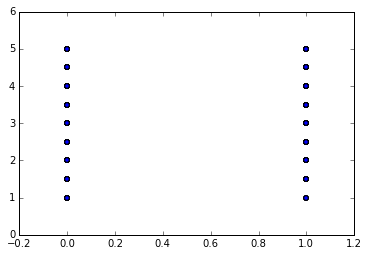

In [126]:
attrName = 'Takes Reservations'

indep_data = [(x[attrName],y) for x,y in zip(rest_data_df['attributes'],rest_data_df['stars']) if attrName in x]
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter([x[0] for x in indep_data], [x[1] for x in indep_data])


In [146]:
import numpy as np
print('Mean star review: {}'.format(np.mean(data_df['stars'])))
print('Standard deviation of reviews: {}'.format(np.std(data_df['stars'])))
print('Mean star review (restaurants): {}'.format(np.mean(rest_data_df['stars'])))
print('Standard deviation of reviews (restaurants): {}'.format(np.std(rest_data_df['stars'])))
starSet = set()
for rest in rest_data_df['stars']:
    starSet.add(rest)
print(sorted(list(starSet)))

Mean star review: 3.6934146813867907
Standard deviation of reviews: 0.9313399861997561
Mean star review (restaurants): 3.4821108053129115
Standard deviation of reviews (restaurants): 0.7495155973932881
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [131]:
#add column when encountering new attribute

import numpy as np
#attrName = 'Takes Reservations'
attributes = set()
for rest in rest_data_df['attributes']:
    attributes.update([x for x in rest if type(rest[x]) != dict])
print(attributes)

for attrName in attributes:
    rest_data_df.loc[:,attrName] = [attr[attrName] if attrName in attr else None for attr in rest_data_df['attributes']]
rest_data_df.head()

{'Alcohol', 'Coat Check', 'Happy Hour', 'Delivery', 'Good for Kids', 'Wheelchair Accessible', 'Good For Dancing', 'Wi-Fi', 'Accepts Insurance', 'Outdoor Seating', 'BYOB', 'Caters', 'Noise Level', 'Ages Allowed', 'Attire', 'Open 24 Hours', 'Drive-Thru', 'Smoking', 'Good For Groups', 'Takes Reservations', 'Order at Counter', 'Accepts Credit Cards', 'Has TV', 'Corkage', 'Dogs Allowed', 'Take-out', 'BYOB/Corkage', 'By Appointment Only', 'Price Range', 'Waiter Service'}


C:\Users\Robert\Anaconda3\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


attributes  \
0   {'Alcohol': 'none', 'Outdoor Seating': False, 'Good For': {'dessert': False, 'breakfas...   
5   {'Alcohol': 'full_bar', 'Coat Check': False, 'Happy Hour': False, 'Attire': 'casual', ...   
7   {'Alcohol': 'full_bar', 'Coat Check': False, 'Happy Hour': True, 'Attire': 'casual', '...   
14  {'Alcohol': 'none', 'Outdoor Seating': False, 'Good For': {'dessert': False, 'breakfas...   
18  {'Alcohol': 'full_bar', 'Coat Check': False, 'Attire': 'casual', 'Good for Kids': True...   

               business_id  \
0   5UmKMjUEUNdYWqANhGckJw   
5   mVHrayjG3uZ_RLHkLj-AMg   
7   KayYbHCt-RkbGcPdGOThNg   
14  wJr6kSA5dchdgOdwH6dZ2w   
18  fNGIbpazjTRdXgwRY_NIXA   

                                                            categories  \
0                                             [Fast Food, Restaurants]   
5              [Bars, American (New), Nightlife, Lounges, Restaurants]   
7               [Bars, American (Traditional), Nightlife, Restaurants]   
14  [Burgers, Breakfast & Brunch, American (Traditional), Restaurants]   
18     [Bars, American (Traditional), Nightlife, Lounges, Restaurants]   

          city                                     full_address  \
0   Dravosburg     4734 Lebanon Church Rd\nDravosburg, PA 15034   
5       rankin                414 Hawkins Ave\nrankin, PA 15104   
7     Carnegie  141 Hawthorne St\nGreentree\nCarnegie, PA 15106   
14    Carnegie         2100 Washington Pike\nCarnegie, PA 15106   
18    Carnegie          1201 Washington Ave\nCarnegie, PA 15106   

                                                                                        hours  \
0   {'Friday': {'close': '21:00', 'open': '11:00'}, 'Thursday': {'close': '21:00', 'open':...   
5   {'Friday': {'close': '20:00', 'open': '10:00'}, 'Saturday': {'close': '16:00', 'open':...   
7   {'Saturday': {'close': '02:00', 'open': '12:00'}, 'Thursday': {'close': '02:00', 'open...   
14  {'Saturday': {'close': '02:00', 'open': '08:00'}, 'Thursday': {'close': '02:00', 'open...   
18  {'Saturday': {'close': '23:00', 'open': '11:00'}, 'Thursday': {'close': '23:00', 'open...   

     latitude  longitude                     name neighborhoods    ...      \
0   40.354327 -79.900706                Mr Hoagie            []    ...       
5   40.413464 -79.880247            Emil's Lounge            []    ...       
7   40.415517 -80.067534    Alexion's Bar & Grill   [Greentree]    ...       
14  40.387512 -80.093215  Kings Family Restaurant            []    ...       
18  40.396469 -80.084942           Rocky's Lounge            []    ...       

   background_music  video  karaoke dairy-free kosher halal gluten-free vegan  \
0               NaN    NaN      NaN        NaN    NaN   NaN         NaN   NaN   
5               NaN    NaN      NaN        NaN    NaN   NaN         NaN   NaN   
7               NaN    NaN      NaN        NaN    NaN   NaN         NaN   NaN   
14              NaN    NaN      NaN        NaN    NaN   NaN         NaN   NaN   
18              NaN    NaN      NaN        NaN    NaN   NaN         NaN   NaN   

   soy-free vegetarian  
0       NaN        NaN  
5       NaN        NaN  
7       NaN        NaN  
14      NaN        NaN  
18      NaN        NaN  

[5 rows x 78 columns]

In [15]:
#pairing two columns
attrName = 'Takes Reservations'
attr_data = [(x[attrName],y)  for x,y in zip(rest_data_df['attributes'],rest_data_df['stars']) if attrName in x]
#print(attr_data)

In [16]:
levels = defaultdict(set)
#dict of attributes and their levels
for rest in rest_data_df['attributes']:
    for attr in rest:
        if type(rest[attr]) == dict:
            levels[attr].update(rest[attr].keys())
print(levels)

#new column for each level
for attrNames in levels:
    for attrName in levels[attrNames]:
        rest_data_df.loc[:,attrName] = [attr[attrNames][attrName] if attrNames in attr and attrName in attr[attrNames] else None for attr in rest_data_df['attributes']]
rest_data_df.head(10)

C:\Users\Robert\Anaconda3\lib\site-packages\pandas\core\indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Robert\Anaconda3\lib\site-packages\pandas\core\indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


defaultdict(<class 'set'>, {'Parking': {'lot', 'validated', 'garage', 'street', 'valet'}, 'Ambience': {'hipster', 'romantic', 'trendy', 'classy', 'casual', 'touristy', 'upscale', 'divey', 'intimate'}, 'Good For': {'dessert', 'dinner', 'lunch', 'breakfast', 'brunch', 'latenight'}, 'Music': {'dj', 'jukebox', 'live', 'background_music', 'video', 'karaoke'}, 'Dietary Restrictions': {'dairy-free', 'kosher', 'halal', 'gluten-free', 'vegan', 'soy-free', 'vegetarian'}})


attributes             business_id  \
0   {'Alcohol': 'none', 'Outdoor Seating': False, ...  5UmKMjUEUNdYWqANhGckJw   
5   {'Alcohol': 'full_bar', 'Coat Check': False, '...  mVHrayjG3uZ_RLHkLj-AMg   
7   {'Alcohol': 'full_bar', 'Coat Check': False, '...  KayYbHCt-RkbGcPdGOThNg   
14  {'Alcohol': 'none', 'Outdoor Seating': False, ...  wJr6kSA5dchdgOdwH6dZ2w   
18  {'Alcohol': 'full_bar', 'Coat Check': False, '...  fNGIbpazjTRdXgwRY_NIXA   
19  {'Alcohol': 'none', 'Attire': 'casual', 'Good ...  b9WZJp5L1RZr4F1nxclOoQ   
20  {'Alcohol': 'none', 'Outdoor Seating': False, ...  zaXDakTd3RXyOa7sMrUE1g   
22  {'Alcohol': 'full_bar', 'Coat Check': False, '...  WETE_LykpcnrC1sFcQ5EGg   
26  {'Alcohol': 'none', 'Outdoor Seating': False, ...  rv7CY8G_XibTx82YhuqQRw   
28  {'Alcohol': 'none', 'Outdoor Seating': False, ...  SQ0j7bgSTazkVQlF5AnqyQ   

                                           categories        city  \
0                            [Fast Food, Restaurants]  Dravosburg   
5   [Bars, American (New), Nightlife, Lounges, Res...      rankin   
7   [Bars, American (Traditional), Nightlife, Rest...    Carnegie   
14  [Burgers, Breakfast & Brunch, American (Tradit...    Carnegie   
18  [Bars, American (Traditional), Nightlife, Loun...    Carnegie   
19      [Breakfast & Brunch, Sandwiches, Restaurants]    Carnegie   
20                               [Cafes, Restaurants]    Carnegie   
22        [Pubs, Irish, Nightlife, Bars, Restaurants]    Carnegie   
26                                      [Restaurants]    Carnegie   
28                             [Chinese, Restaurants]    Carnegie   

                                       full_address  \
0      4734 Lebanon Church Rd\nDravosburg, PA 15034   
5                 414 Hawkins Ave\nrankin, PA 15104   
7   141 Hawthorne St\nGreentree\nCarnegie, PA 15106   
14         2100 Washington Pike\nCarnegie, PA 15106   
18          1201 Washington Ave\nCarnegie, PA 15106   
19          1073 Washington Ave\nCarnegie, PA 15106   
20        202 3rd Ave\nCarnegie\nCarnegie, PA 15106   
22      215 E Main St\nCarnegie\nCarnegie, PA 15106   
26                  Raceway Plz\nCarnegie, PA 15106   
28      214 E Main St\nCarnegie\nCarnegie, PA 15106   

                                                hours   latitude  longitude  \
0   {'Friday': {'close': '21:00', 'open': '11:00'}...  40.354327 -79.900706   
5   {'Friday': {'close': '20:00', 'open': '10:00'}...  40.413464 -79.880247   
7   {'Saturday': {'close': '02:00', 'open': '12:00...  40.415517 -80.067534   
14  {'Saturday': {'close': '02:00', 'open': '08:00...  40.387512 -80.093215   
18  {'Saturday': {'close': '23:00', 'open': '11:00...  40.396469 -80.084942   
19  {'Saturday': {'close': '12:30', 'open': '06:00...  40.398074 -80.083386   
20  {'Saturday': {'close': '12:00', 'open': '07:00...  40.404638 -80.089985   
22                                                 {}  40.408670 -80.085279   
26                                                 {}  40.386891 -80.093704   
28                                                 {}  40.408347 -80.084962   

                            name neighborhoods    ...     background_music  \
0                      Mr Hoagie            []    ...                 None   
5                  Emil's Lounge            []    ...                 None   
7          Alexion's Bar & Grill   [Greentree]    ...                 None   
14       Kings Family Restaurant            []    ...                 None   
18                Rocky's Lounge            []    ...                 None   
19                     Gab & Eat            []    ...                 None   
20  Barb's Country Junction Cafe    [Carnegie]    ...                 None   
22            Paddy's Pour House    [Carnegie]    ...                False   
26            Long John Silver's            []    ...                 None   
28    Don Don Chinese Restaurant    [Carnegie]    ...                 None   

    video  karaoke dairy-free kosher halal gluten-free v

In [17]:
print(levels)

defaultdict(<class 'set'>, {'Parking': {'lot', 'validated', 'garage', 'street', 'valet'}, 'Ambience': {'hipster', 'romantic', 'trendy', 'classy', 'casual', 'touristy', 'upscale', 'divey', 'intimate'}, 'Good For': {'dessert', 'dinner', 'lunch', 'breakfast', 'brunch', 'latenight'}, 'Music': {'dj', 'jukebox', 'live', 'background_music', 'video', 'karaoke'}, 'Dietary Restrictions': {'dairy-free', 'kosher', 'halal', 'gluten-free', 'vegan', 'soy-free', 'vegetarian'}})


In [133]:
#add levels as attributes i.e. lot, validated, garage, street, valet, etc.
for att in levels:
    attributes.update(levels[att])
print(attributes)

{'Alcohol', 'soy-free', 'Happy Hour', 'Delivery', 'street', 'dinner', 'jukebox', 'Good for Kids', 'Wheelchair Accessible', 'trendy', 'latenight', 'Good For Dancing', 'validated', 'halal', 'video', 'gluten-free', 'vegetarian', 'Wi-Fi', 'dessert', 'Outdoor Seating', 'hipster', 'dj', 'live', 'brunch', 'dairy-free', 'Caters', 'touristy', 'Noise Level', 'vegan', 'lot', 'Ages Allowed', 'Attire', 'lunch', 'valet', 'Drive-Thru', 'breakfast', 'Smoking', 'Good For Groups', 'classy', 'Takes Reservations', 'Accepts Credit Cards', 'Has TV', 'kosher', 'karaoke', 'intimate', 'romantic', 'background_music', 'Take-out', 'garage', 'casual', 'BYOB/Corkage', 'By Appointment Only', 'upscale', 'divey', 'Price Range', 'Waiter Service'}


In [134]:
toRemove = {'Open 24 Hours','Coat Check','Dogs Allowed','BYOB', 'Order at Counter','Corkage','Accepts Insurance'}
attributes = attributes - toRemove
print(attributes)

{'Alcohol', 'soy-free', 'Happy Hour', 'Delivery', 'street', 'dinner', 'jukebox', 'Good for Kids', 'Wheelchair Accessible', 'trendy', 'latenight', 'Good For Dancing', 'validated', 'halal', 'video', 'gluten-free', 'vegetarian', 'Wi-Fi', 'dessert', 'Outdoor Seating', 'hipster', 'dj', 'live', 'brunch', 'dairy-free', 'Caters', 'touristy', 'Noise Level', 'vegan', 'lot', 'Ages Allowed', 'Attire', 'lunch', 'valet', 'Drive-Thru', 'breakfast', 'Smoking', 'Good For Groups', 'classy', 'Takes Reservations', 'Accepts Credit Cards', 'Has TV', 'kosher', 'karaoke', 'intimate', 'romantic', 'background_music', 'Take-out', 'garage', 'casual', 'BYOB/Corkage', 'By Appointment Only', 'upscale', 'divey', 'Price Range', 'Waiter Service'}


In [135]:
#stats on each attribute
import math
num_entries = rest_data_df.shape[0]
percent = 90.0
sel_attributes = set()
for att in attributes:
    counts = defaultdict(int)
    counts_not_missing = 0.0
    for entry in rest_data_df[att]:
        if type(entry) == np.float64:
            if math.isnan(entry):
                entry = None
        counts[entry] += 1
        if entry is not None:
            counts_not_missing += 1
    
    count_sum = sum(counts.values())
    
    if counts_not_missing > percent/100.0*num_entries:
        sel_attributes.add(att)
        print(att)
        for key in counts:
            print("%-*s : %-*f %f%%" % (20, key ,30, counts[key],  counts[key]/count_sum*100))
        print()
print(sel_attributes)

Good for Kids
False                : 3969.000000                    15.831040%
True                 : 18832.000000                   75.114674%
None                 : 2270.000000                    9.054286%

Attire
formal               : 62.000000                      0.247298%
casual               : 21937.000000                   87.499501%
dressy               : 780.000000                     3.111164%
None                 : 2292.000000                    9.142037%

Good For Groups
False                : 2634.000000                    10.506162%
True                 : 20418.000000                   81.440708%
None                 : 2019.000000                    8.053129%

Accepts Credit Cards
False                : 982.000000                     3.916876%
True                 : 22565.000000                   90.004388%
None                 : 1524.000000                    6.078736%

Take-out
False                : 2151.000000                    8.579634%
True                 : 2076

In [104]:
dummy_vars = list(sel_attributes)
df_dummies = pd.get_dummies(rest_data_df[dummy_vars], columns=dummy_vars, drop_first = True, dummy_na = True)
df_dummies.head()

Attire_dressy  Attire_formal  Attire_nan  Good for Kids_True  \
0             0.0            0.0         0.0                 1.0   
5             0.0            0.0         0.0                 1.0   
7             0.0            0.0         0.0                 0.0   
14            0.0            0.0         0.0                 1.0   
18            0.0            0.0         0.0                 1.0   

    Good for Kids_nan  Good For Groups_True  Good For Groups_nan  \
0                 0.0                   1.0                  0.0   
5                 0.0                   1.0                  0.0   
7                 0.0                   1.0                  0.0   
14                0.0                   1.0                  0.0   
18                0.0                   1.0                  0.0   

    Take-out_True  Take-out_nan  Accepts Credit Cards_True  \
0             1.0           0.0                        1.0   
5             1.0           0.0                        1.0   
7             1.0           0.0                        1.0   
14            1.0           0.0                        1.0   
18            1.0           0.0                        1.0   

    Accepts Credit Cards_nan  Price Range_2.0  Price Range_3.0  \
0                        0.0              0.0              0.0   
5                        0.0              0.0              0.0   
7                        0.0              0.0              0.0   
14                       0.0              0.0              0.0   
18                       0.0              0.0              0.0   

    Price Range_4.0  Price Range_nan  
0               0.0              0.0  
5               0.0              0.0  
7               0.0              0.0  
14              0.0              0.0  
18              0.0              0.0

In [153]:
############### CLASSIFIERS ################################################################################################## 

from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np

X = df_dummies

################ treating ratings as labels #################################################################################
y = rest_data_df.stars.astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [161]:
from sklearn.metrics import accuracy_score

def getLabels(y_test):
    targetSet = set()
    for y in y_test:
        targetSet.add(y)
    return sorted(list(targetSet))

def evaluateClassifier(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion matrix\n', cm)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix\n', cm_normalized)
    perClassAvg = np.mean(cm_normalized.diagonal())
    
    
    targets = getLabels(y_test)
    for indx, val in enumerate(cm):
        print("{} accuracy: {}".format(targets[indx], val[indx]/sum(val)))
    print("Per-class accuracy: {}".format(perClassAvg))
    print("Accuracy: {}".format(accuracy_score(y_test, predictions)))

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV

def perClassAvgFunct(estimator, X, y):
    predictions = estimator.predict(X)
    #class_pred = [1 if x > 0 else 0 for x in predictions]
    cm = confusion_matrix(y, predictions)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    perClassAvg = np.mean(cm_normalized.diagonal())
    return perClassAvg

parameters = {'n_estimators':[10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
model = RandomForestClassifier(class_weight = "balanced")
clf = GridSearchCV(model, parameters, cv=5, n_jobs=1, scoring = perClassAvgFunct)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
y_pred = clf.predict(X_test)
evaluateClassifier(y_test, y_pred)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Confusion matrix
 [[  5   8   2   1   1   1   2   0   2]
 [ 28  62  16   3  10   5   2   3  14]
 [ 57 146  17  12  44  19   9  11  17]
 [ 95 348  44  21 191  39  20  21  52]
 [100 543  50  13 471 106  48  36  68]
 [130 734  80  20 741 164 122  83 113]
 [140 695  74  14 696 163 138  98 152]
 [ 77 375  45  18 235  41  57  67  72]
 [ 22  59  11   5  23   6   8  14  19]]
Normalized confusion matrix
 [[ 0.22727273  0.36363636  0.09090909  0.04545455  0.04545455  0.04545455
   0.09090909  0.          0.09090909]
 [ 0.1958042   0.43356643  0.11188811  0.02097902  0.06993007  0.03496503
   0.01398601  0.02097902  0.0979021 ]
 [ 0.171686

In [162]:
#################### BIGGER THAN OR LESS THAN MEDIAN ########################################################################

from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np

X = df_dummies
y = [1 if x > np.median(rest_data_df.stars) else 0 for x in rest_data_df.stars]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV

def perClassAvgFunct(estimator, X, y):
    predictions = estimator.predict(X)
    cm = confusion_matrix(y, predictions)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    perClassAvg = np.mean(cm_normalized.diagonal())
    return perClassAvg

parameters = {'n_estimators':[10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
model = RandomForestClassifier(class_weight = "balanced")
clf = GridSearchCV(model, parameters, cv=5, n_jobs=1, scoring = perClassAvgFunct)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
y_pred = clf.predict(X_test)
evaluateClassifier(y_test, y_pred)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='log2',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Confusion matrix
 [[4312  638]
 [2678  646]]
Normalized confusion matrix
 [[ 0.87111111  0.12888889]
 [ 0.80565584  0.19434416]]
0 accuracy: 0.8711111111111111
1 accuracy: 0.19434416365824309
Per-class accuracy: 0.5327276373846771
Accuracy: 0.6351220691322215


In [ ]:
############### REGRESSORS ###################################################################################################

from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np

y = rest_data_df.stars
X = df_dummies

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
def round_nearest_half(number):
        return round(number * 2) / 2

In [100]:
import operator
importances = clf.best_estimator_.feature_importances_
features = X.columns.values
feature_importances = dict(zip(features, importances))
sortedf_i = sorted(feature_importances.items(), key=operator.itemgetter(1), reverse = True)
for f_i in sortedf_i:
    print("%-*s : %f" % (30, f_i[0] , f_i[1]))

Price Range_2.0                : 0.064666
Good for Kids_True             : 0.062377
Outdoor Seating_True           : 0.061865
Good For Groups_True           : 0.058376
Delivery_True                  : 0.054409
Take-out_True                  : 0.048117
Takes Reservations_True        : 0.047561
Accepts Credit Cards_True      : 0.046970
lunch_True                     : 0.045995
dinner_True                    : 0.045424
Delivery_nan                   : 0.044091
Outdoor Seating_nan            : 0.040349
Takes Reservations_nan         : 0.039890
Attire_nan                     : 0.038647
Good for Kids_nan              : 0.030759
Take-out_nan                   : 0.027222
brunch_True                    : 0.027162
breakfast_True                 : 0.026744
Good For Groups_nan            : 0.025720
Price Range_nan                : 0.025278
latenight_True                 : 0.024484
Price Range_3.0                : 0.022278
Attire_dressy                  : 0.020268
dessert_True                   : 0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

clf = RandomForestRegressor(n_estimators = 1000, n_jobs = 1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("MSE: {}".format(mean_squared_error(predictions, y_test)))

In [106]:
#rounded_pred = [round_of_rating(x) for x in predictions]
print("MSE: {}".format(mean_squared_error(predictions, y_test)))
#print(rounded_pred)

MSE: 0.3648779308677786


In [28]:
from sklearn.grid_search import GridSearchCV
import numpy as np

def rounded_mean_abs_error(estimator, X, y):
    predictions =estimator.predict(X)# round_of_rating
    return -np.mean(np.abs(predictions - y))
parameters = {'n_estimators':[10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
model = RandomForestRegressor()
clf = GridSearchCV(model, parameters, cv=5, n_jobs=1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("MSE: {}".format(mean_squared_error(predictions, y_test)))
print("MAE: {}".format(np.mean(np.abs(predictions - y_test))))

MSE: 0.23807411987478333
MAE: 0.42881290753518453


In [29]:
print(clf.best_estimator_)
#rounded_pred = [round_of_rating(x) for x in predictions]
print("MSE: {}".format(mean_squared_error(predictions, y_test)))
#print(rounded_pred)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
MSE: 0.26359680928208845


In [31]:
from sklearn.grid_search import GridSearchCV
import numpy as np

def rounded_mean_abs_error(estimator, X, y):
    predictions = estimator.predict(X)
    #predictions = [round_of_rating(x) for x in predictions]
    return -np.mean(np.abs(predictions - y))

parameters = {'n_estimators':[10, 100, 1000], 'max_features': ['auto', 'sqrt', 'log2']}
model = RandomForestRegressor()
clf = GridSearchCV(model, parameters, cv=5, n_jobs=1, scoring = rounded_mean_abs_error)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("MSE: {}".format(mean_squared_error(predictions, y_test)))
print("MAE: {}".format(np.mean(np.abs(predictions - y_test))))

MSE: 0.25924713458657794
MAE: 0.42937888725475026


In [32]:
print(clf.best_estimator_)
#rounded_pred = [round_of_rating(x) for x in predictions]
print("MSE: {}".format(mean_squared_error(predictions, y_test)))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
MSE: 0.25924713458657794


In [33]:
def mean_abs_error(estimator, X, y):
    predictions = estimator.predict(X)
    return -np.mean(np.abs(predictions - y))

def perClassAvgFunct(estimator, X, y):
    predictions = estimator.predict(X)
    #class_pred = [1 if x > 0 else 0 for x in predictions]
    cm = confusion_matrix(y, predictions)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    perClassAvg = np.mean(cm_normalized.diagonal())
    return perClassAvg

from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint
from sklearn.grid_search import RandomizedSearchCV
model = RandomForestRegressor()
parameters = {'n_estimators':[10, 100, 1000], 'max_features': sp_randint(1, 11)}
clf = RandomizedSearchCV(model, parameters, cv=5, n_jobs=1, scoring=mean_abs_error)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("MSE: {}".format(mean_squared_error(predictions, y_test)))
print("MAE: {}".format(np.mean(np.abs(predictions - y_test))))

MSE: 0.2509797945636267
MAE: 0.426603197733892


In [55]:

from sklearn.grid_search import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.grid_search import GridSearchCV
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

parameters = {'estimator__C':[0.001, 0.01, 0.1, 1,5,10,100], 'estimator__kernel': ['rbf', 'poly']}
model = OneVsRestClassifier(SVC())
clf = RandomizedSearchCV(model, parameters, cv=5, n_jobs=1)
clf.fit(X_train, y_train)#.astype(str))
predictions = clf.predict(X_test)
scoreLR = metrics.accuracy_score(y_test, predictions)
print("Accuracy: %f" % scoreLR)

KeyboardInterrupt: 

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn import metrics

clf = BaggingClassifier(SVC())
#clf = RandomizedSearchCV(model, parameters, cv=5, n_jobs=1)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
scoreLR = metrics.accuracy_score(y_test, predictions)
print(clf.score(X_test,y_test))
print("Accuracy: %f" % scoreLR)

0.635122069132
Accuracy: 0.635122


In [32]:
target = open('pagetable.txt', 'w')
target.write(".ORIG x1000\n")
line = ''
for i in range(128):
    if i < 24:
        line = ".FILL x%0.4X\n" % ((i<<9)+4)
    else:
        line = ".FILL x%0.4X\n" % 8
    if i == 24:
        line = ".FILL x%0.4X\n" % ((25 << 9)+12)
    if i == 96:
        line = ".FILL x%0.4X\n" % ((28 << 9)+12)
    if i == 126:
        line = ".FILL x%0.4X\n" % ((29 << 9)+12)
        
    target.write(line)
target.write(".END")
target.close()

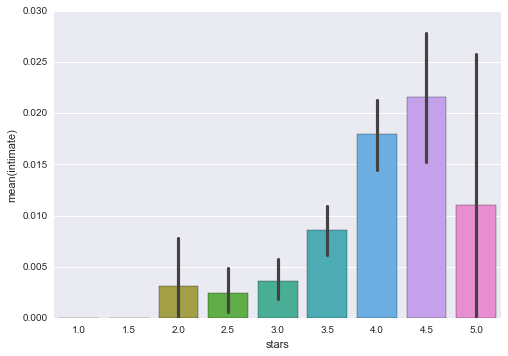

In [33]:
%matplotlib inline
import seaborn as sns
ax = sns.barplot(x="stars", y="intimate", data=rest_data_df)

C:\Users\Robert\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


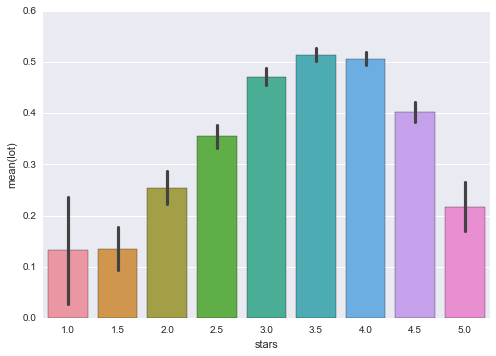

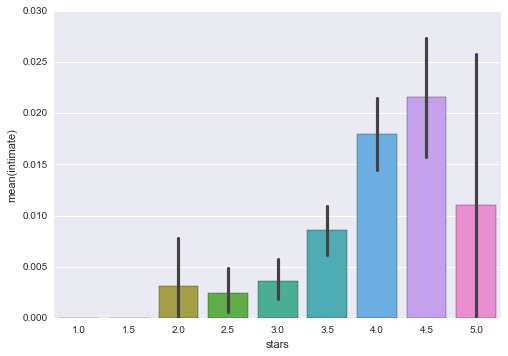

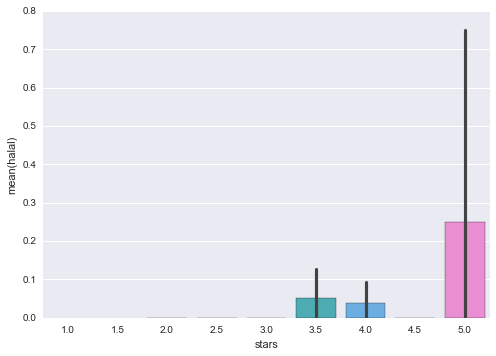

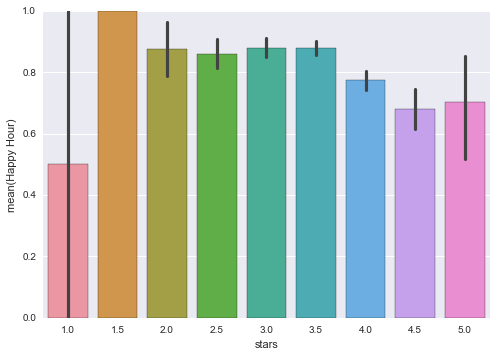

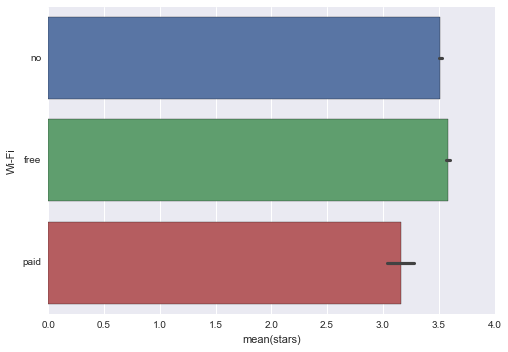

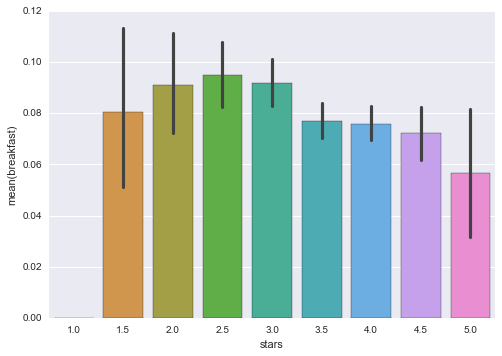

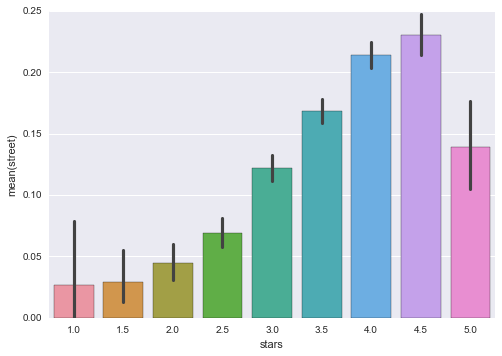

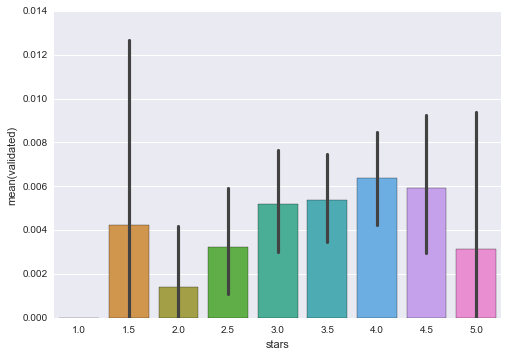

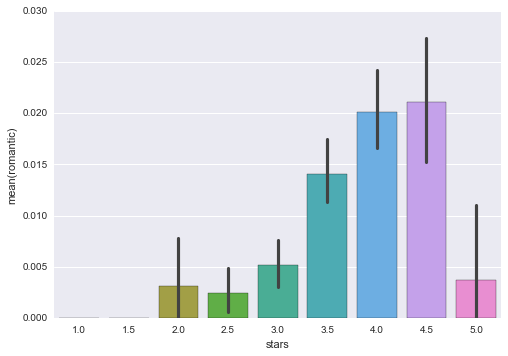

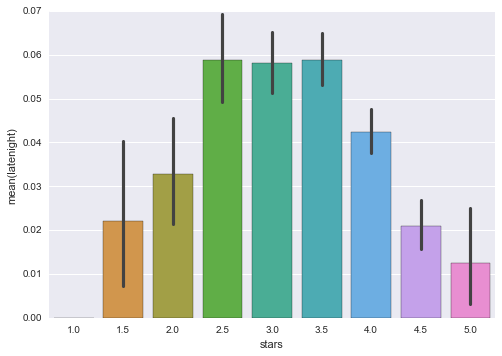

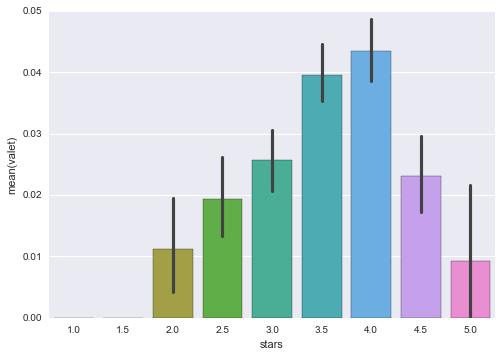

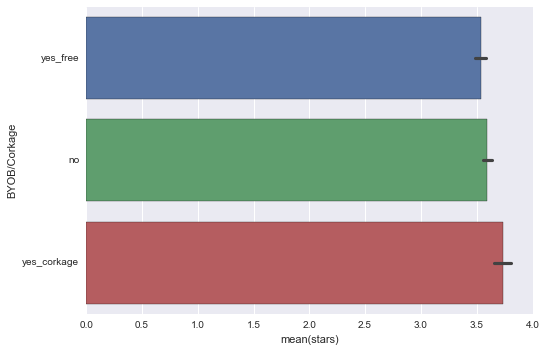

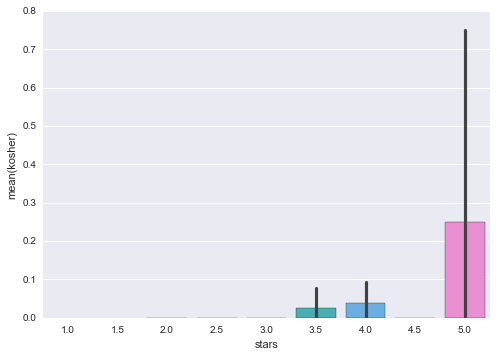

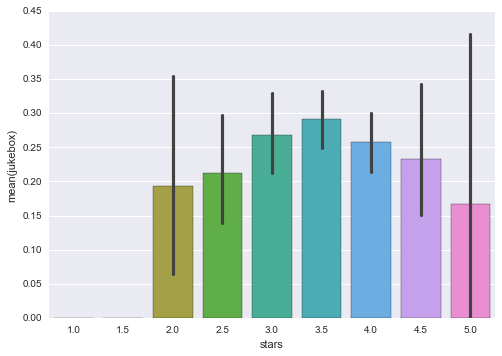

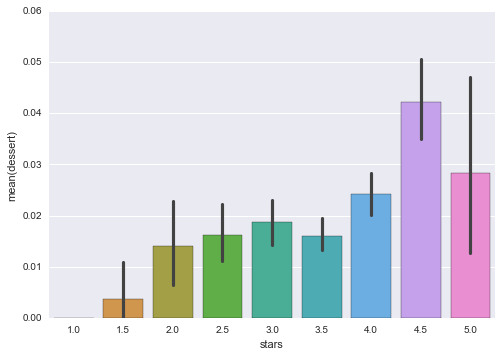

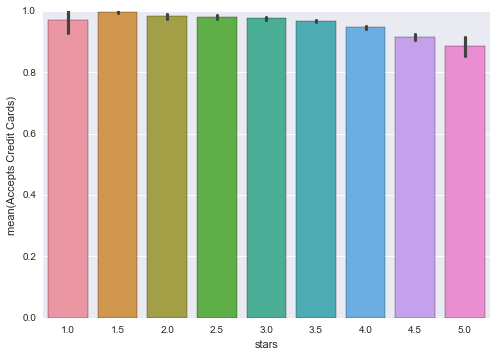

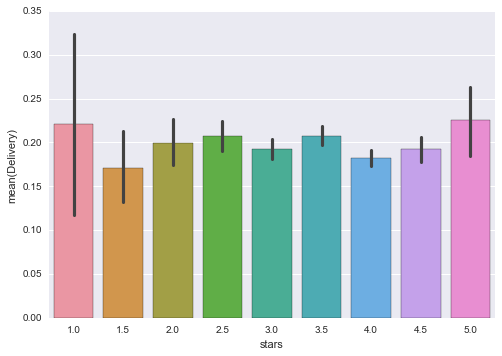

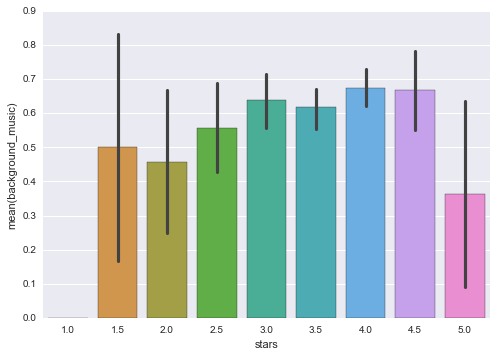

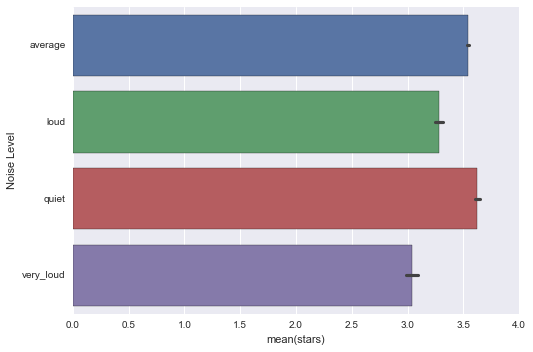

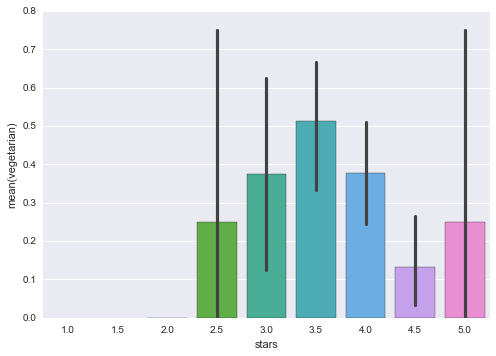

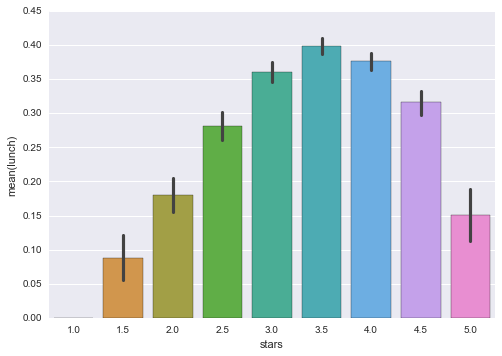

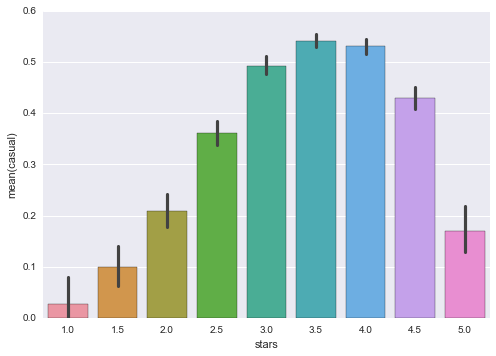

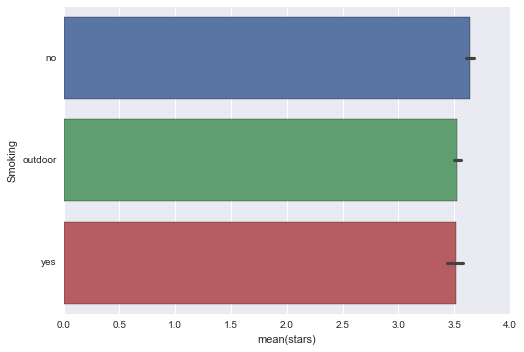

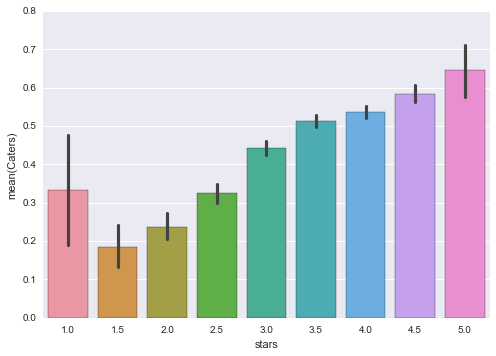

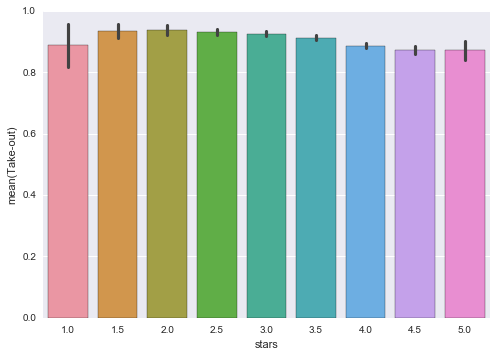

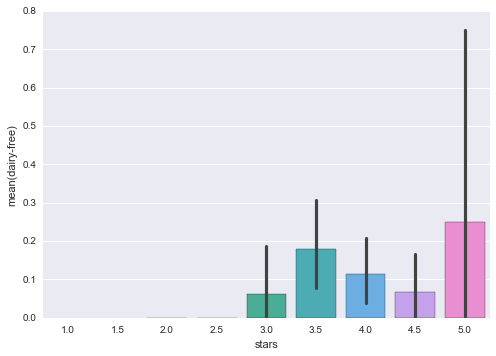

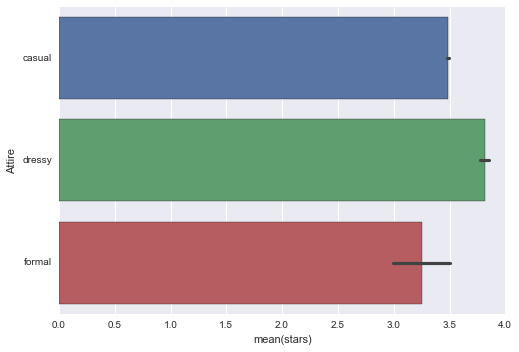

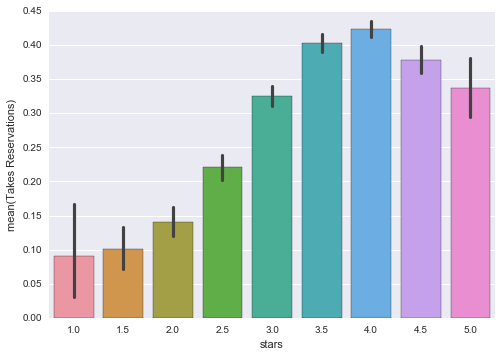

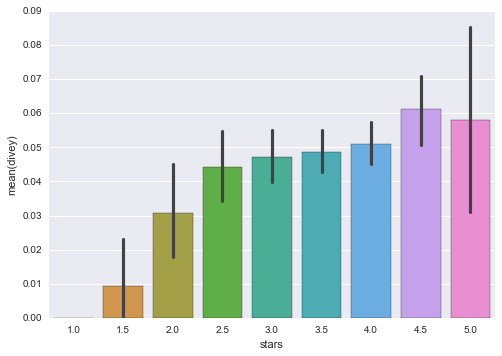

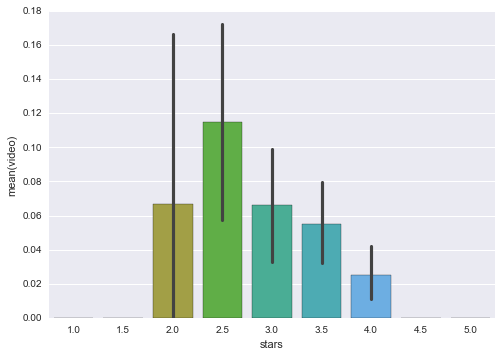

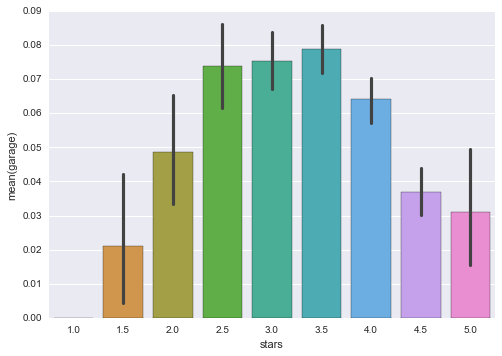

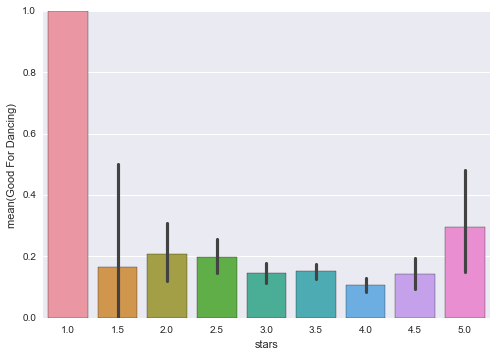

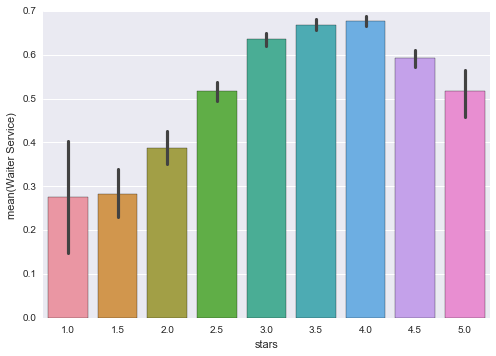

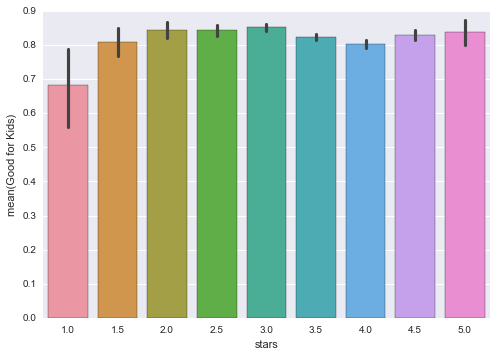

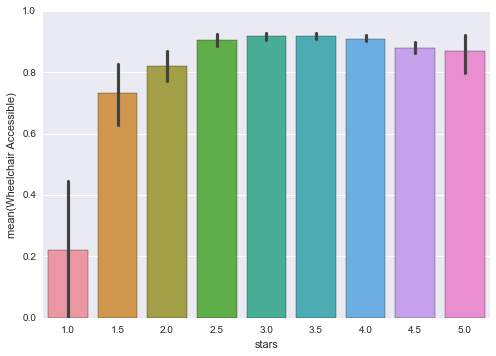

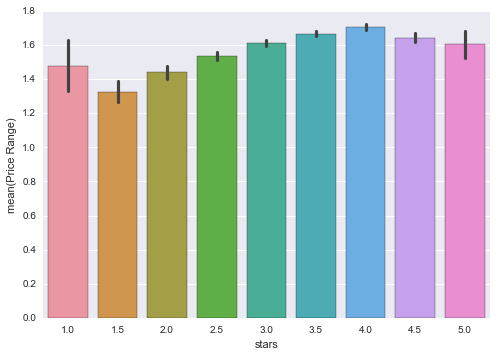

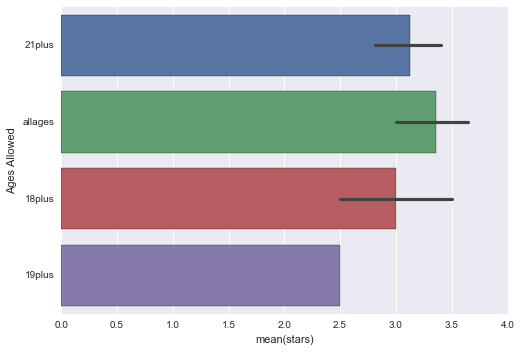

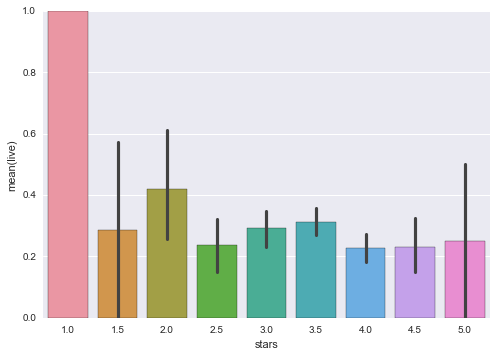

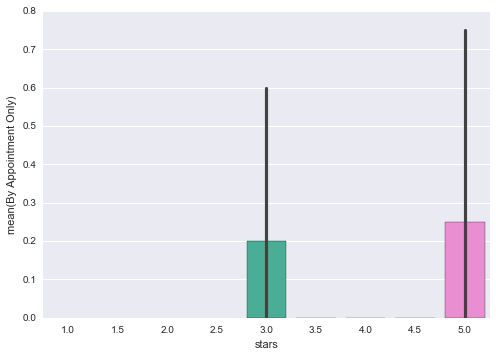

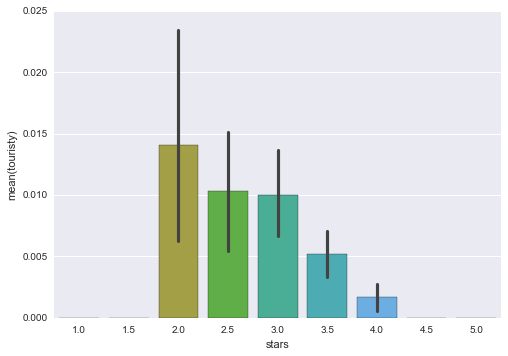

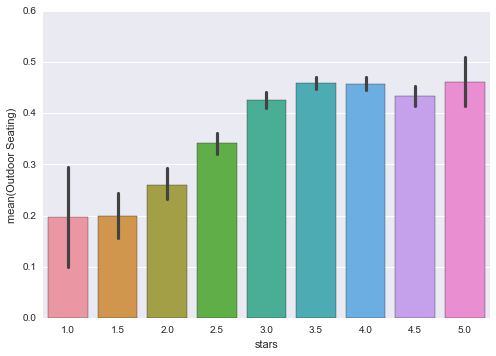

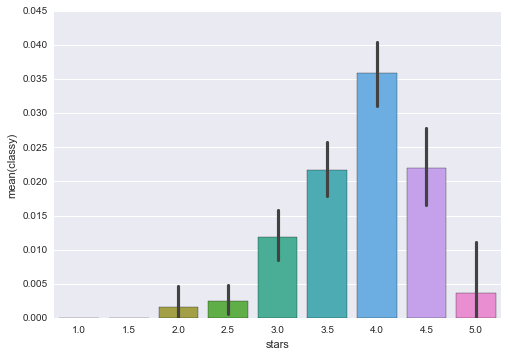

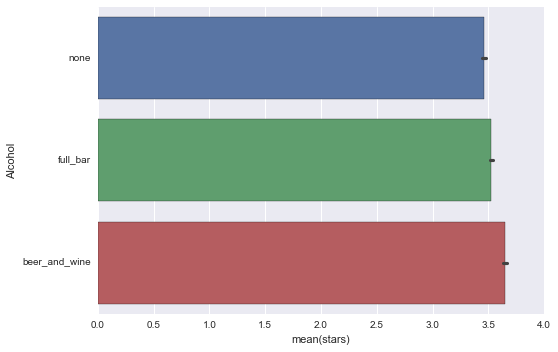

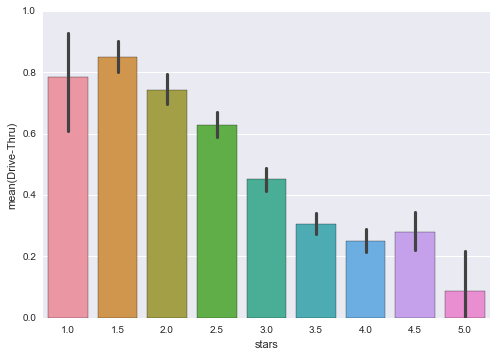

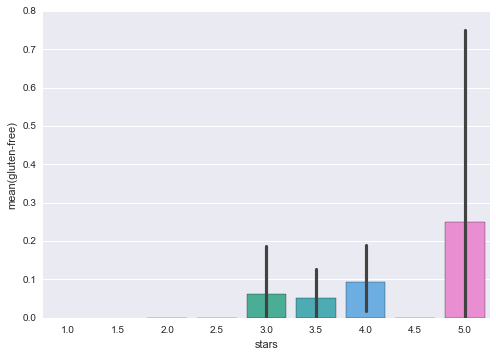

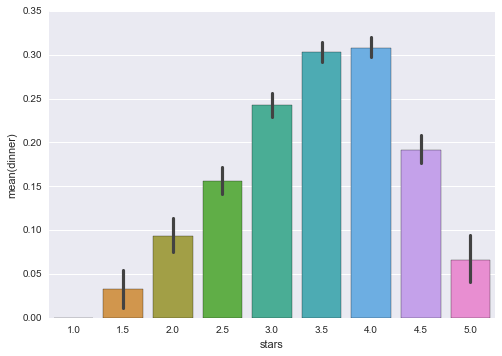

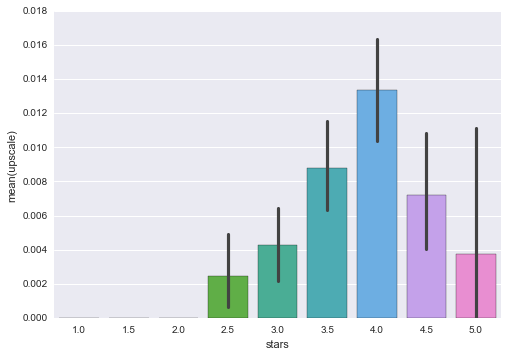

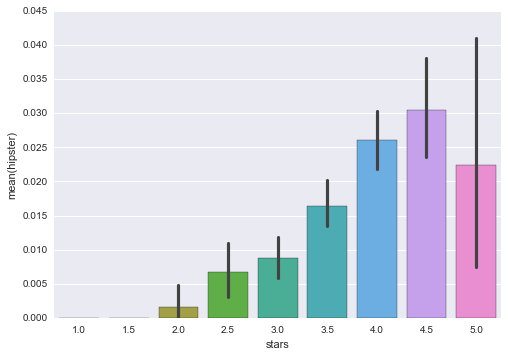

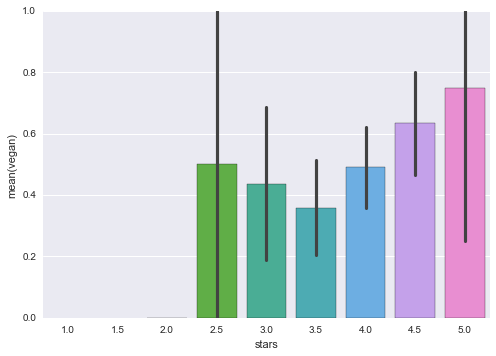

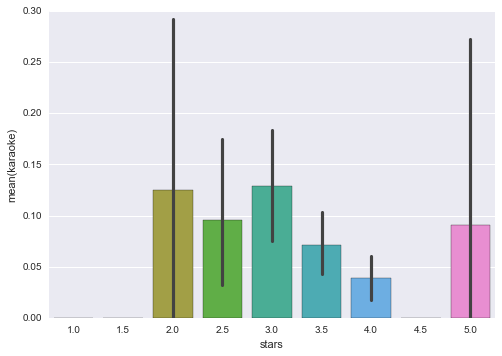

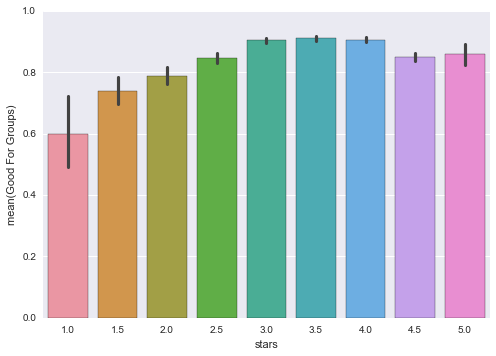

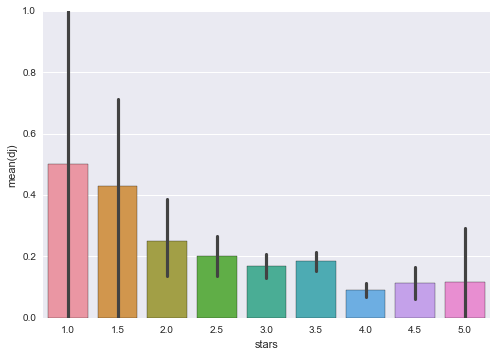

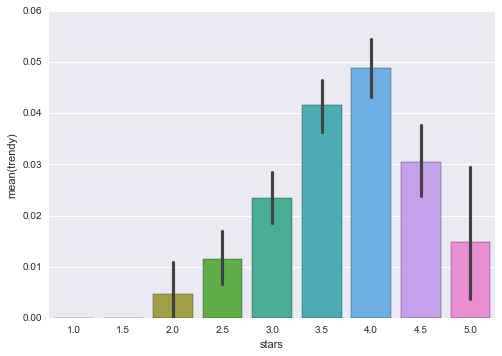

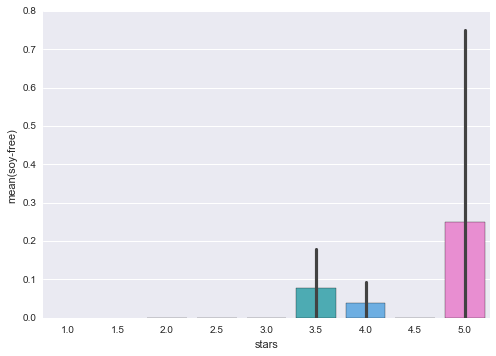

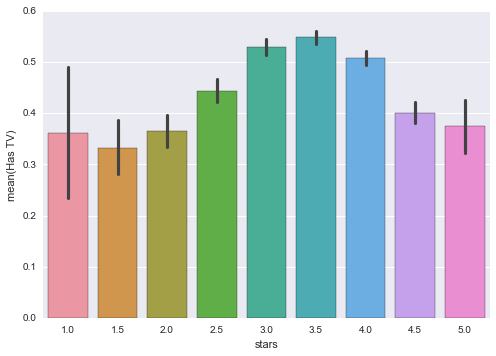

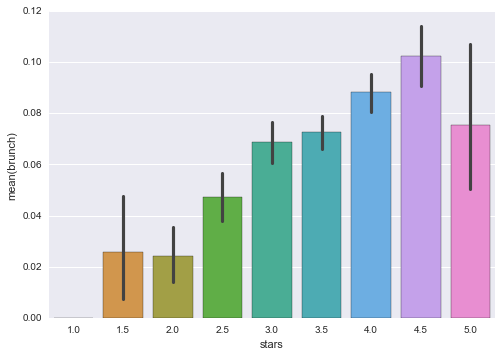

In [34]:
import matplotlib.pyplot as plt
def barplotthis(attrName):
    plt.figure()
    ax = sns.barplot(x="stars", y=attrName, data=rest_data_df)
    
for attr in attributes:
    barplotthis(attr)

C:\Users\Robert\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


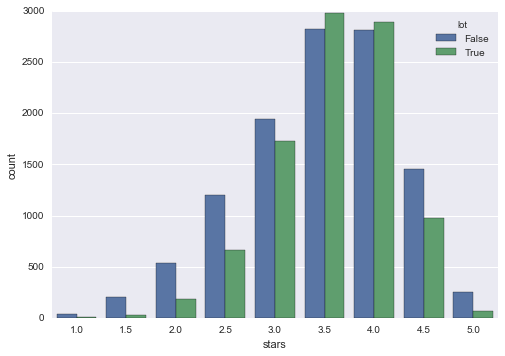

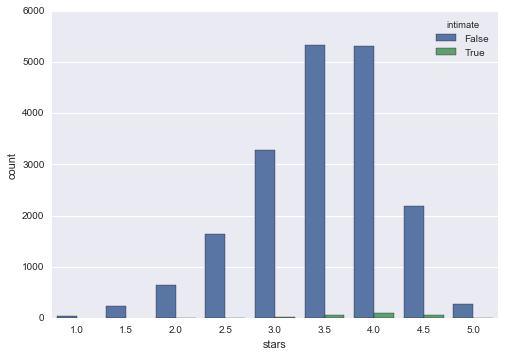

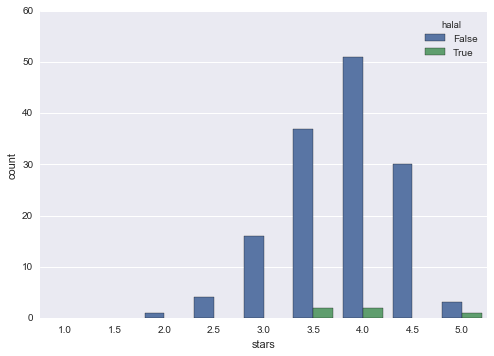

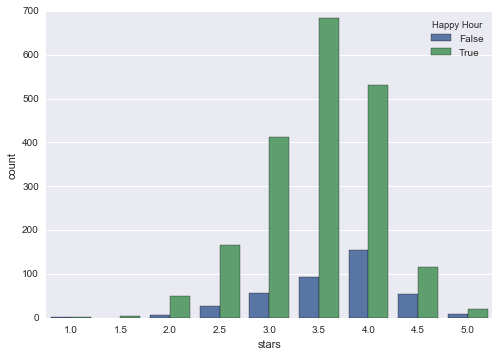

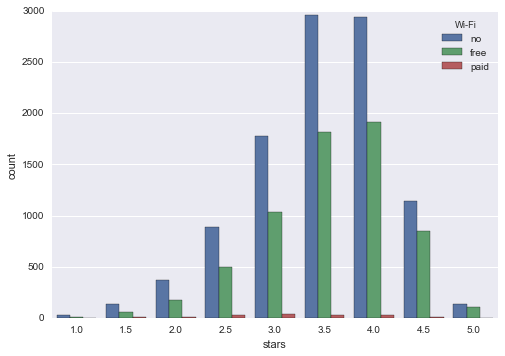

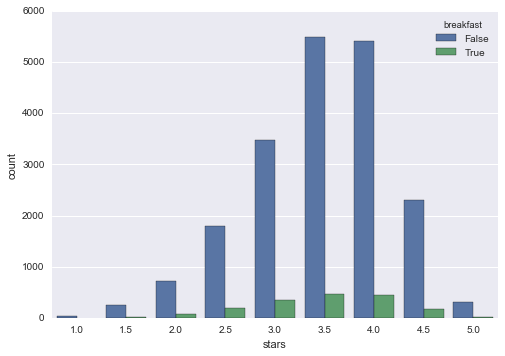

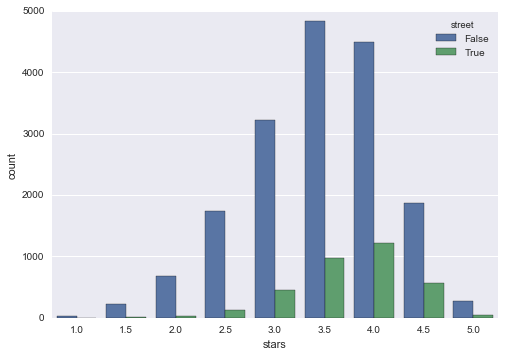

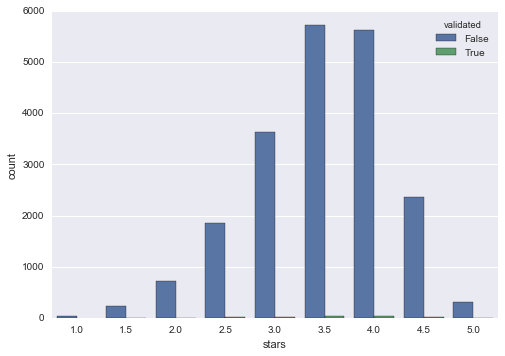

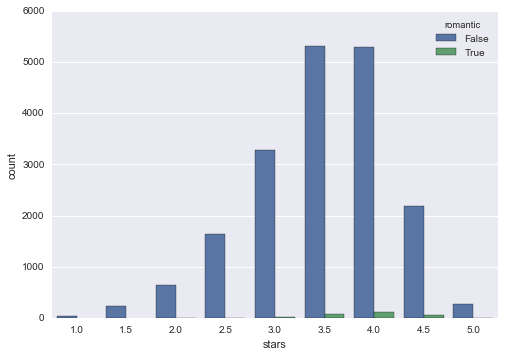

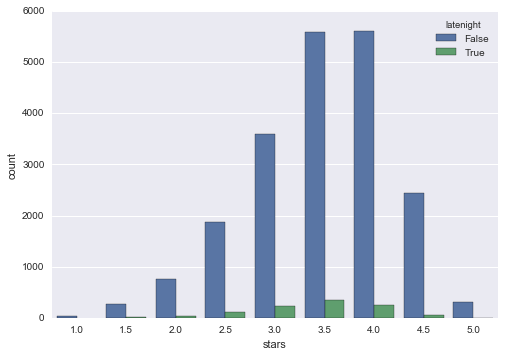

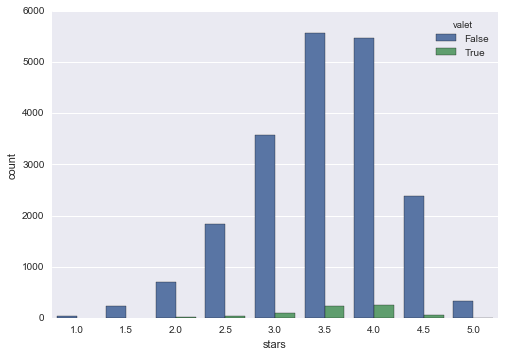

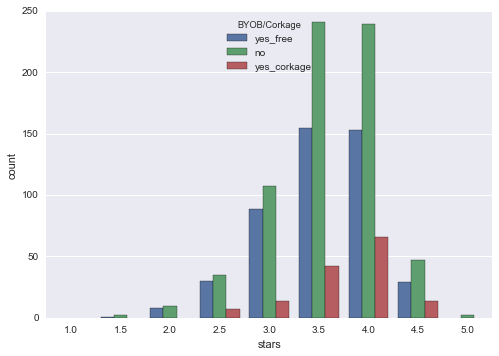

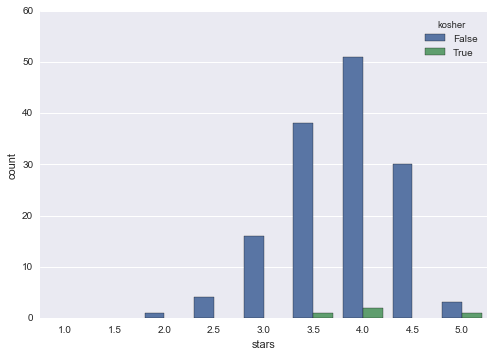

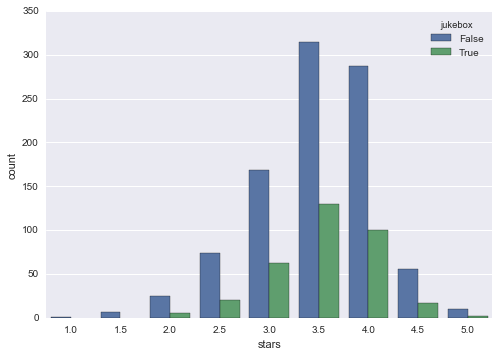

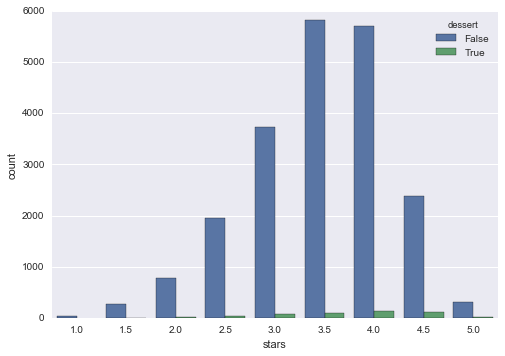

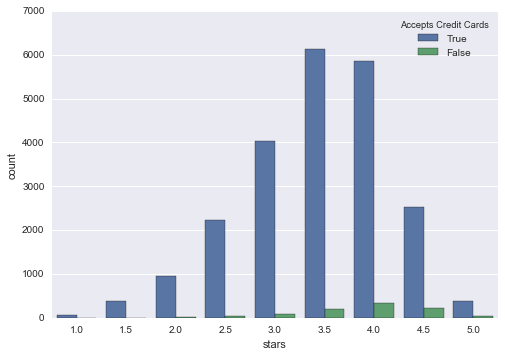

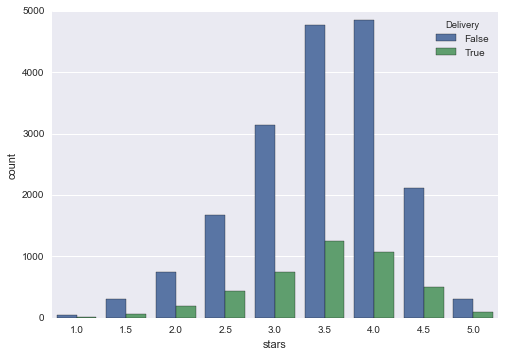

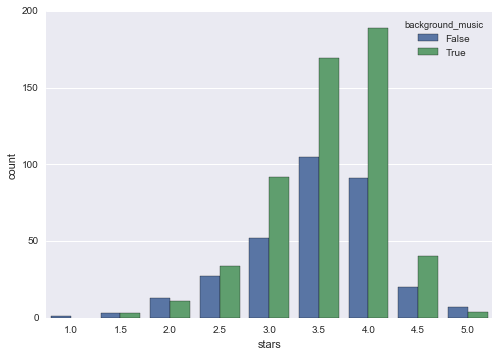

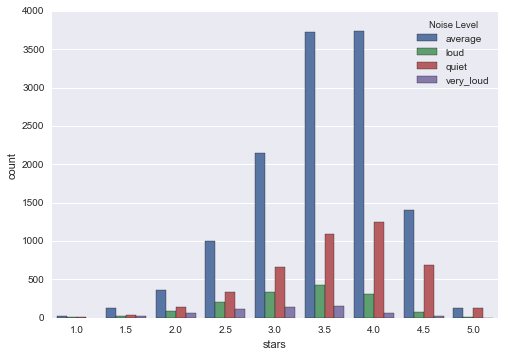

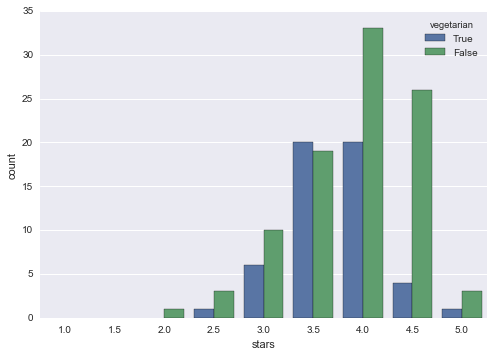

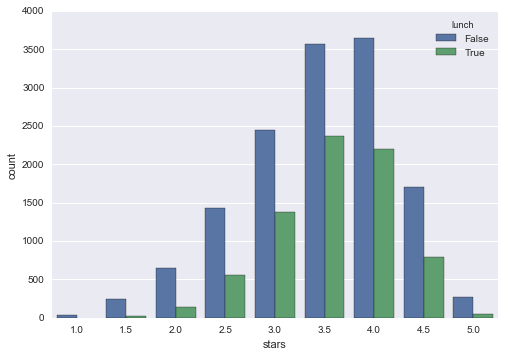

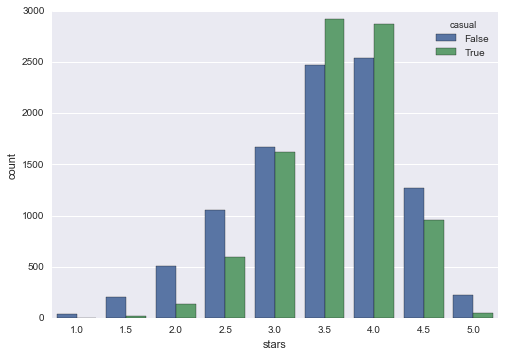

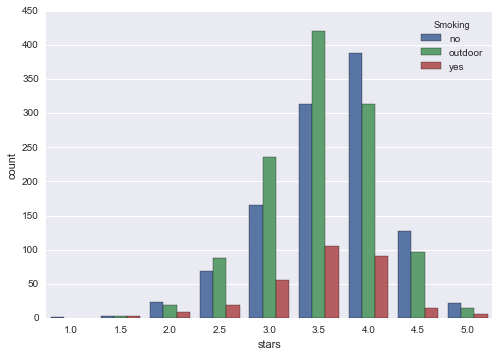

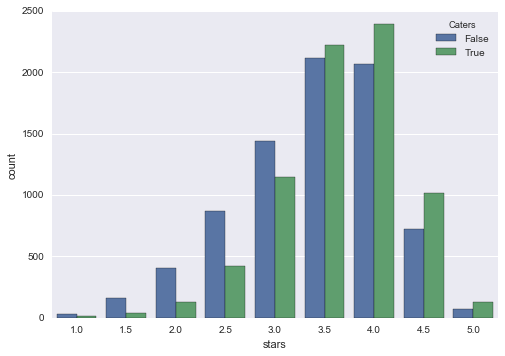

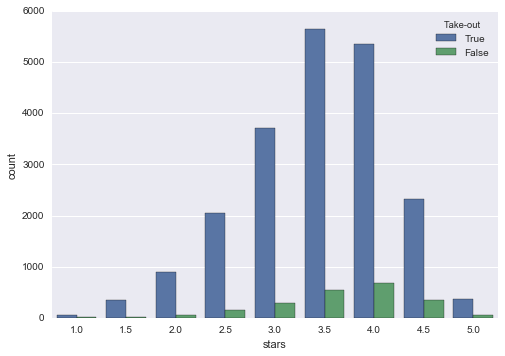

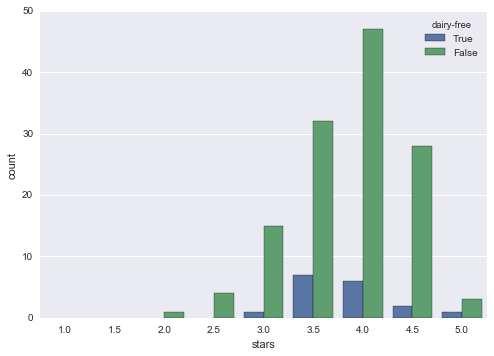

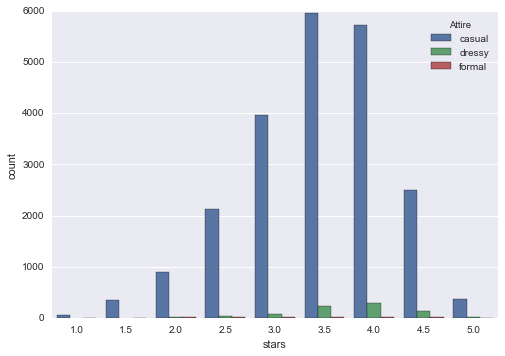

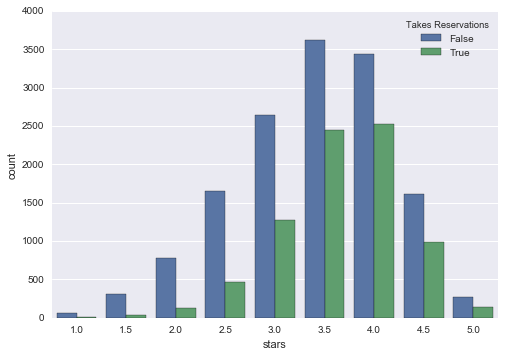

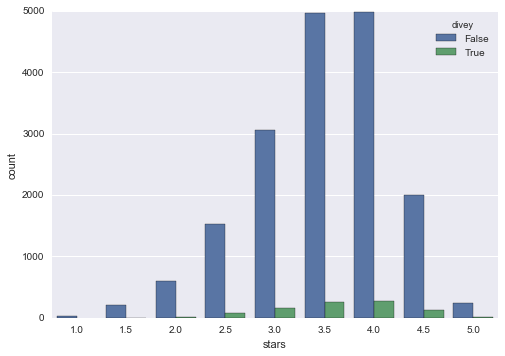

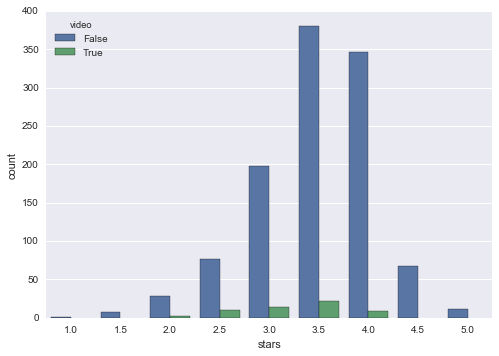

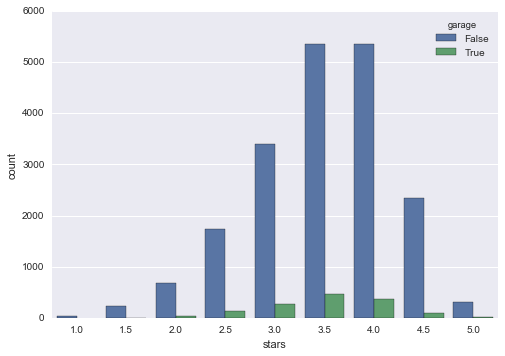

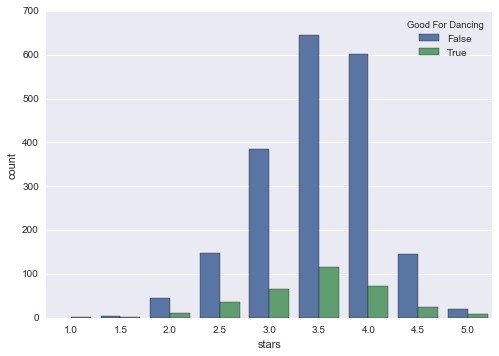

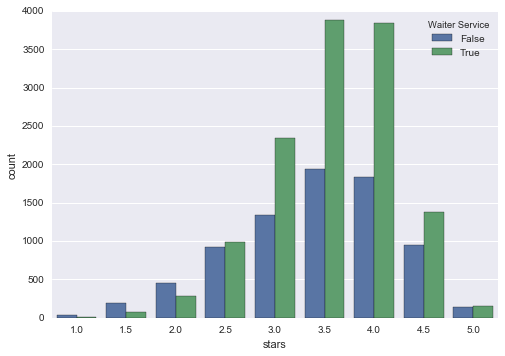

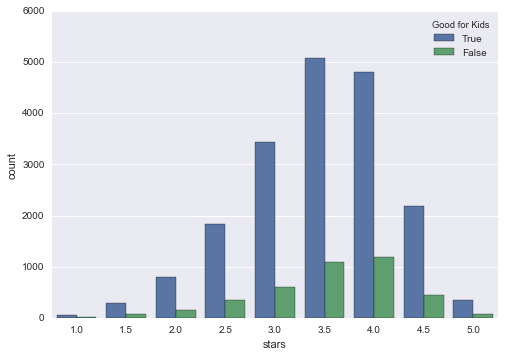

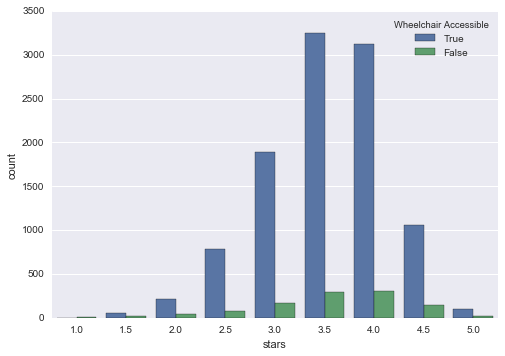

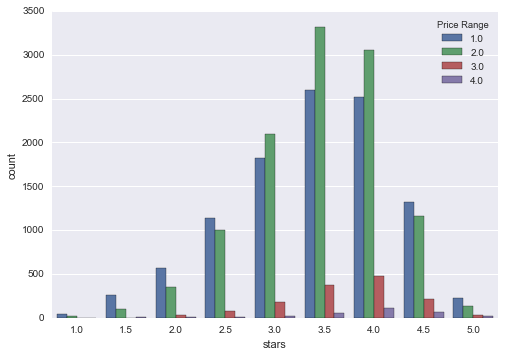

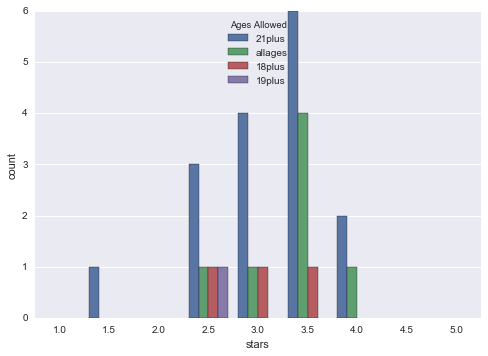

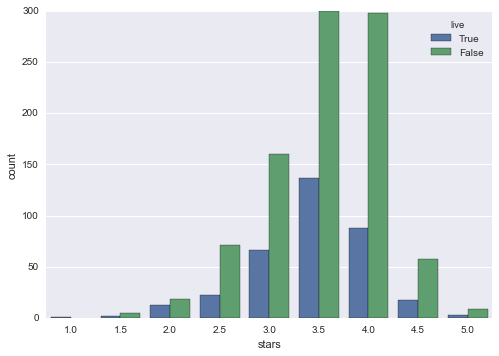

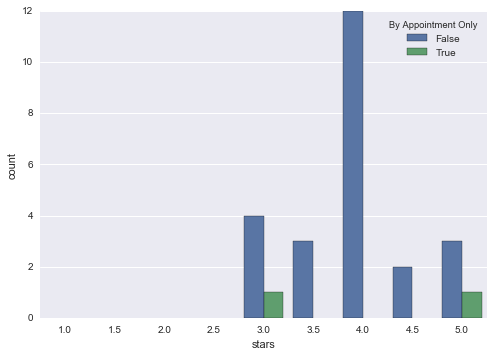

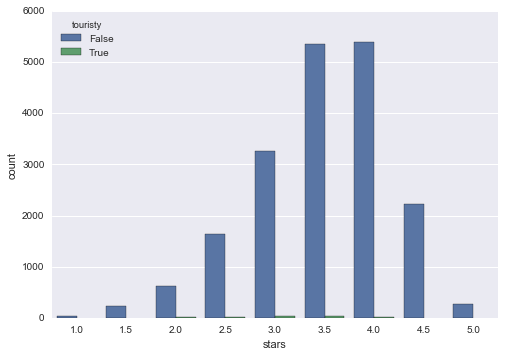

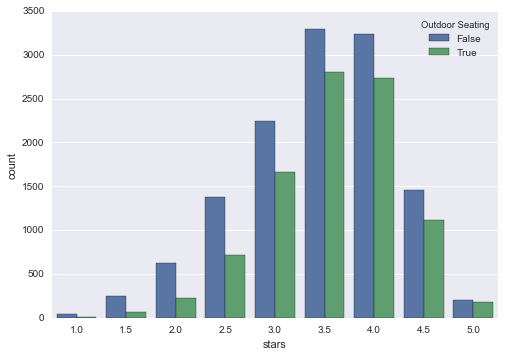

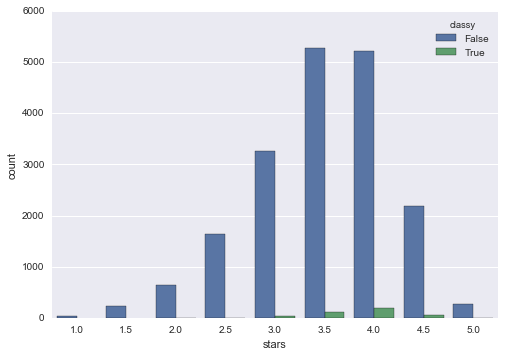

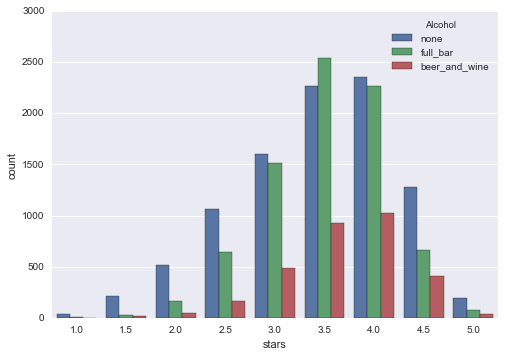

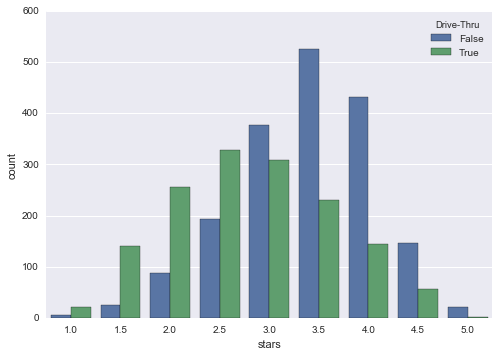

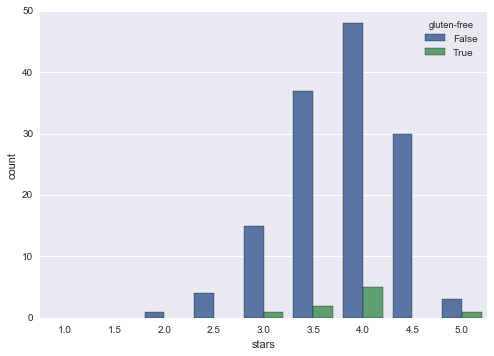

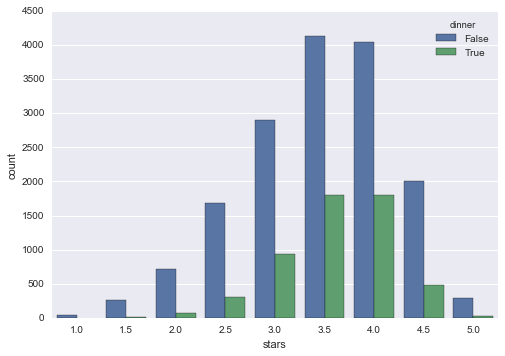

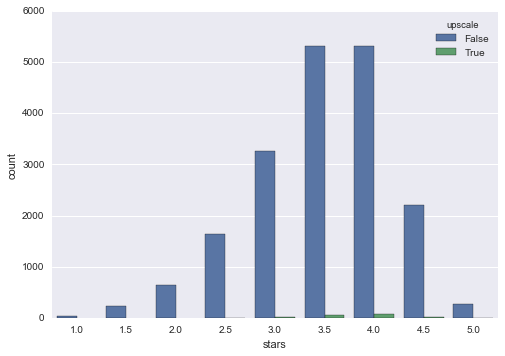

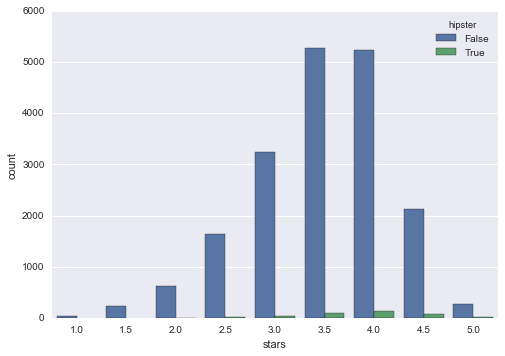

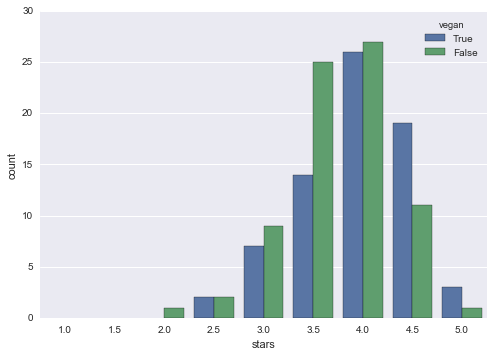

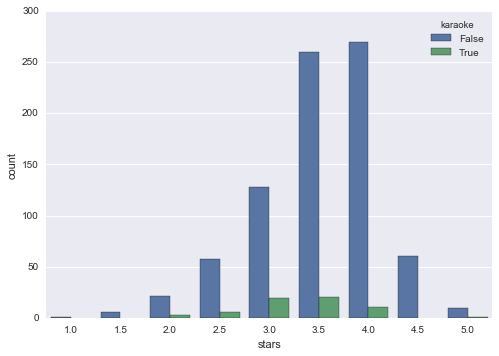

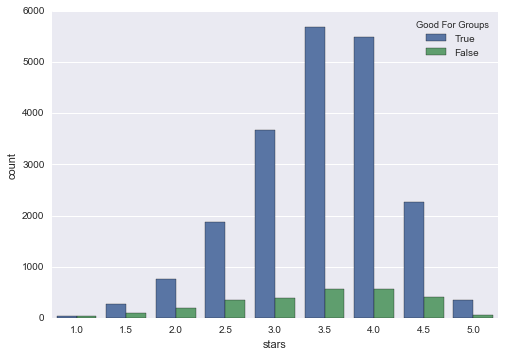

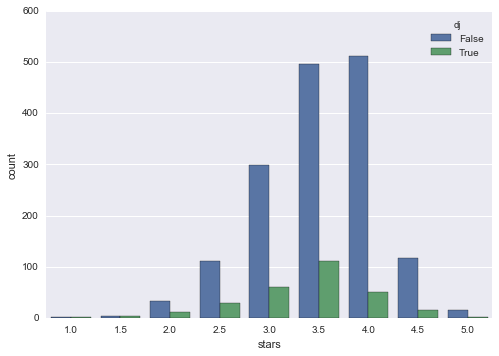

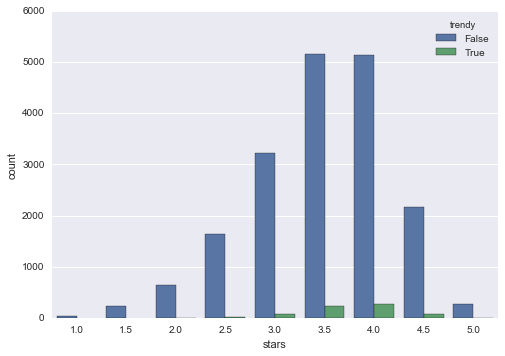

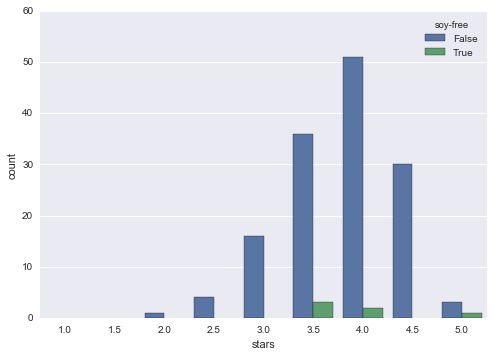

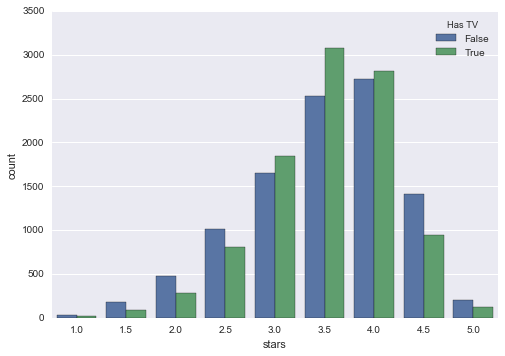

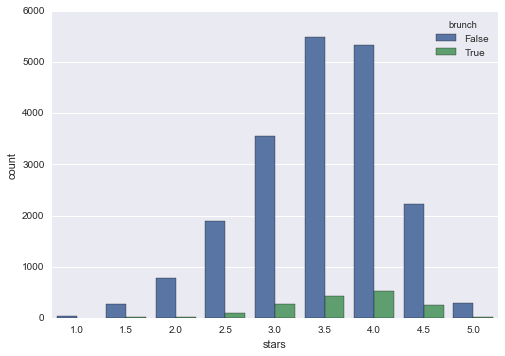

In [35]:
import matplotlib.pyplot as plt
def countplotthis(attrName):
    plt.figure()
    ax = sns.countplot(x='stars', hue = attrName, data=rest_data_df)#, y=attrName,
    
for attr in attributes:
    countplotthis(attr)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

count = defaultdict(int)
attrName = 'Has TV'
for x,y in zip(rest_data_df.stars, rest_data_df[attrName]):
    count[(x,y)] += 1
print(count)

defaultdict(<class 'int'>, {(1.0, None): 52, (3.5, True): 3074, (1.5, None): 166, (3.0, False): 1647, (1.0, True): 17, (2.5, True): 805, (3.0, None): 847, (4.5, None): 609, (2.0, True): 278, (5.0, None): 179, (5.0, True): 122, (1.5, False): 181, (3.5, None): 1106, (1.0, False): 30, (4.5, False): 1414, (2.5, False): 1009, (4.0, True): 2813, (2.0, None): 326, (3.0, True): 1849, (3.5, False): 2525, (1.5, True): 90, (2.0, False): 482, (5.0, False): 204, (4.0, None): 906, (4.0, False): 2729, (4.5, True): 947, (2.5, None): 664})


C:\Users\Robert\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


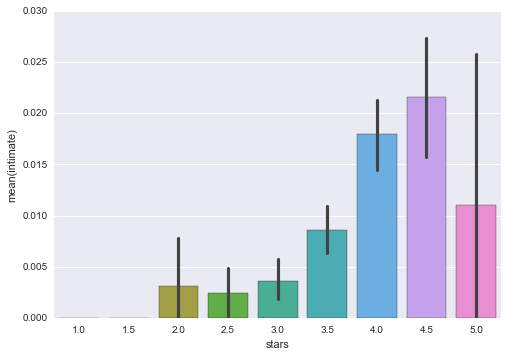

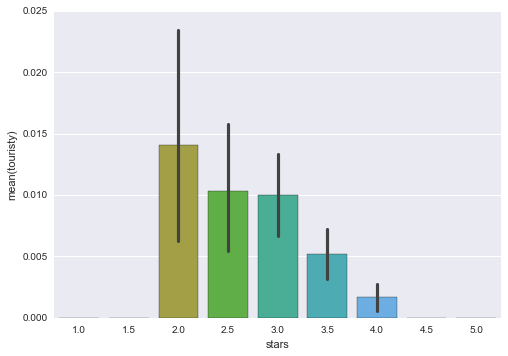

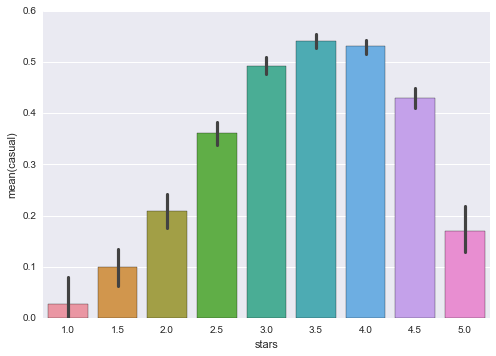

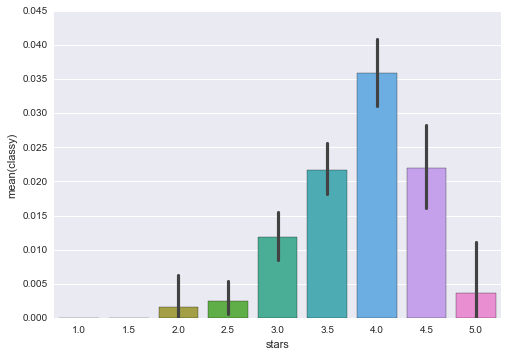

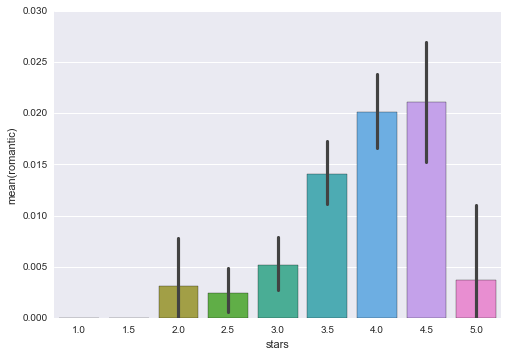

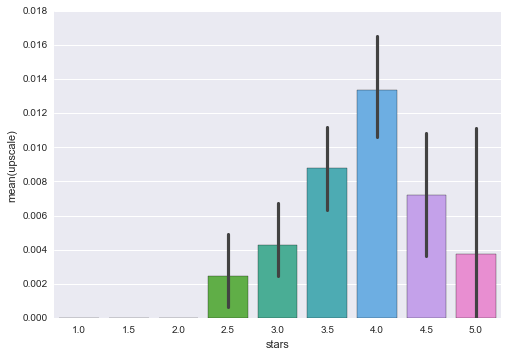

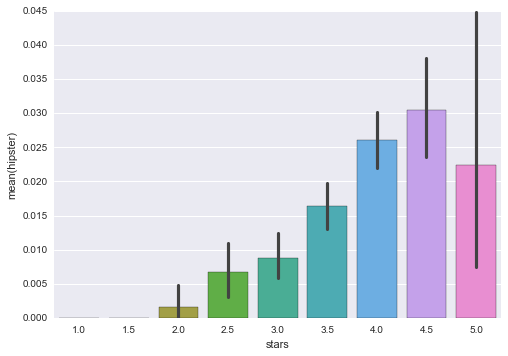

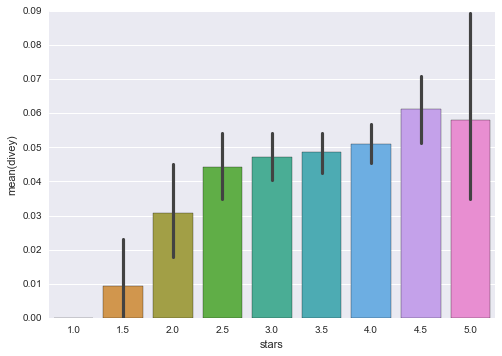

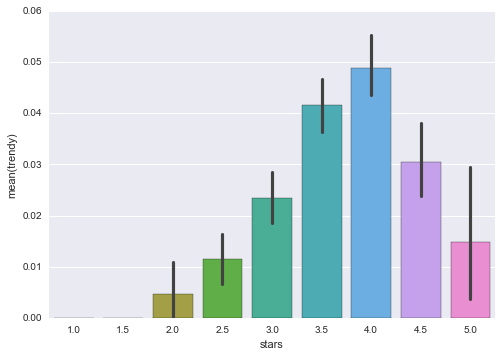

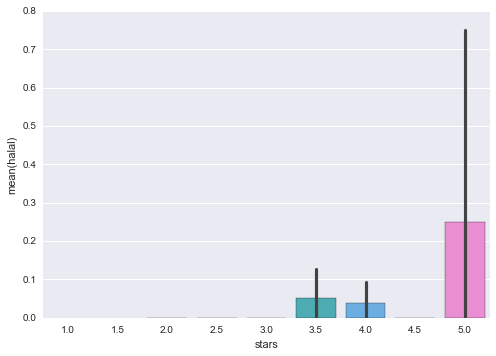

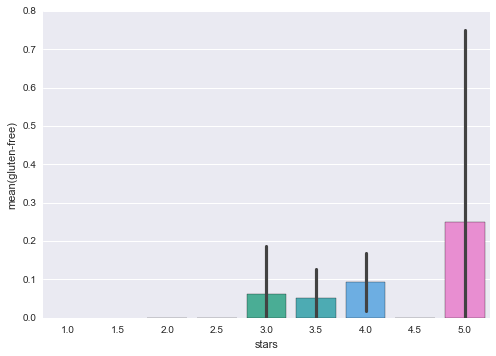

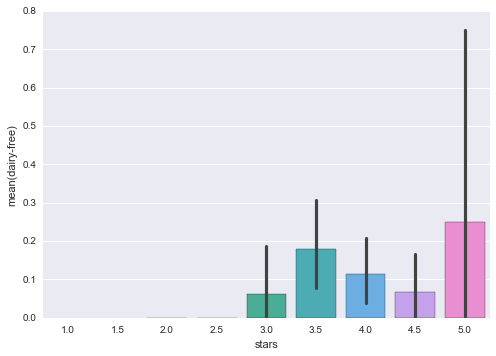

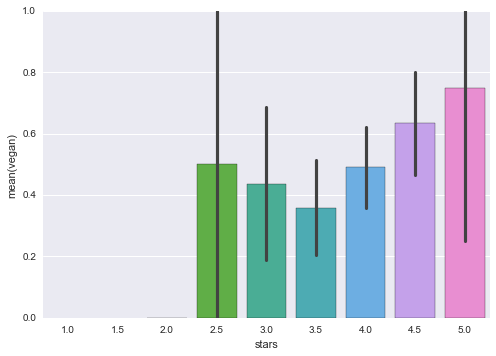

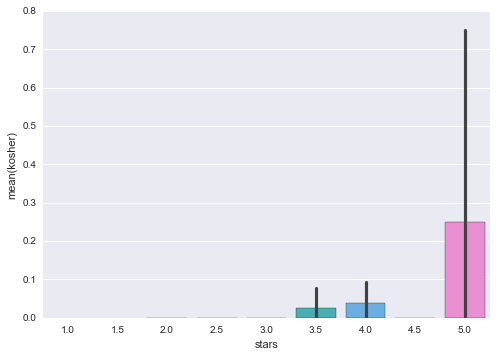

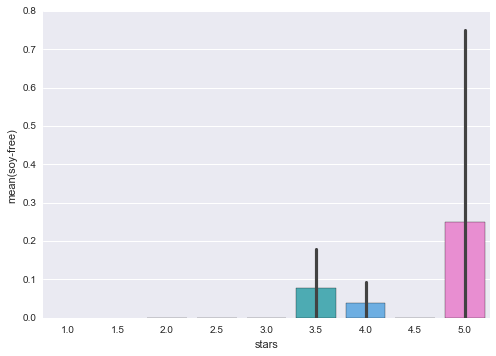

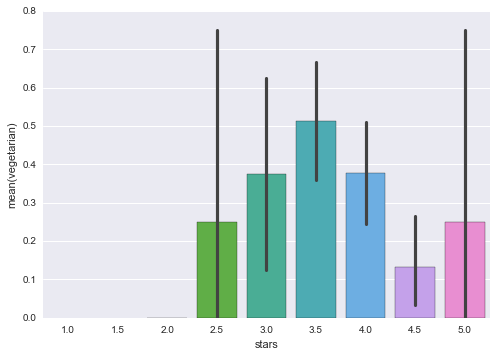

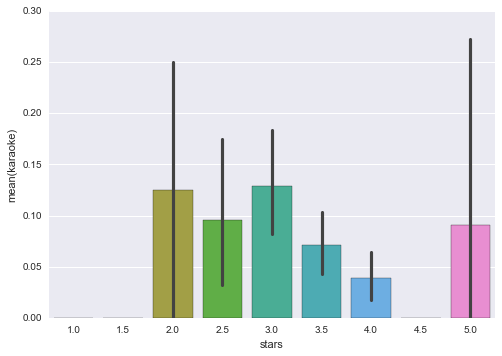

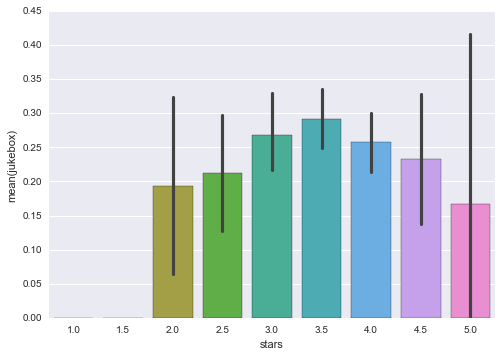

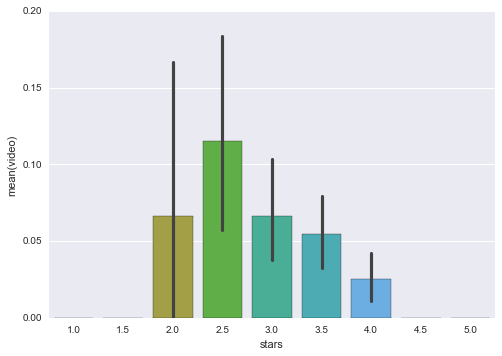

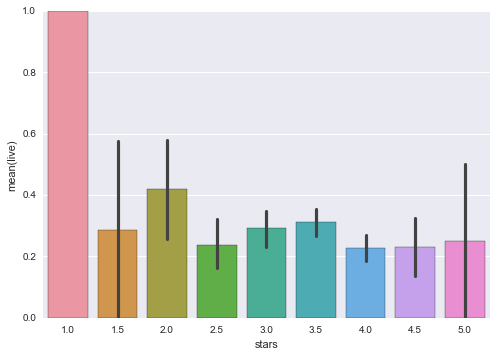

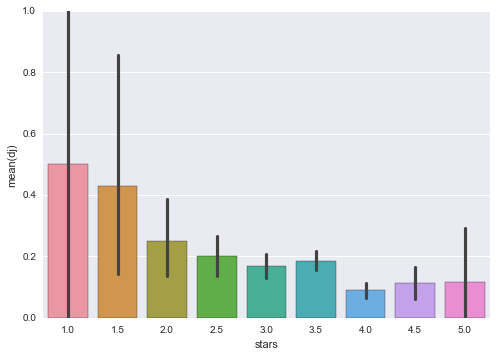

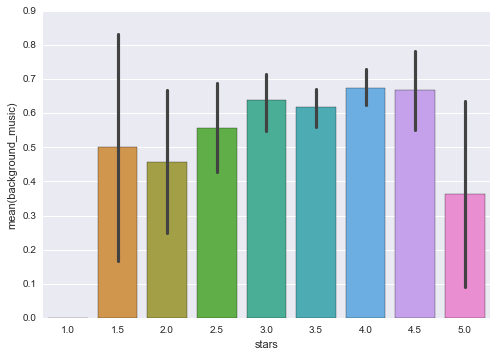

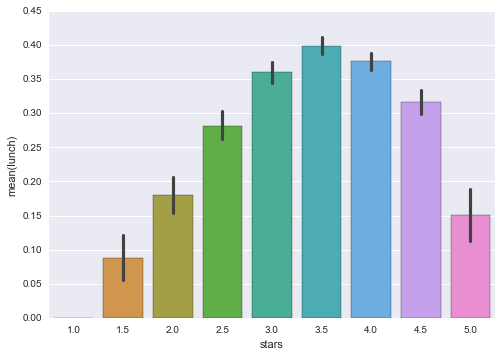

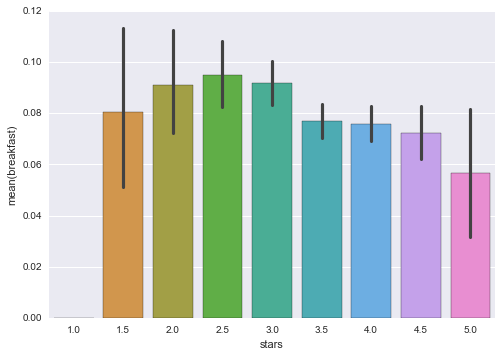

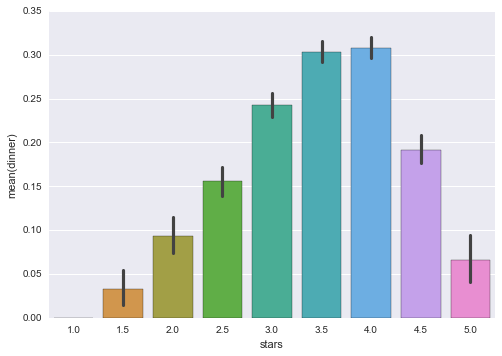

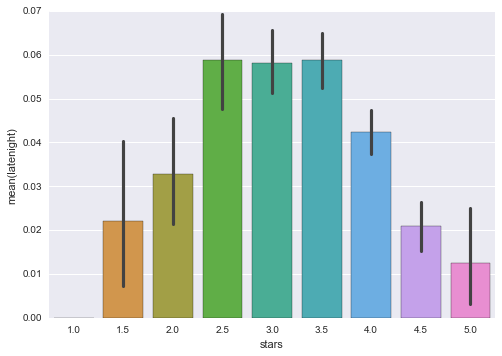

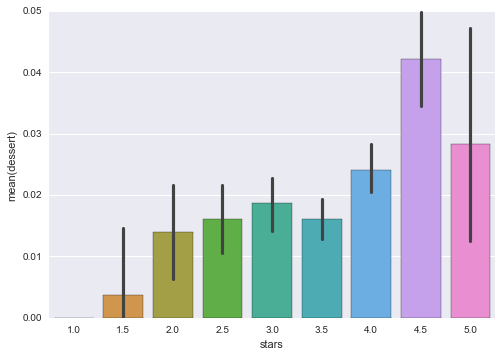

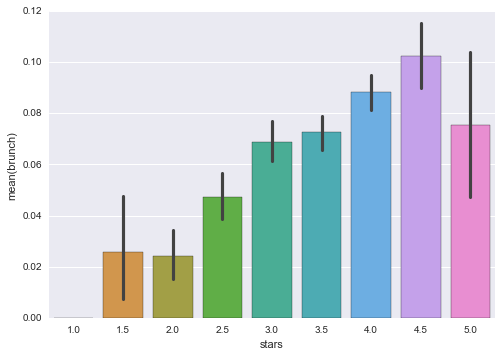

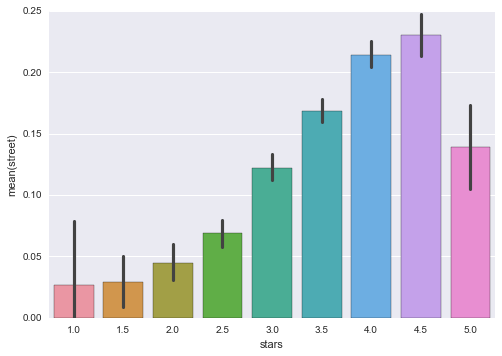

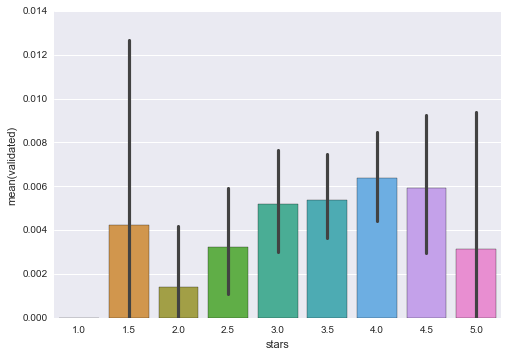

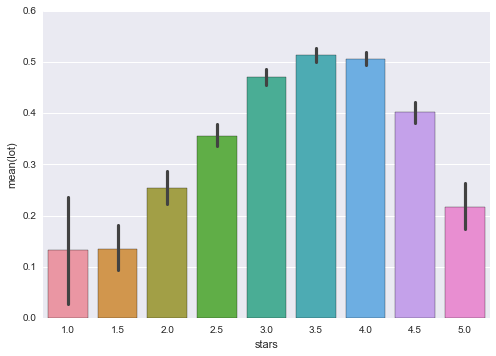

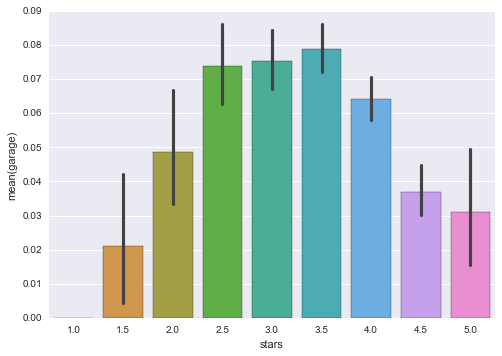

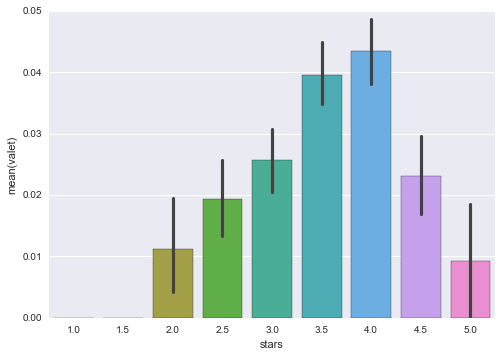

In [37]:
for attrNames in levels:
    for attrName in levels[attrNames]:
        barplotthis(attrName)

C:\Users\Robert\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


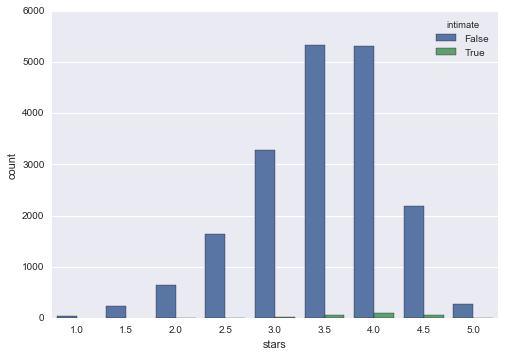

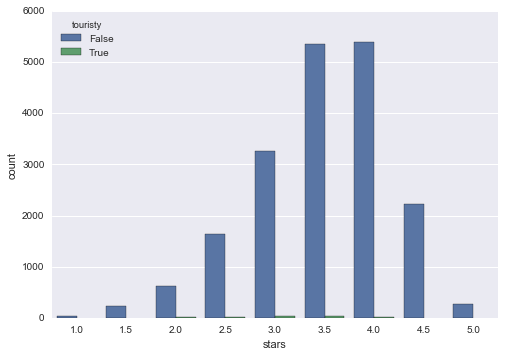

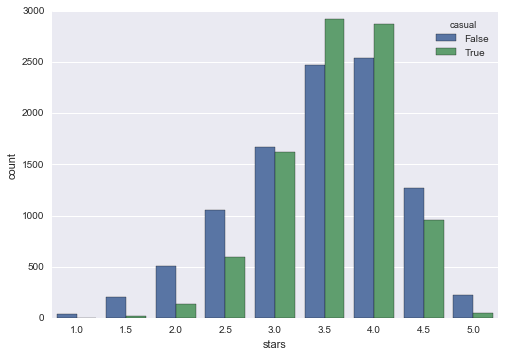

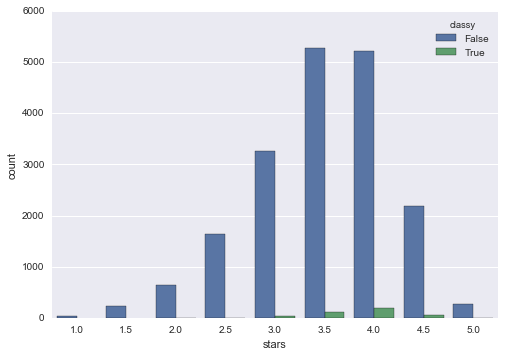

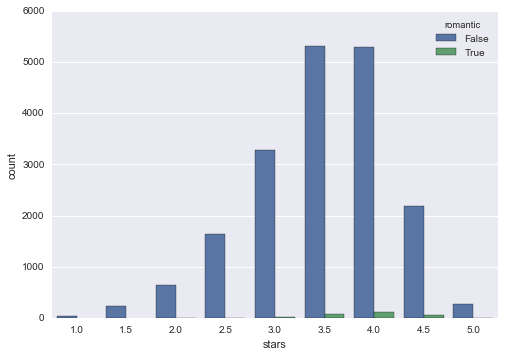

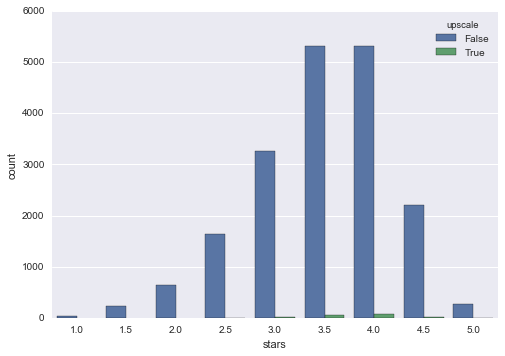

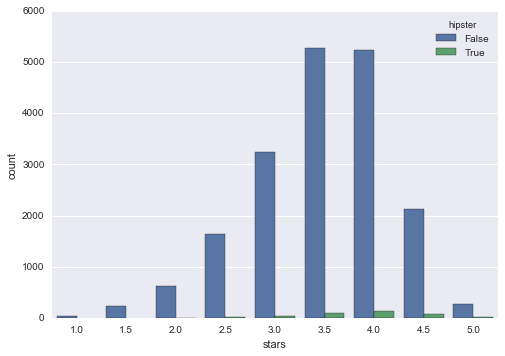

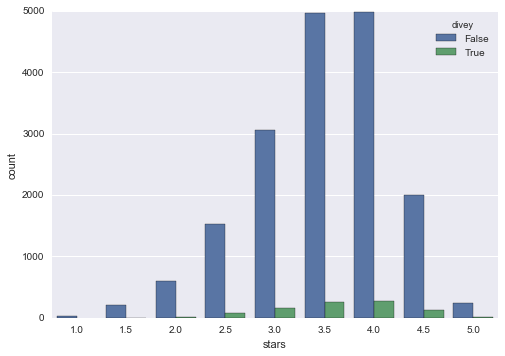

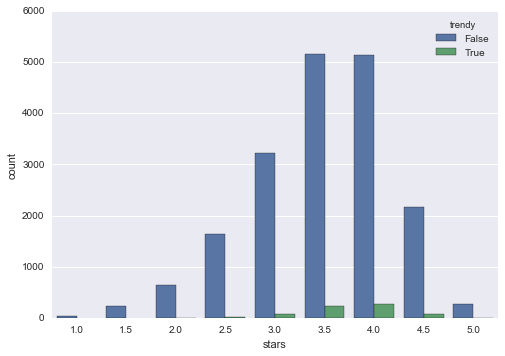

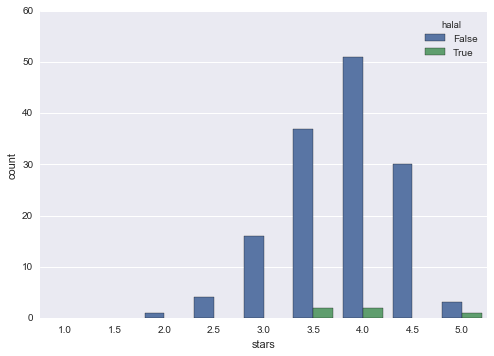

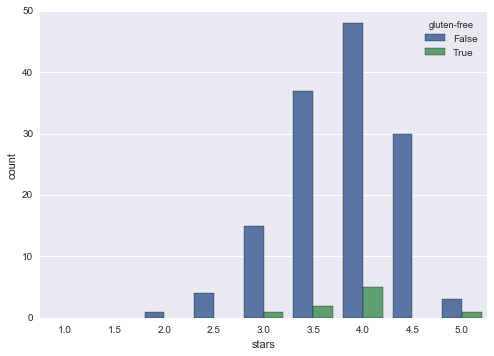

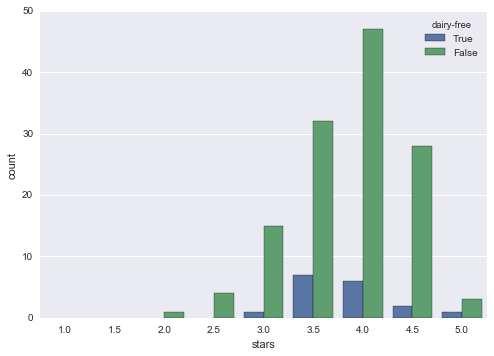

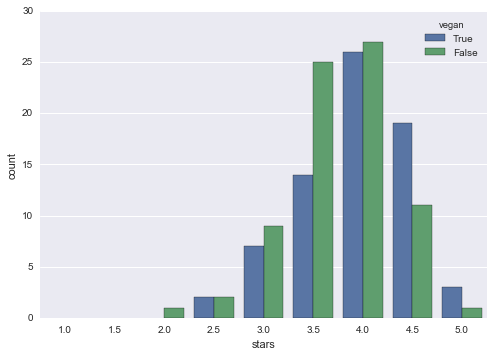

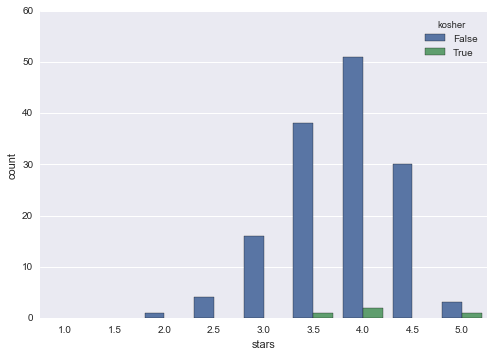

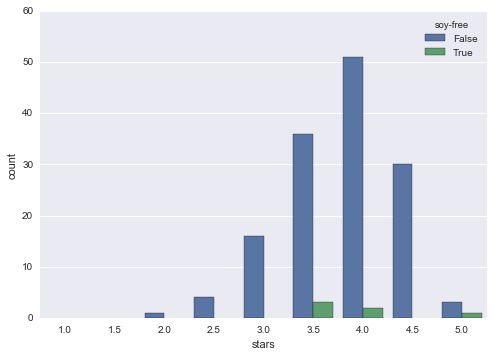

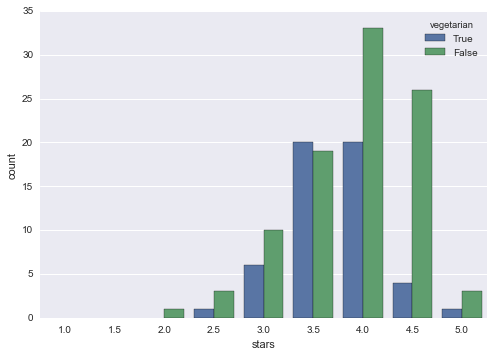

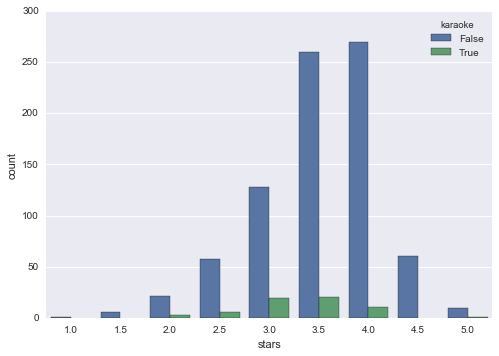

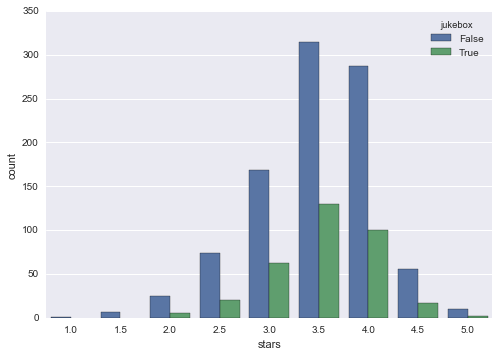

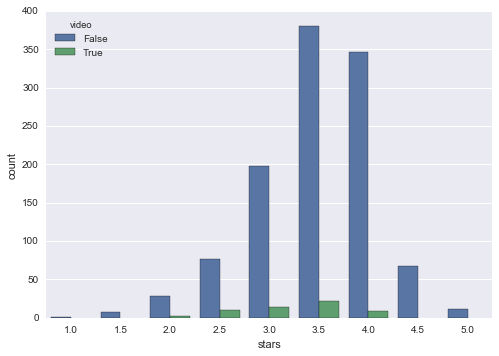

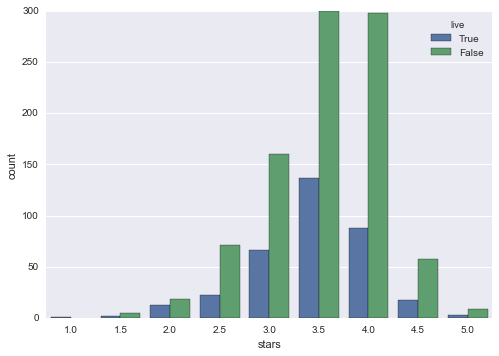

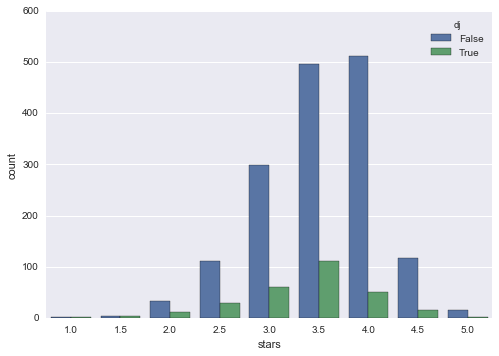

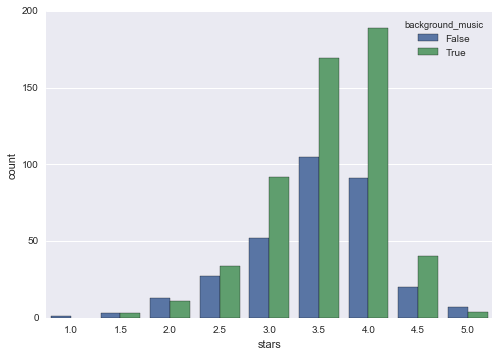

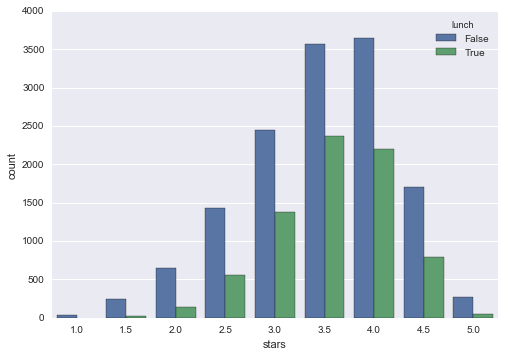

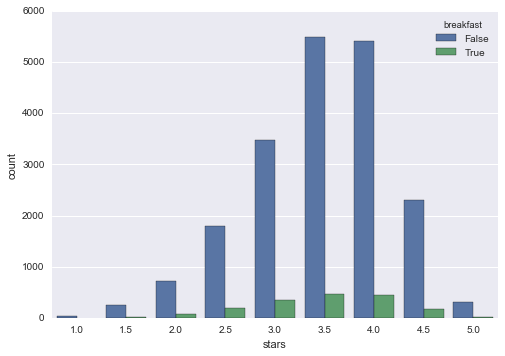

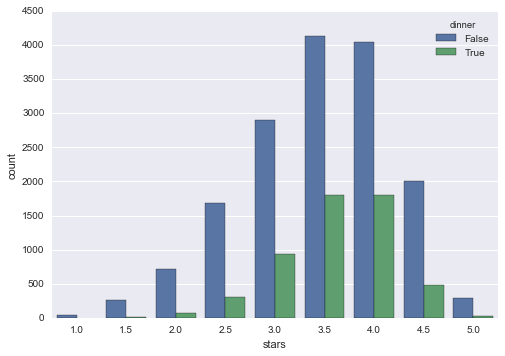

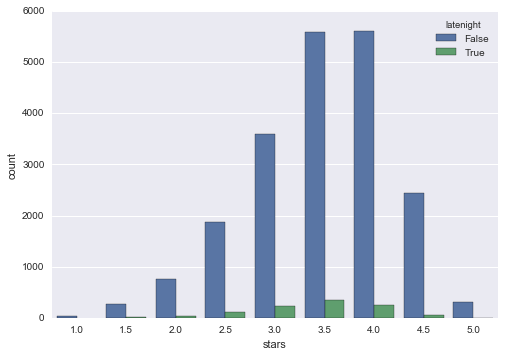

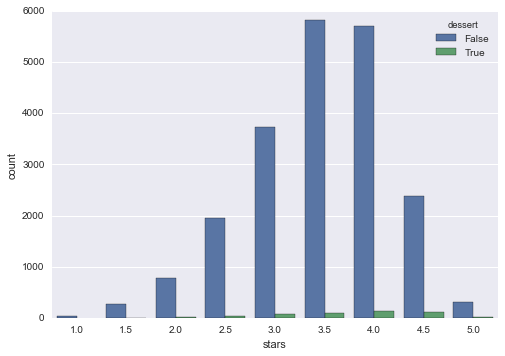

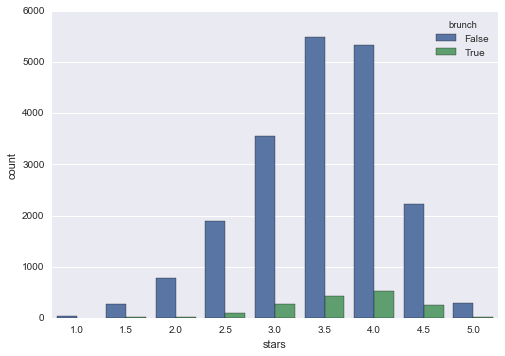

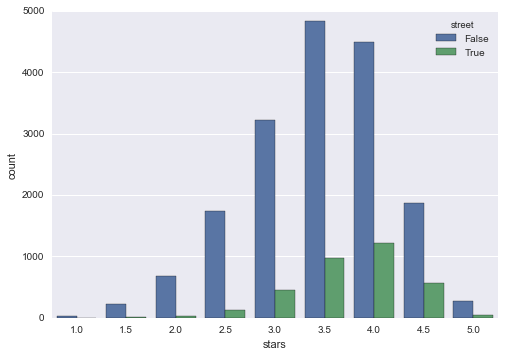

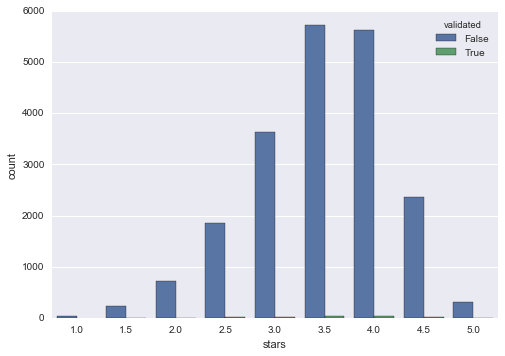

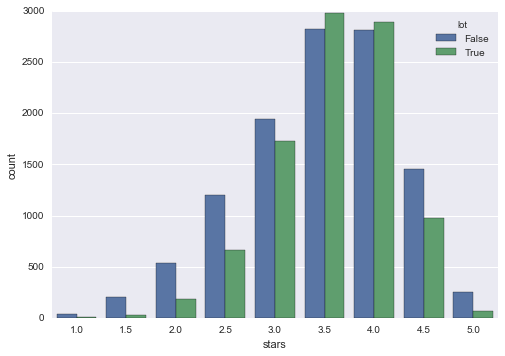

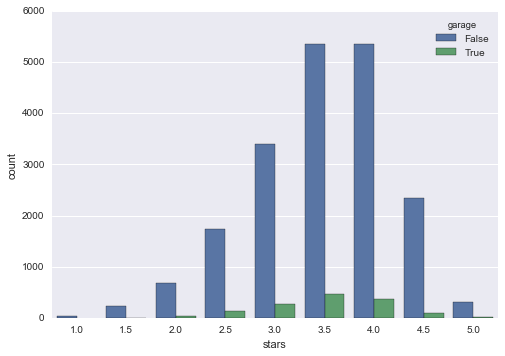

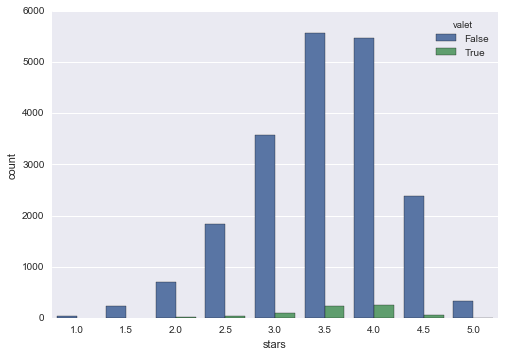

In [38]:
for attrNames in levels:
    for attrName in levels[attrNames]:
        countplotthis(attrName)

C:\Users\Robert\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


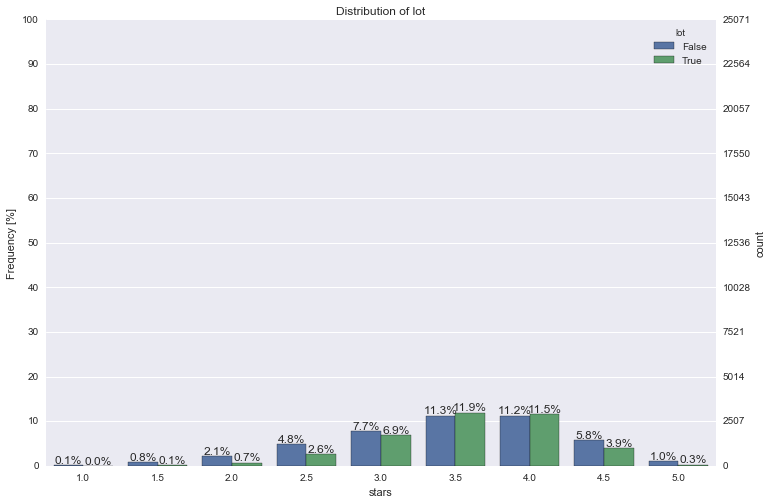

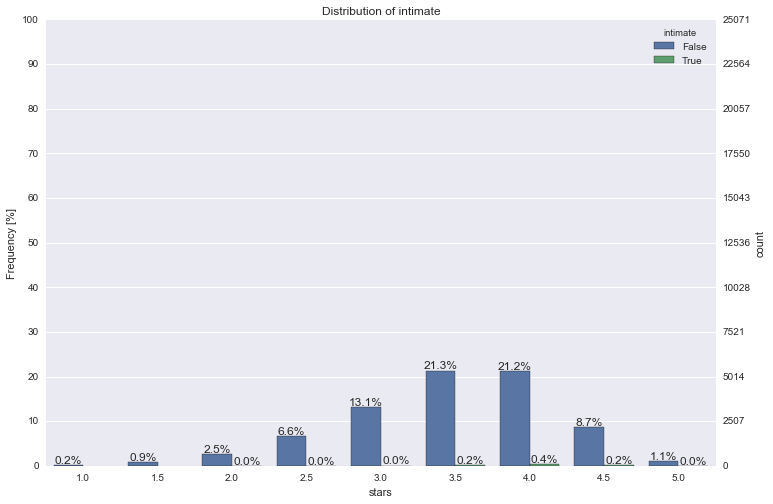

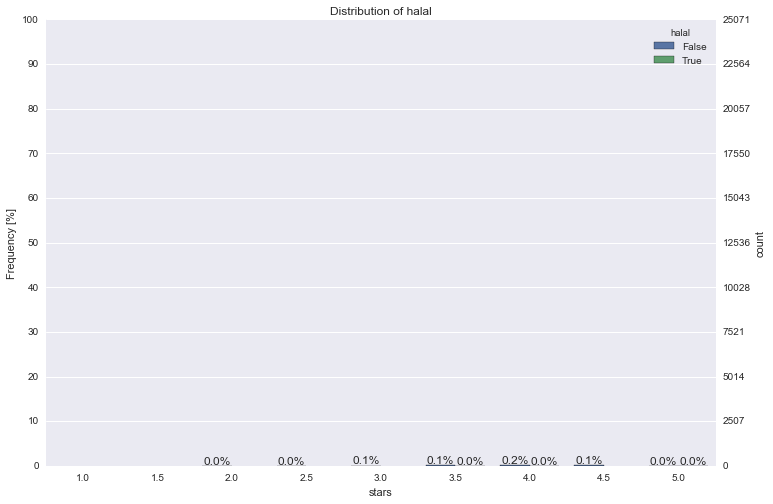

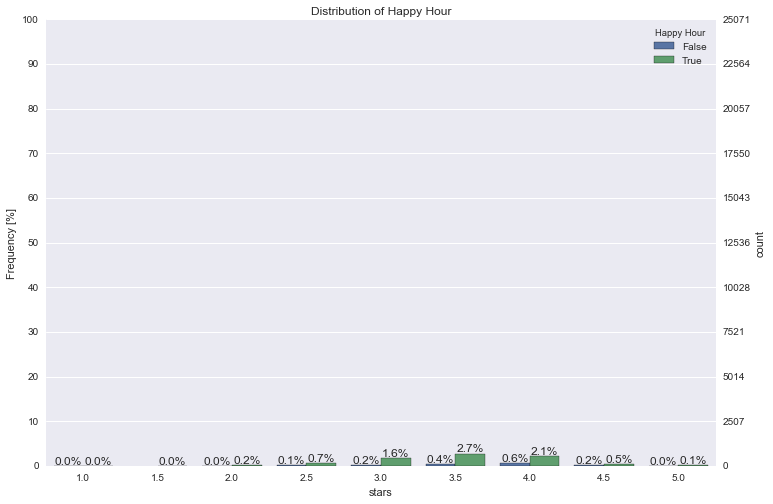

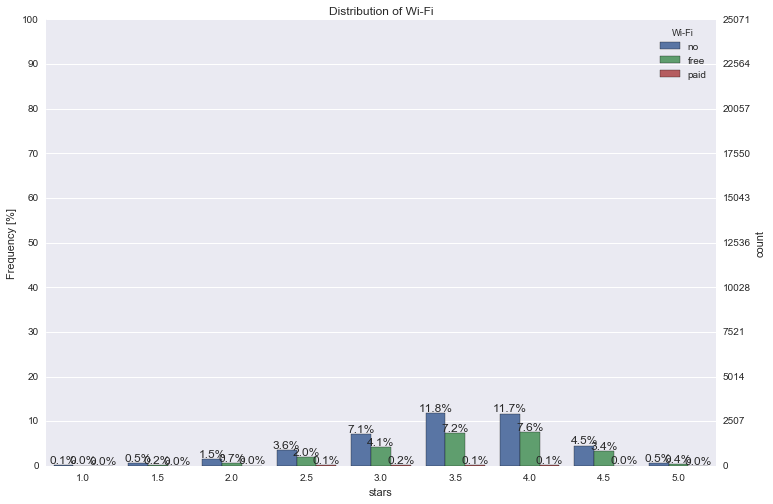

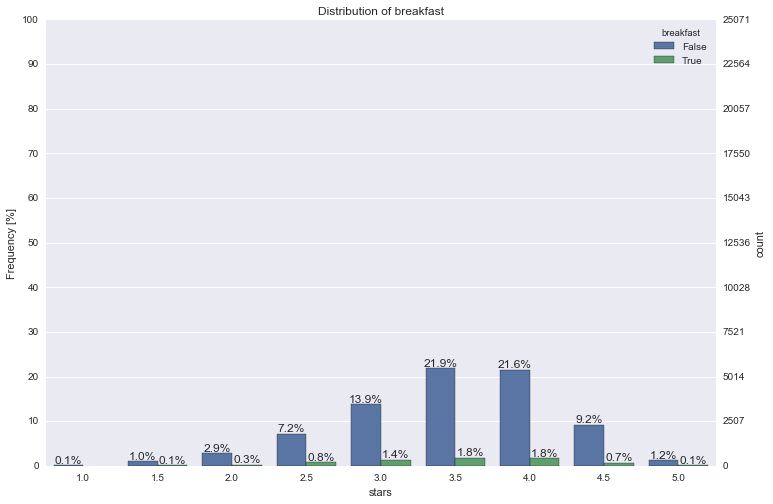

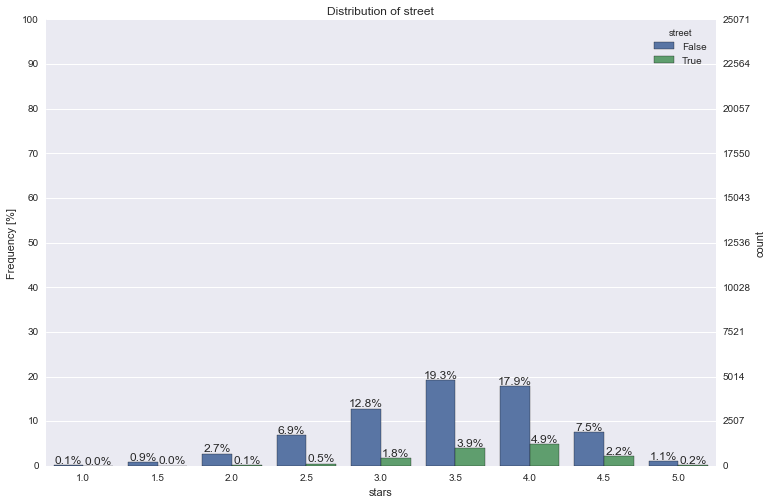

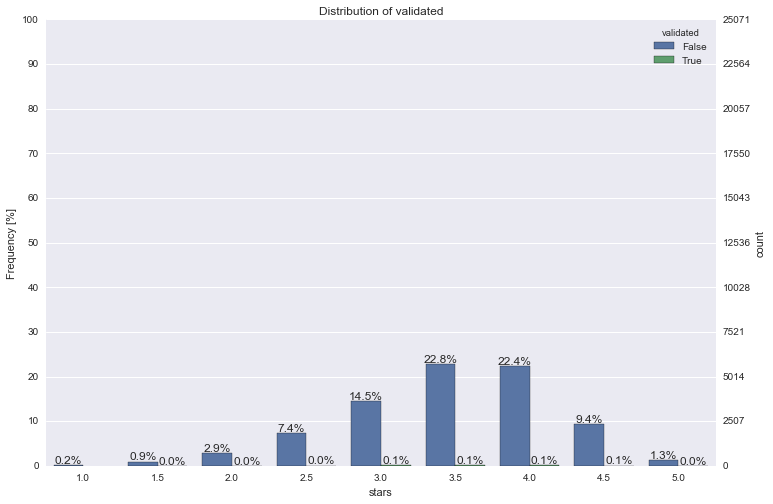

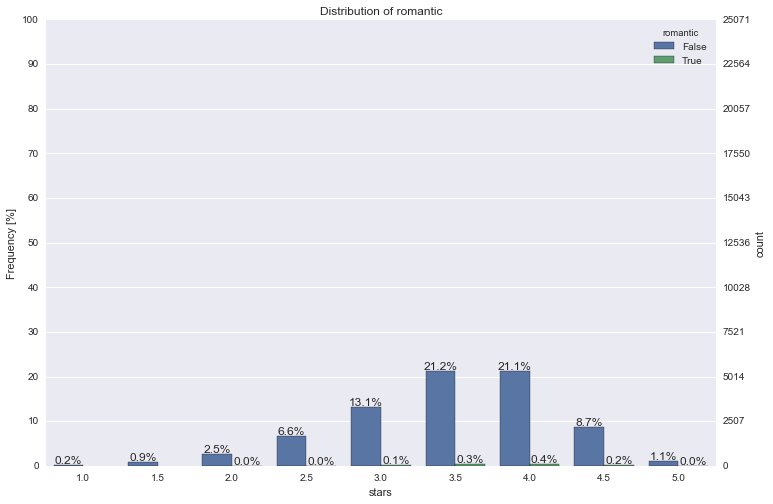

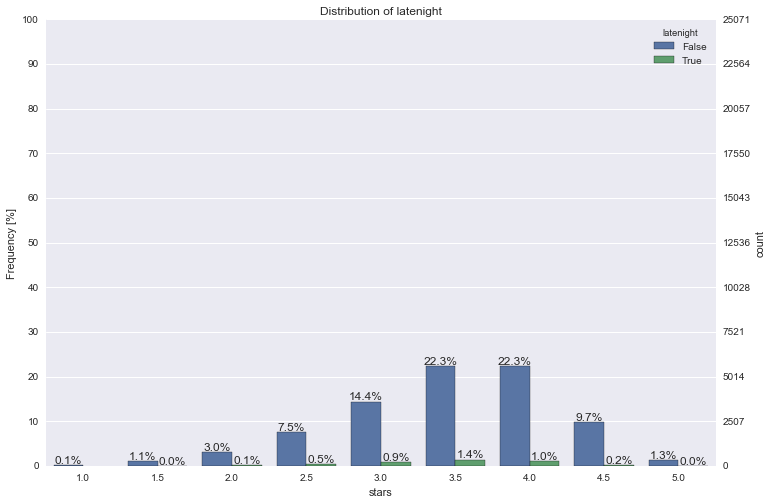

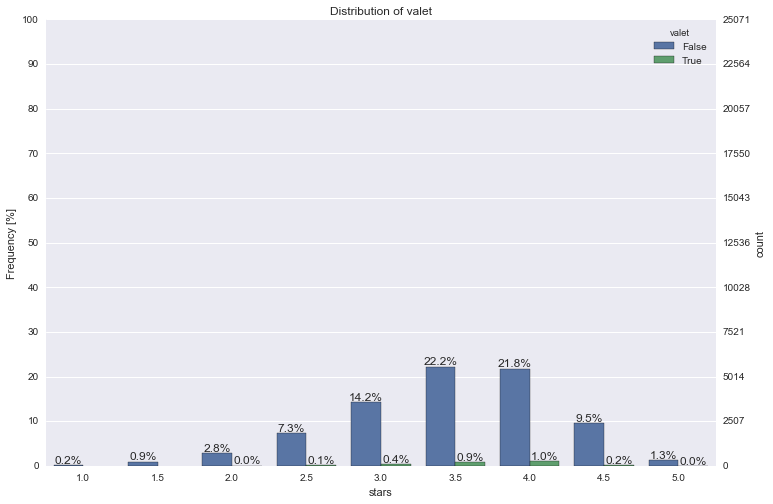

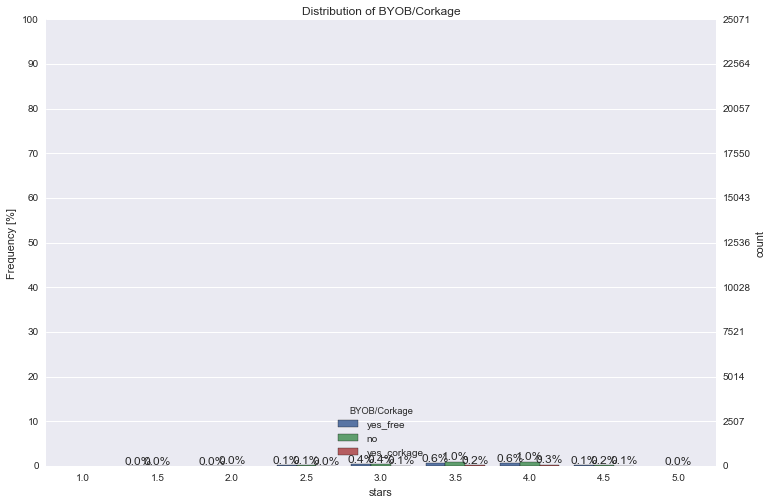

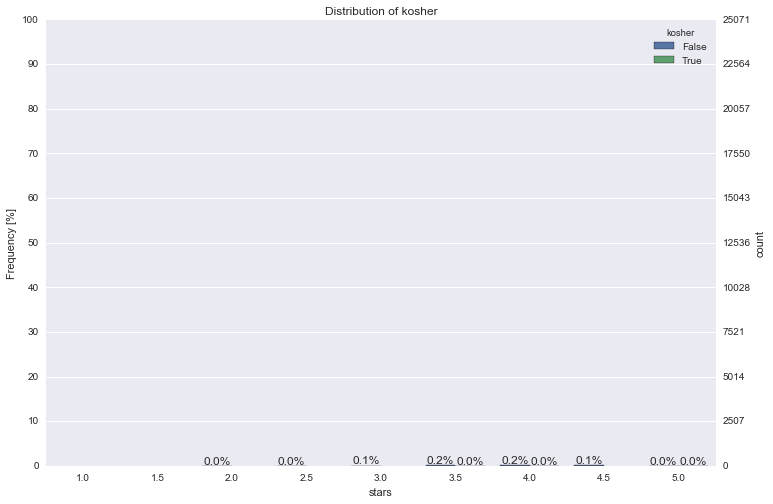

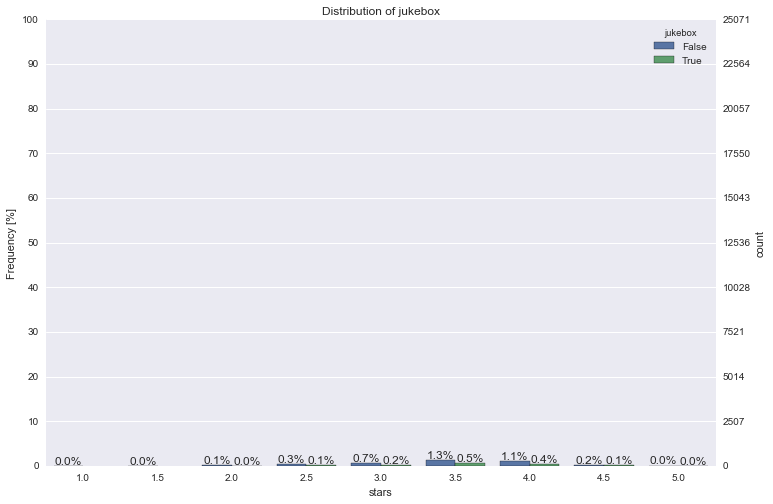

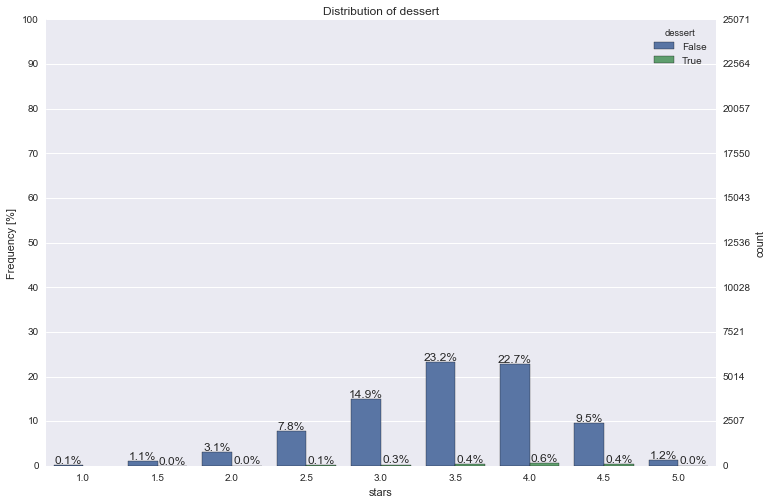

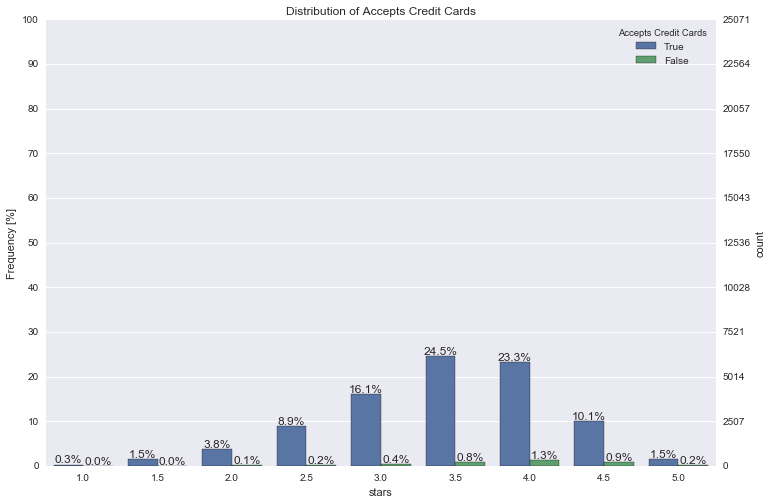

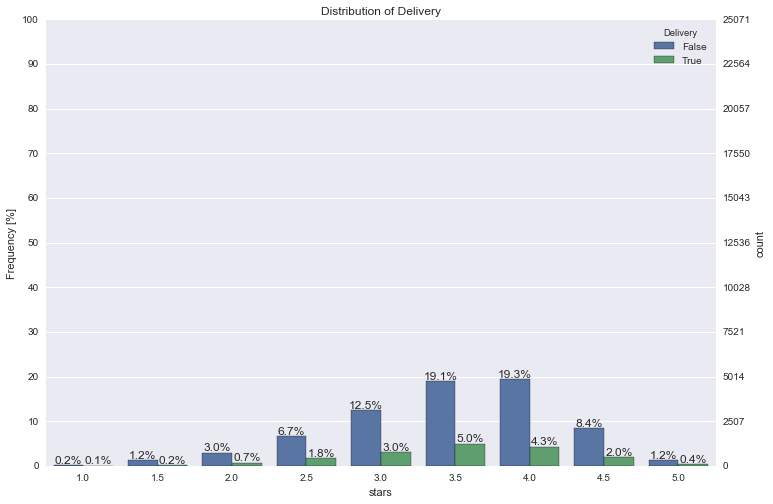

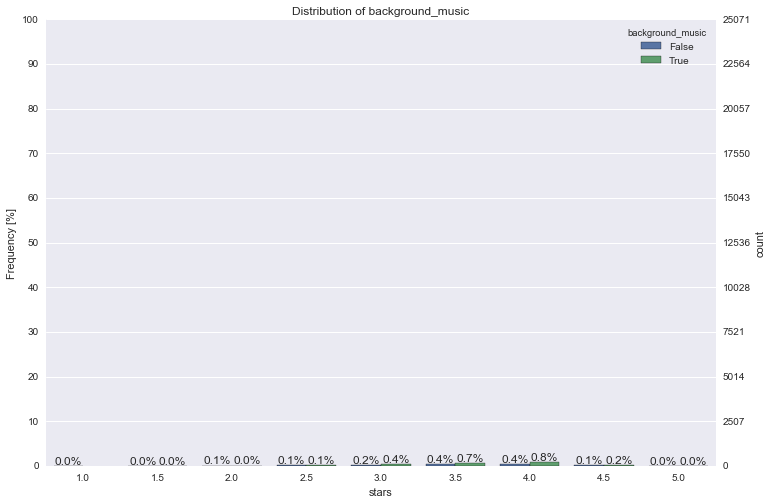

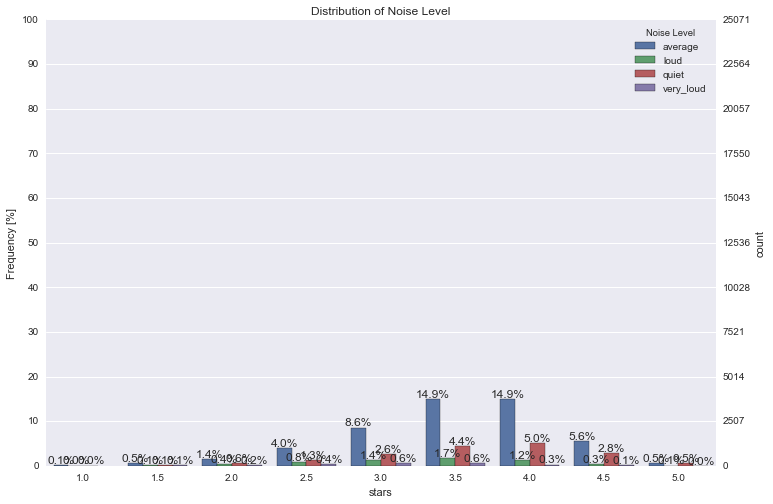

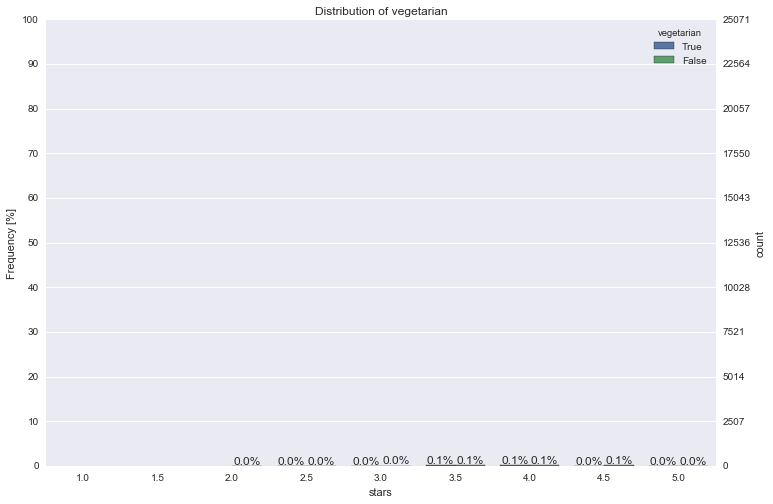

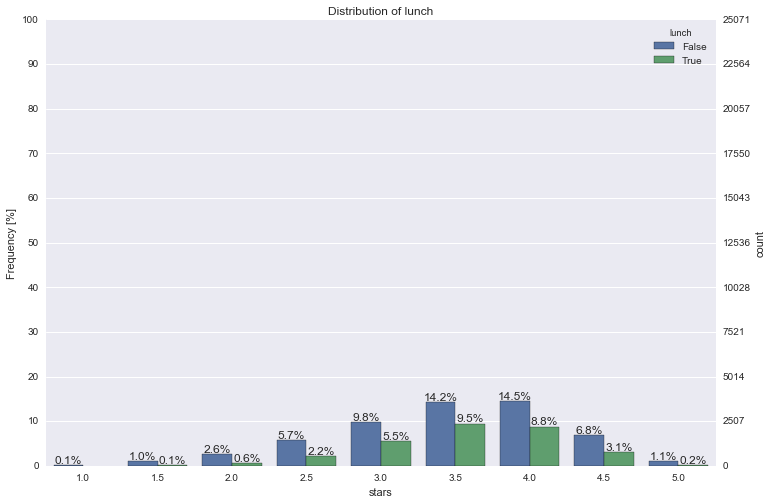

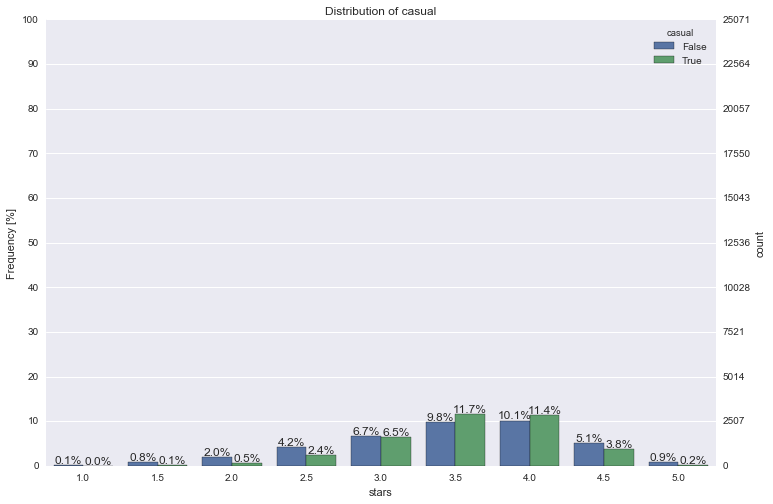

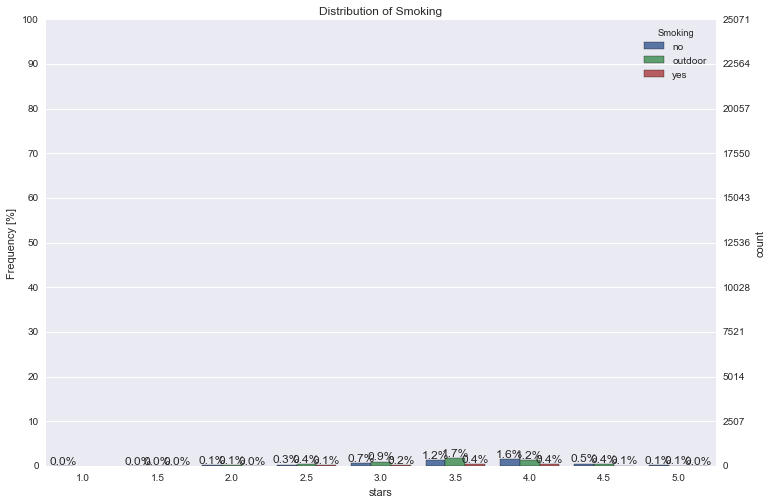

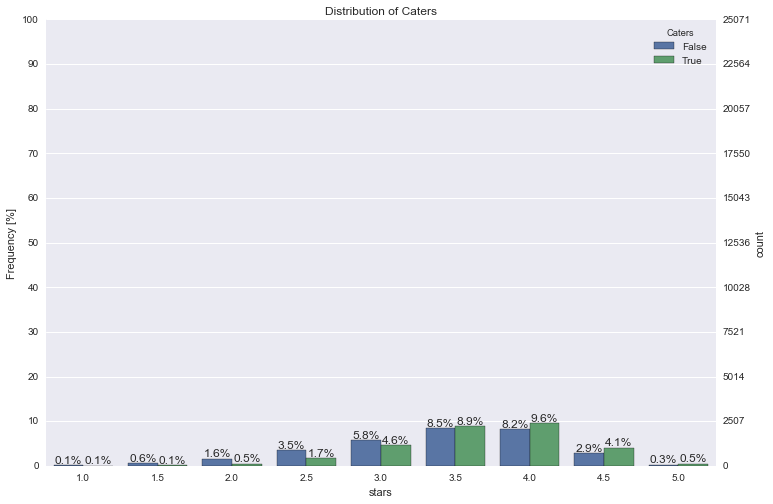

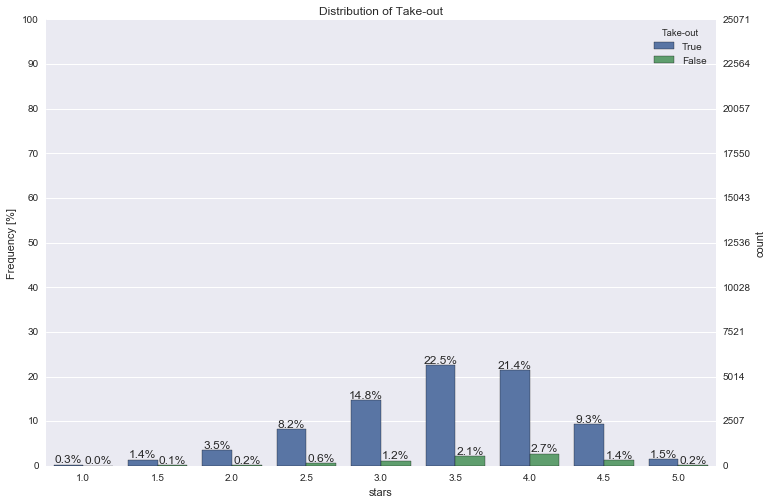

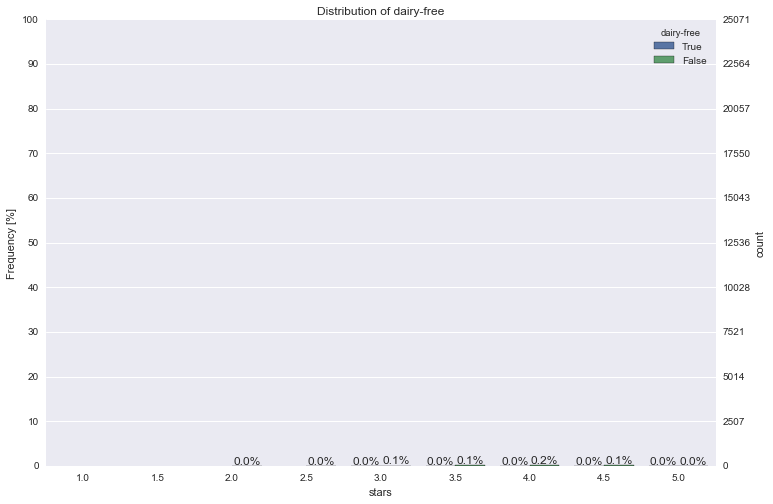

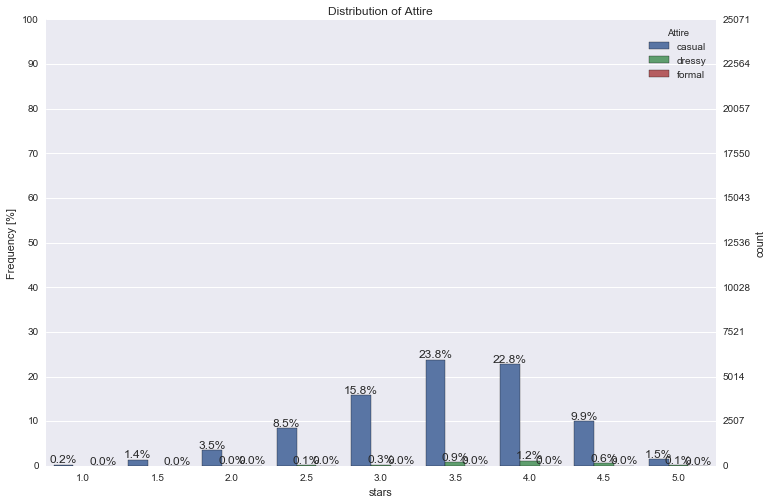

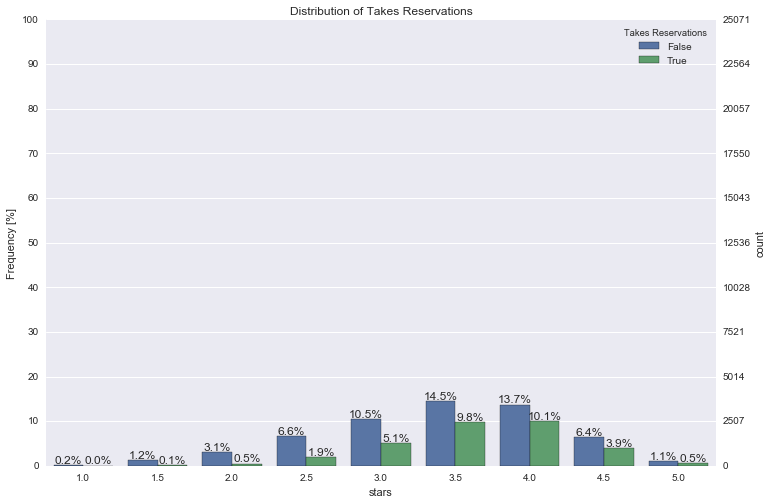

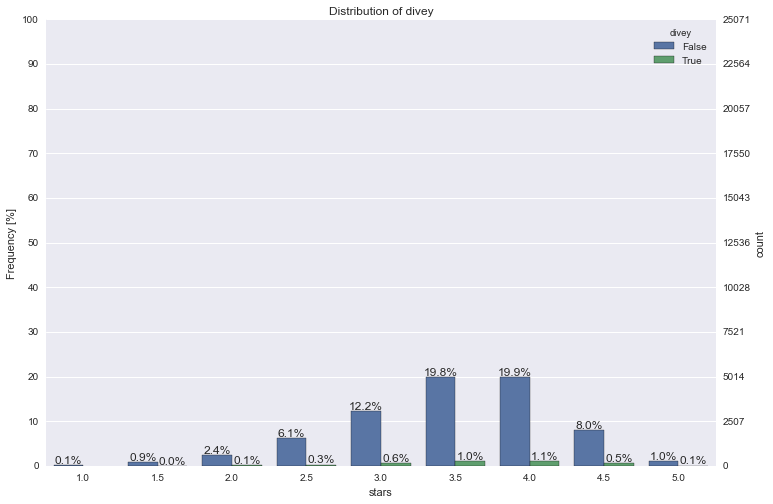

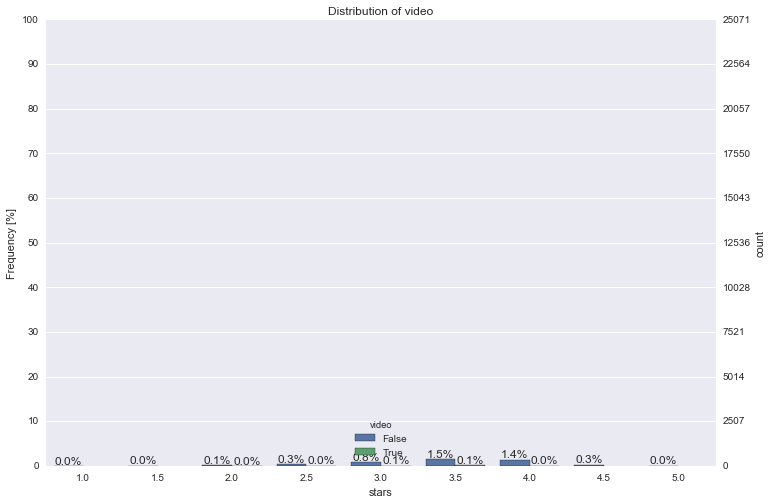

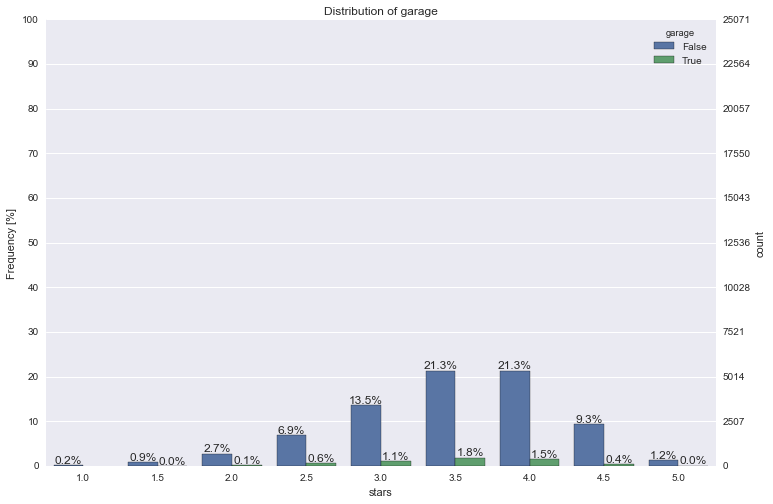

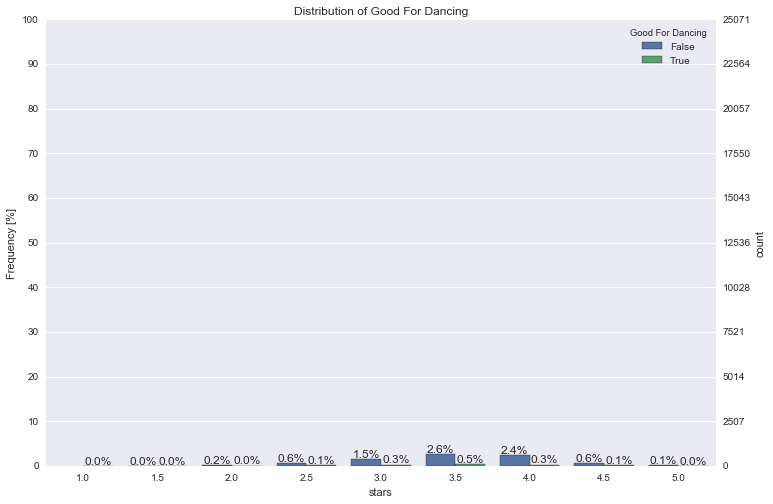

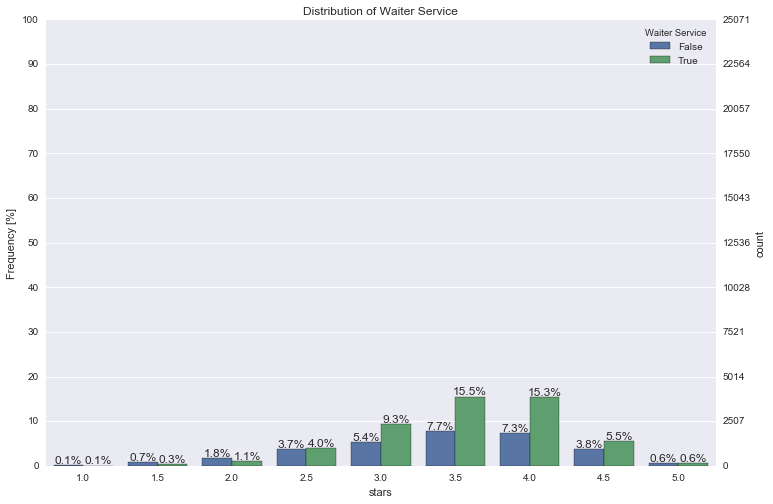

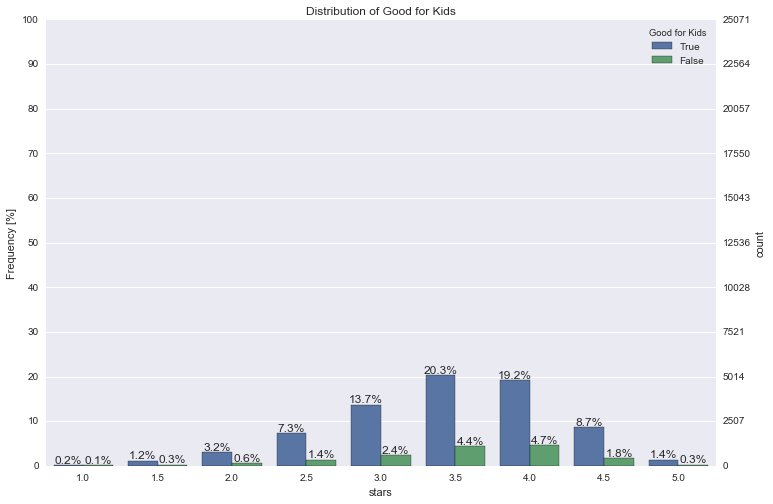

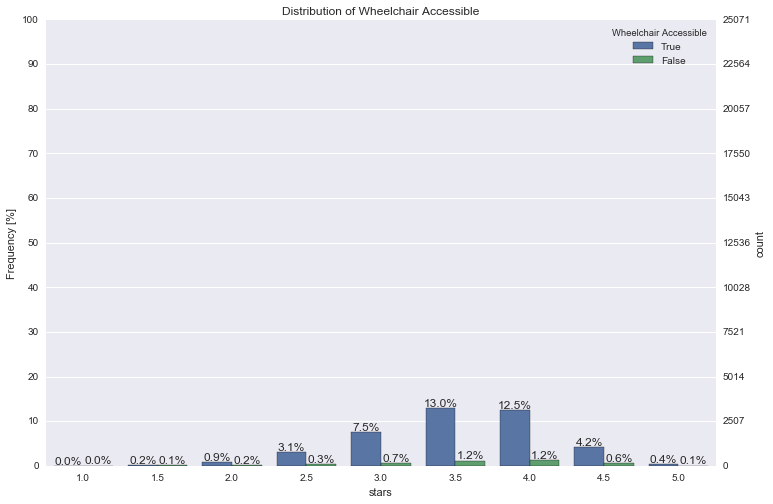

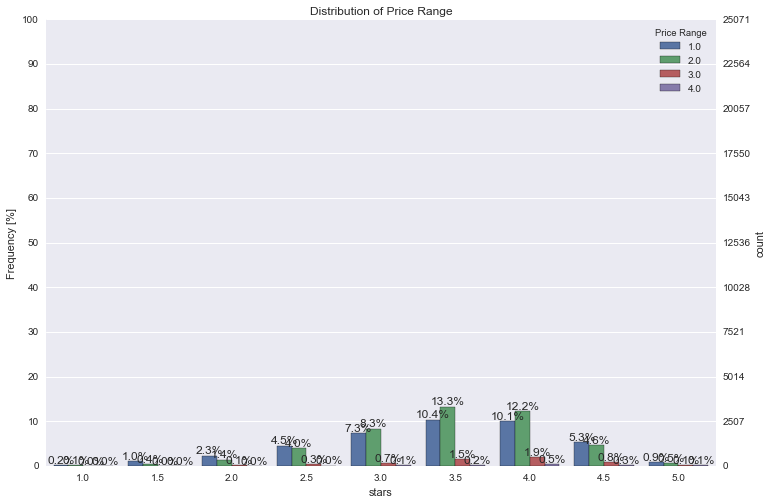

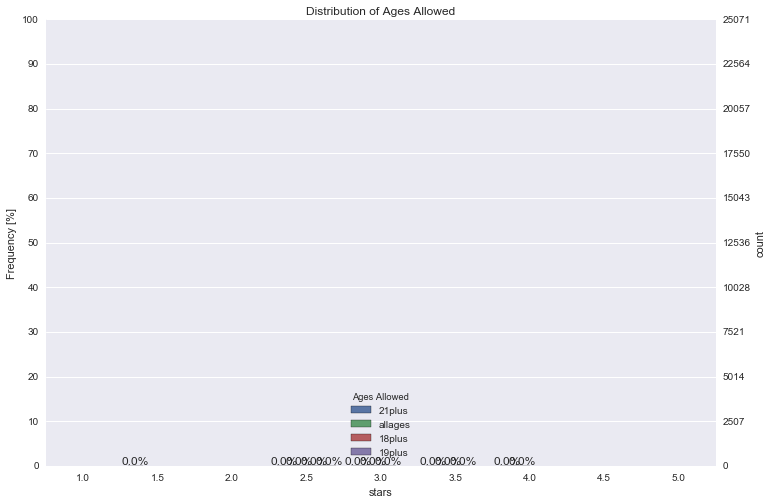

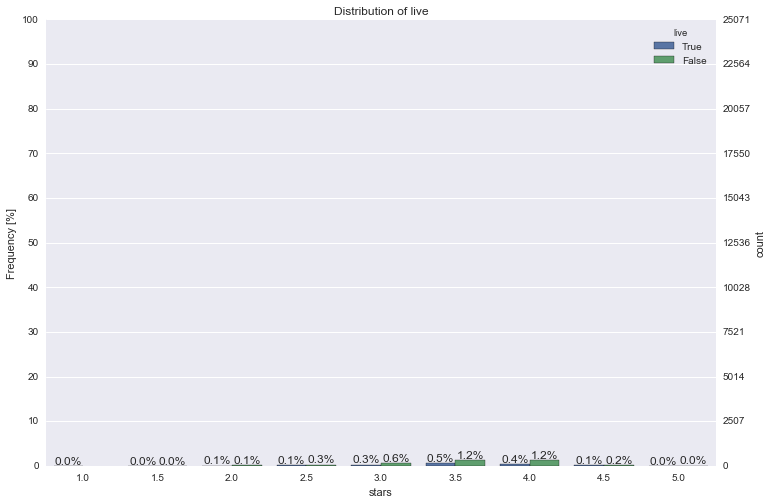

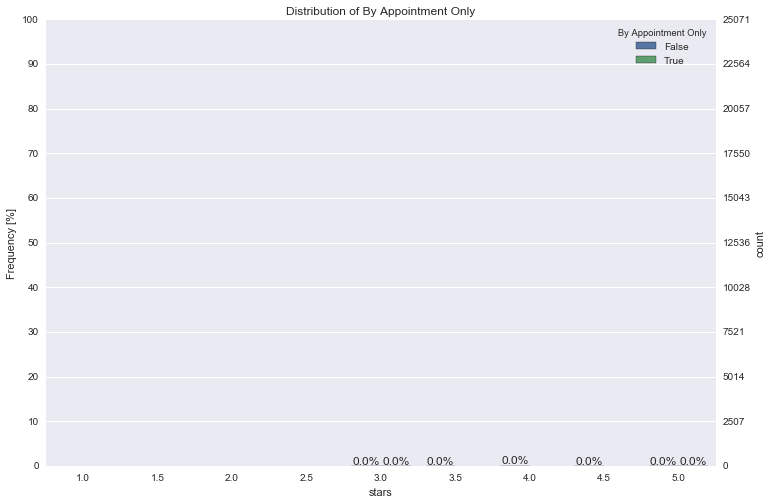

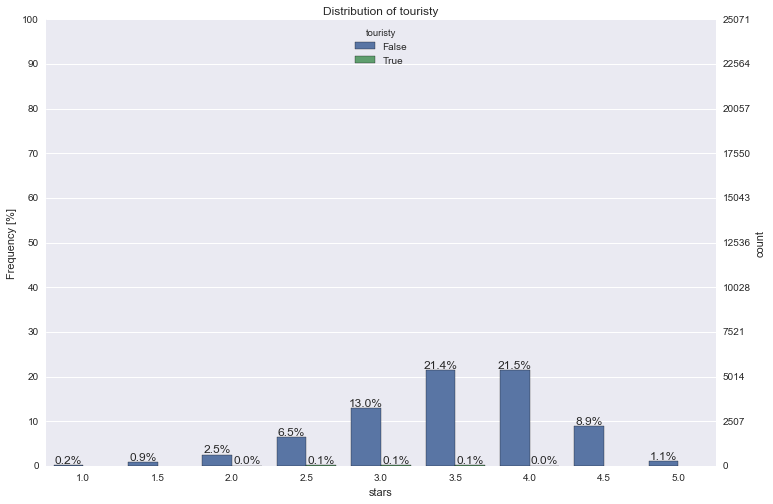

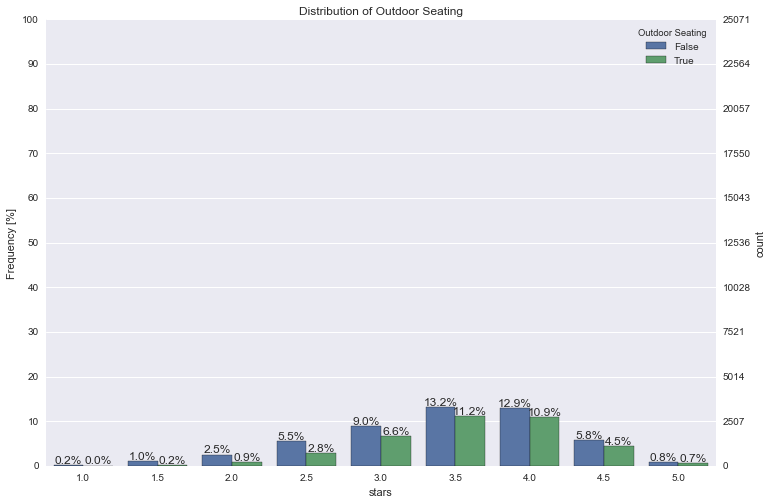

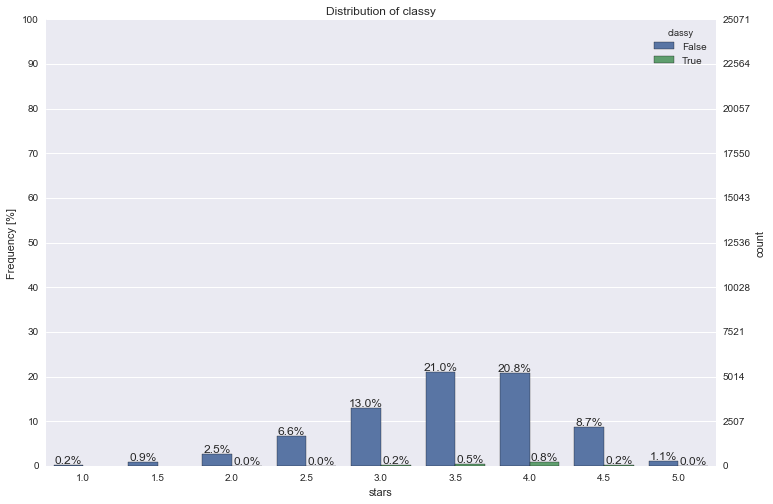

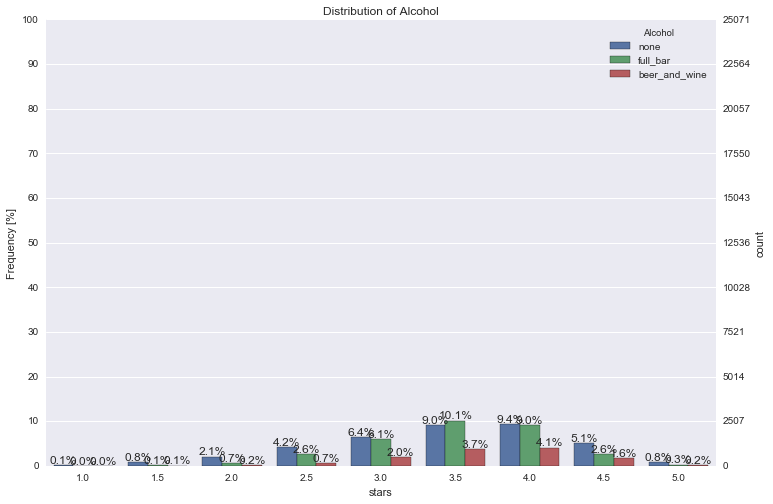

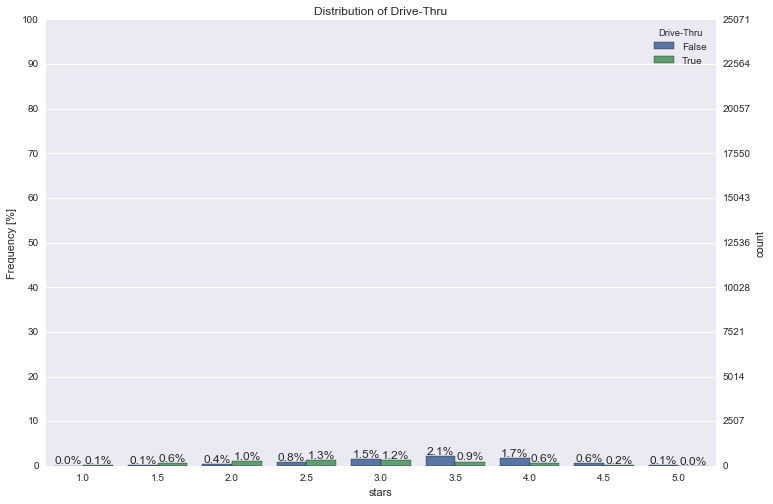

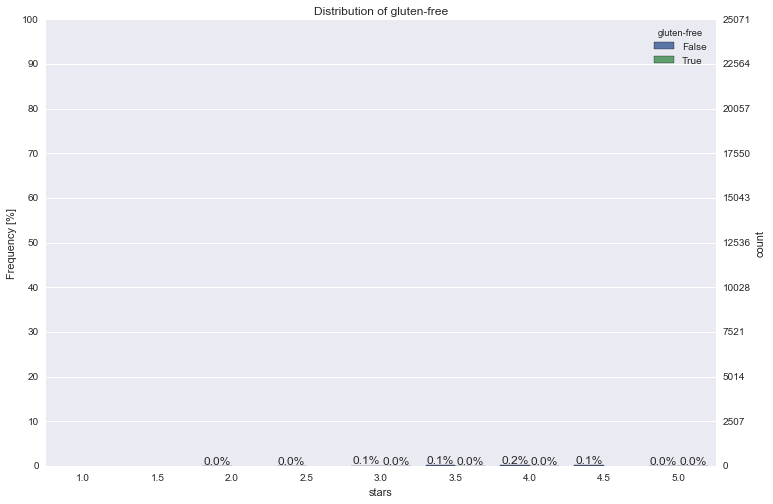

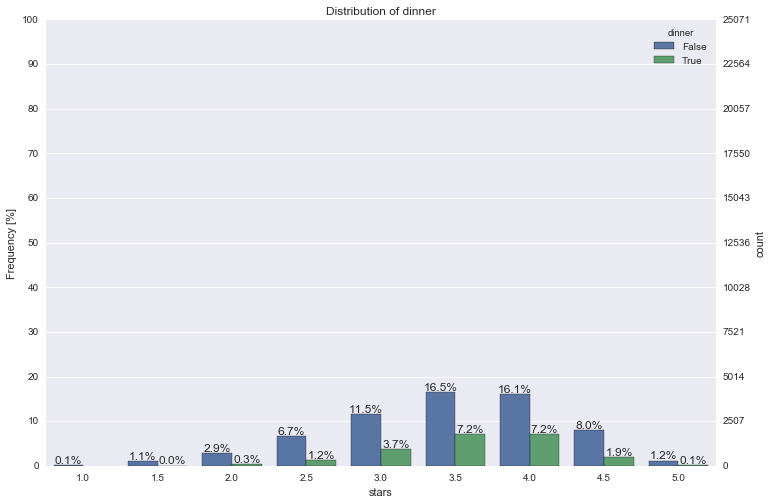

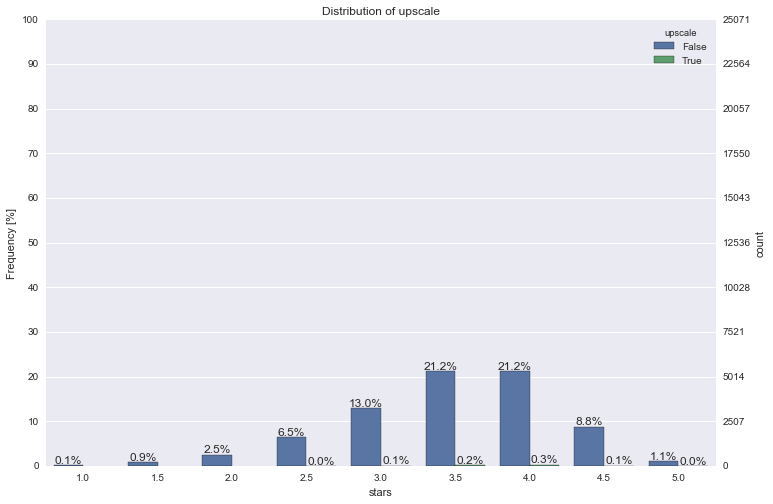

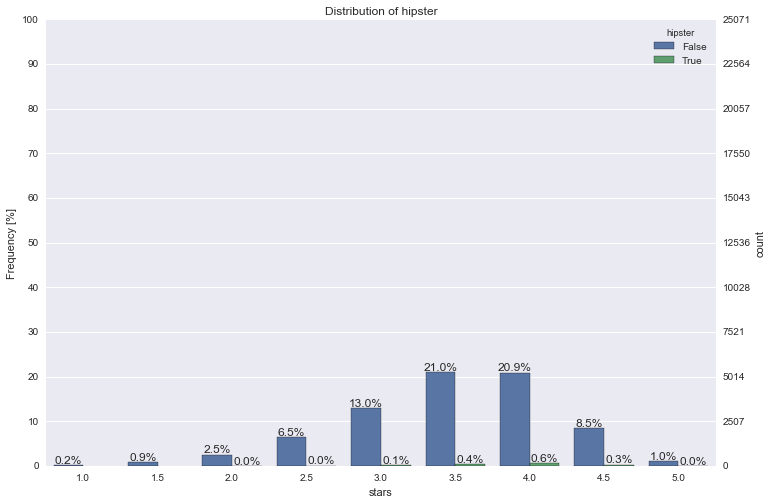

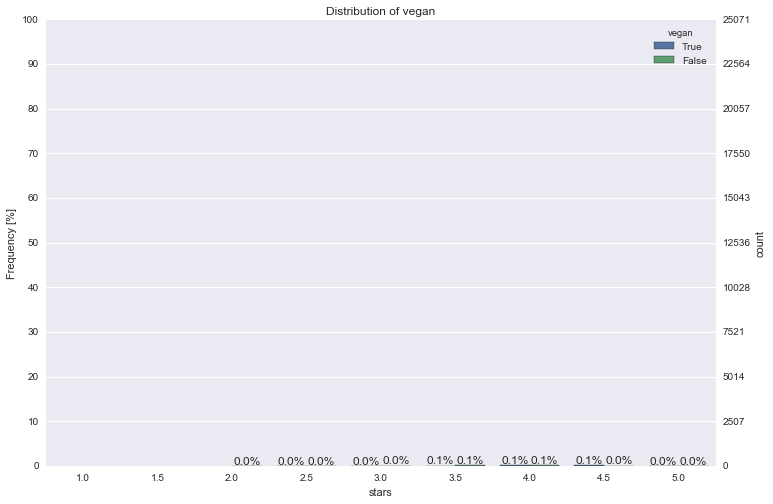

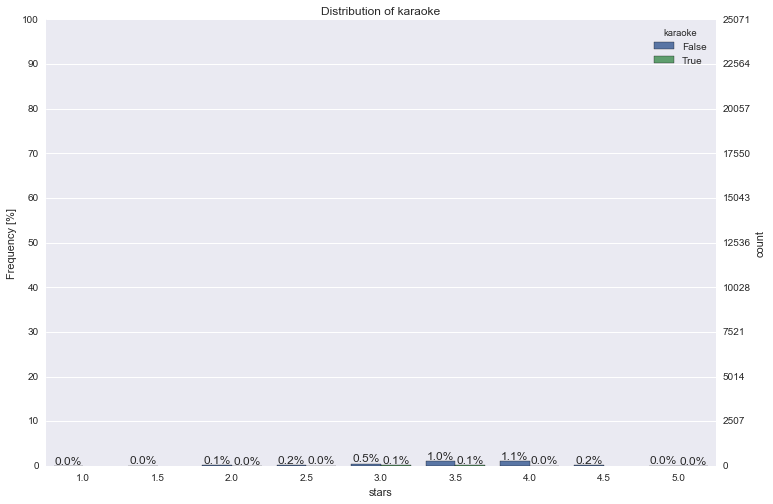

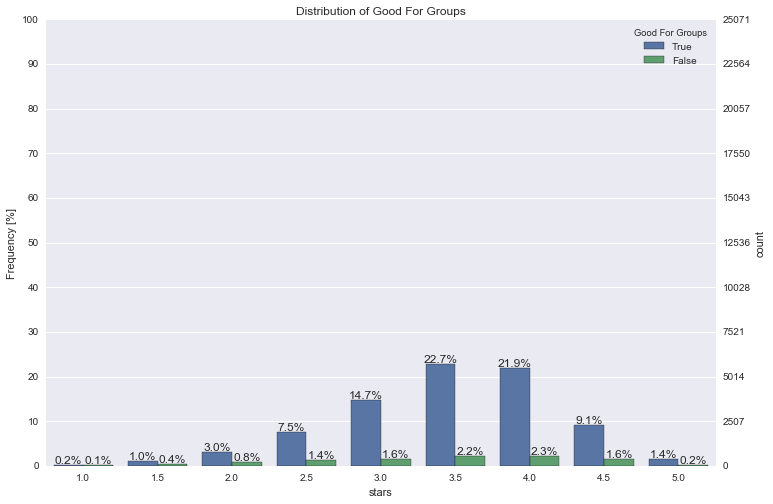

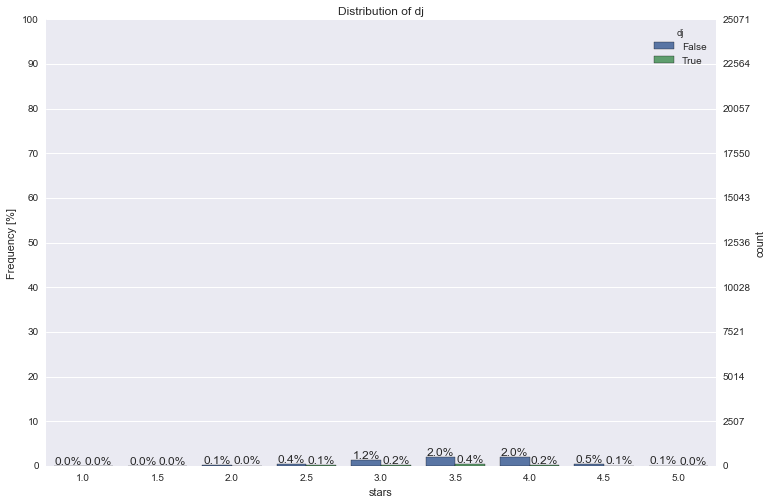

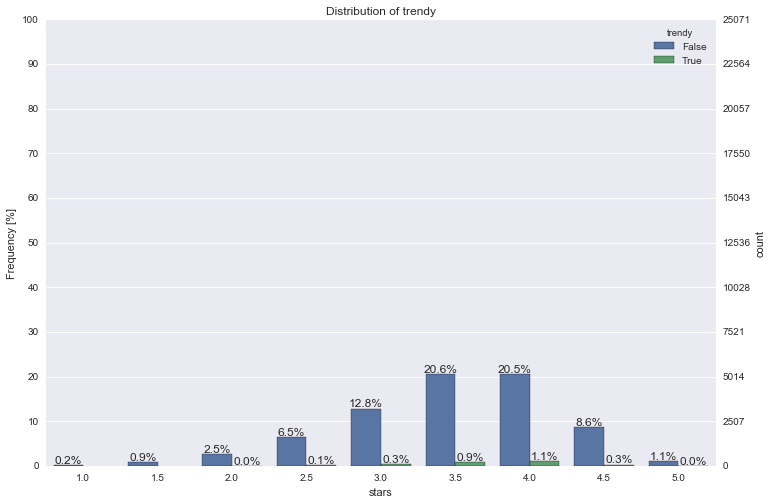

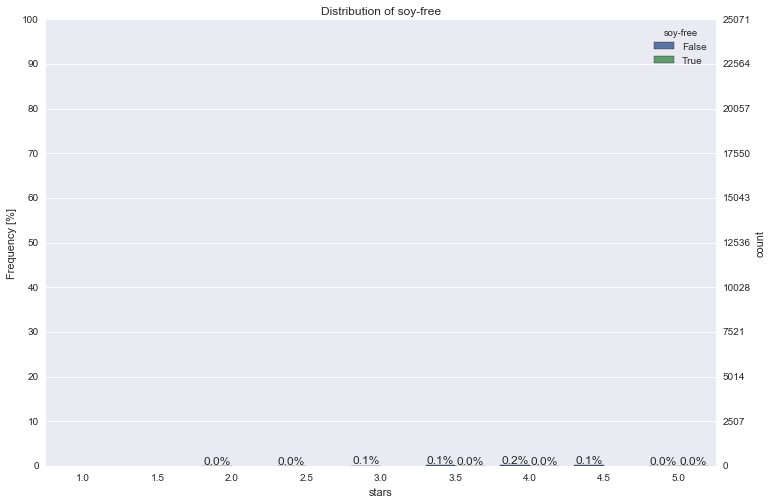

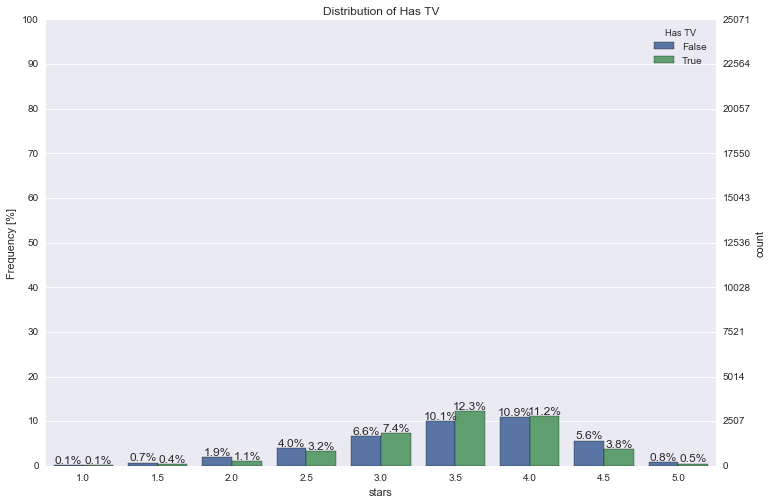

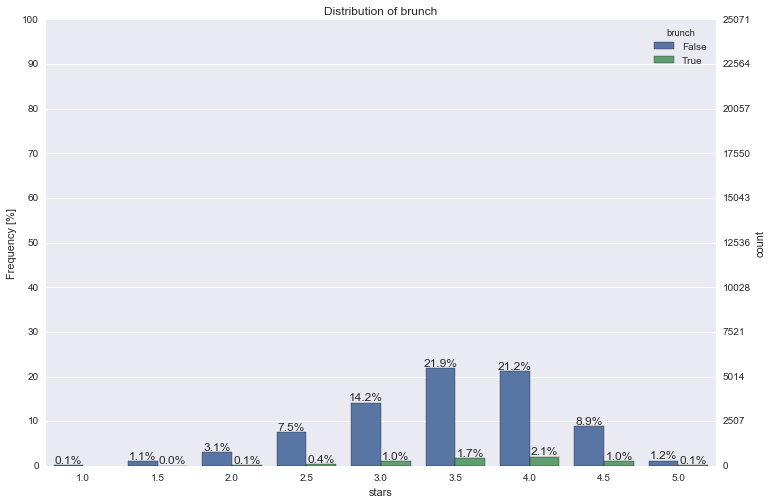

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

# Some random data
def histthis(attrName):
    dfWIM = rest_data_df
    ncount = len(dfWIM[attrName])

    plt.figure(figsize=(12,8))
    ax = sns.countplot(x="stars", hue = attrName, data=dfWIM)
    plt.title('Distribution of %s'%attrName)
    #plt.xlabel('Number of Axles')

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')

    ax2.set_ylabel('Frequency [%]')

    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))

    # Fix the frequency range to 0-100
    ax2.set_ylim(0,100)
    ax.set_ylim(0,ncount)

    # And use a MultipleLocator to ensure a tick spacing of 10
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

    # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
    ax2.grid(None)

    #plt.savefig('snscounter.pdf')

for attr in attributes:
    histthis(attr)


C:\Users\Robert\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


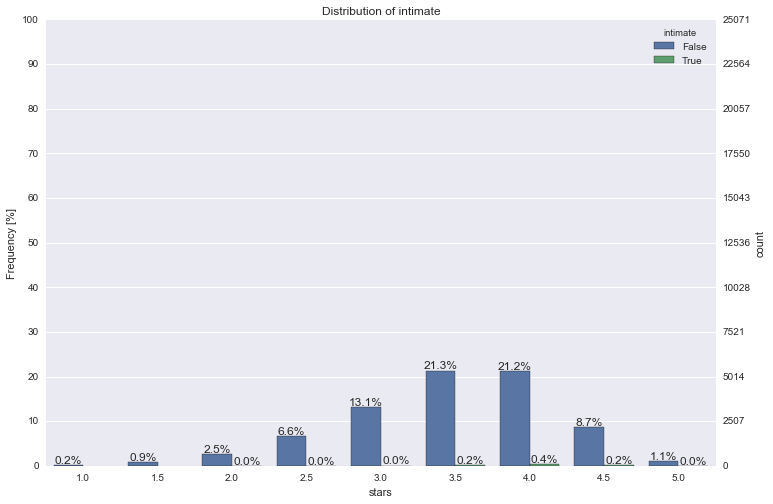

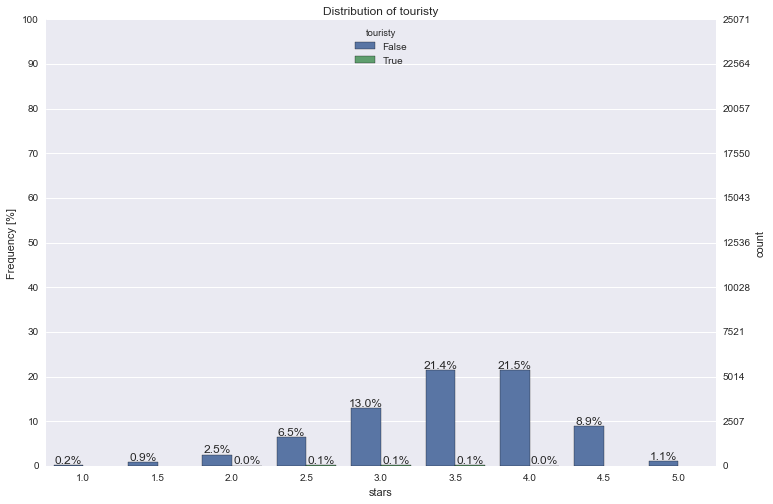

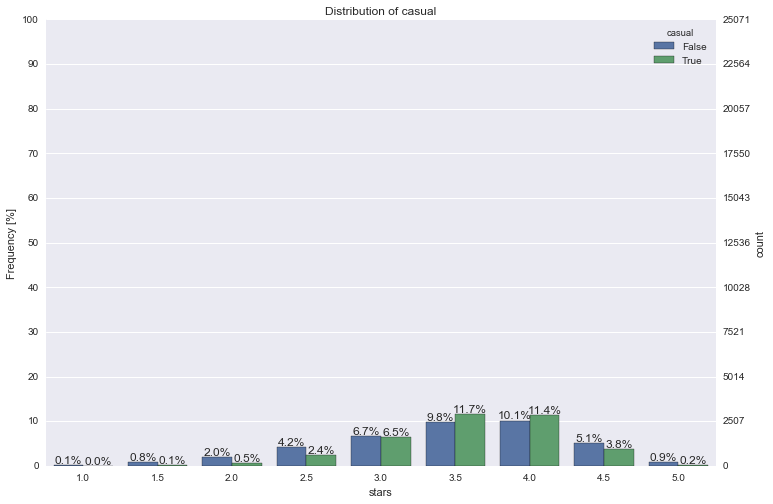

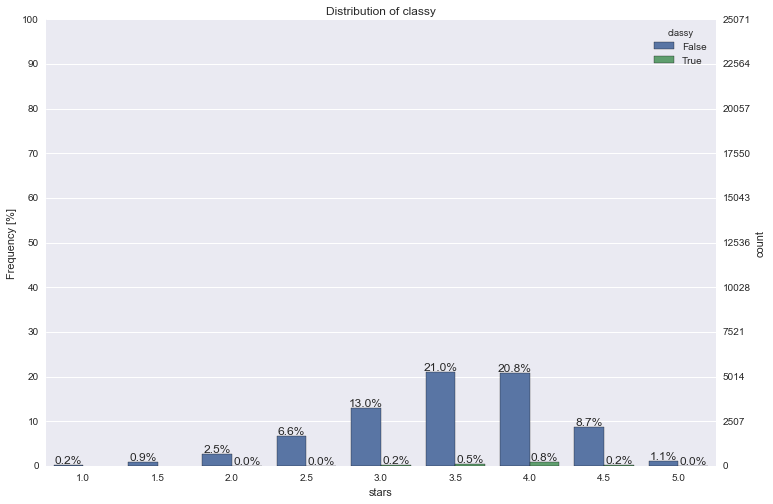

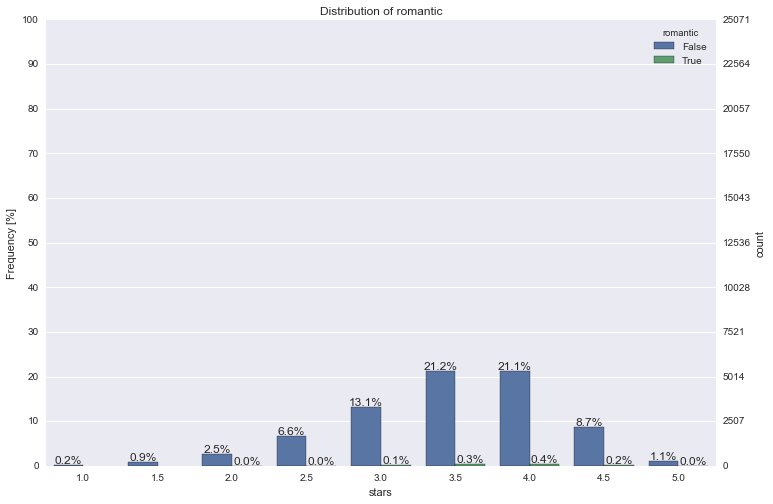

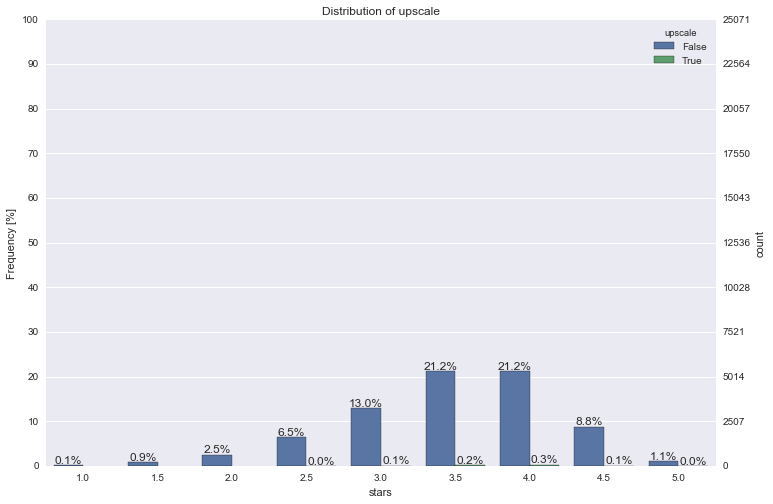

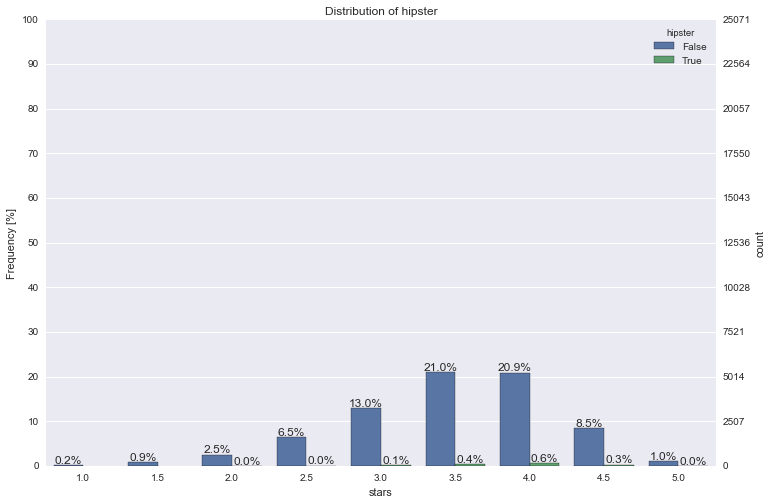

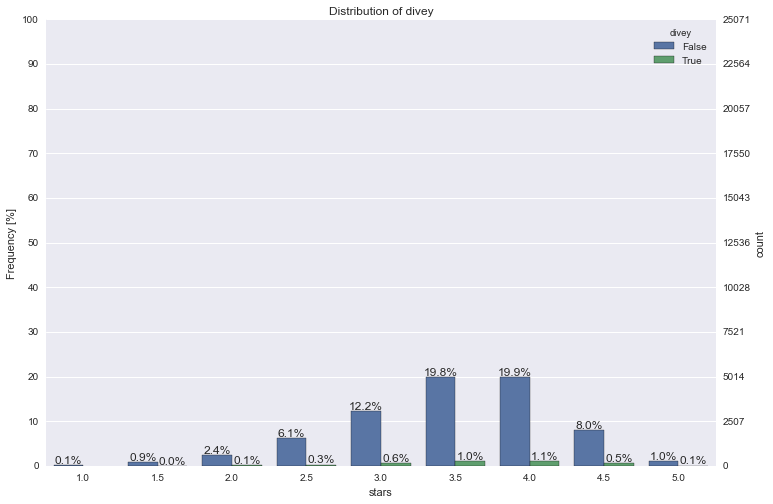

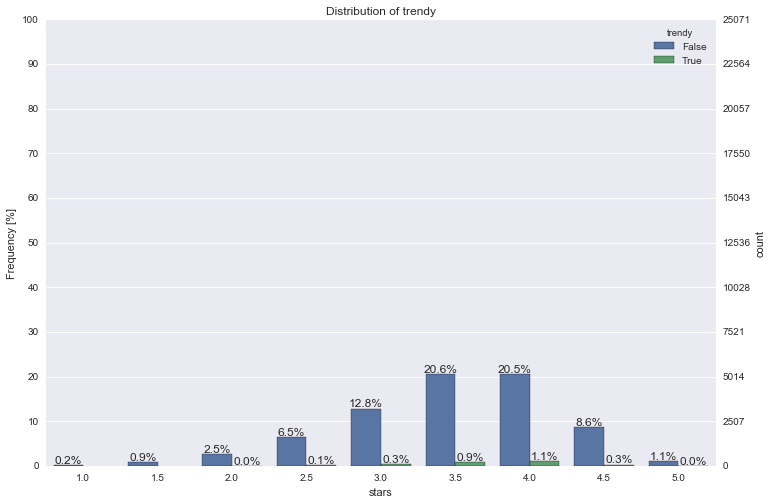

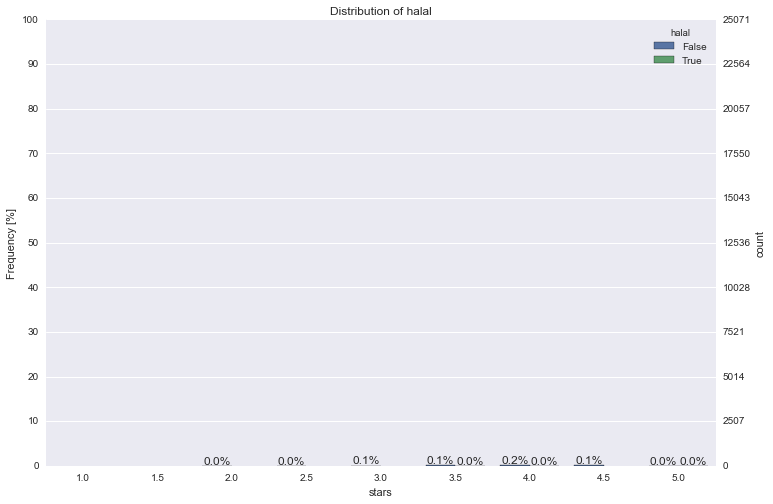

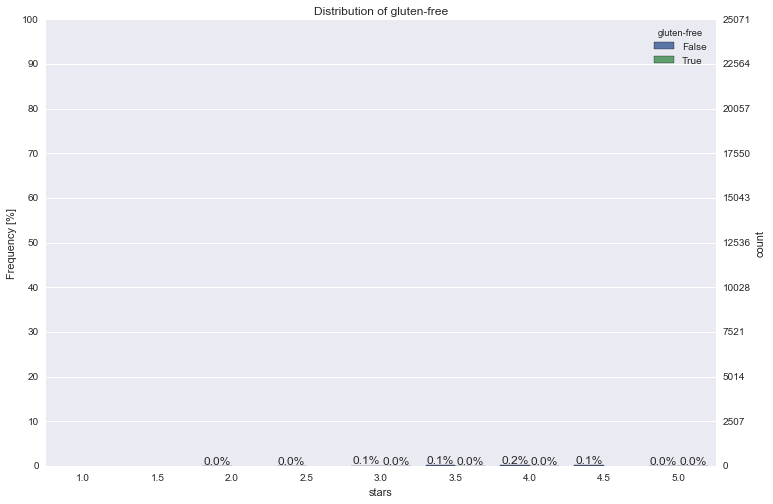

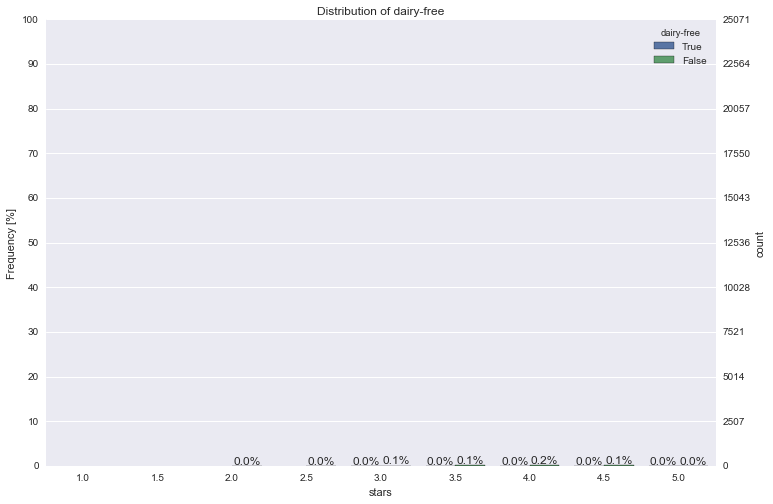

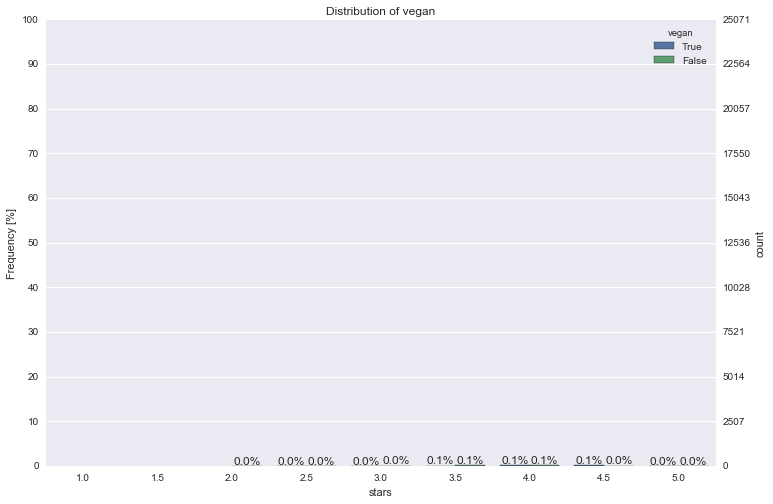

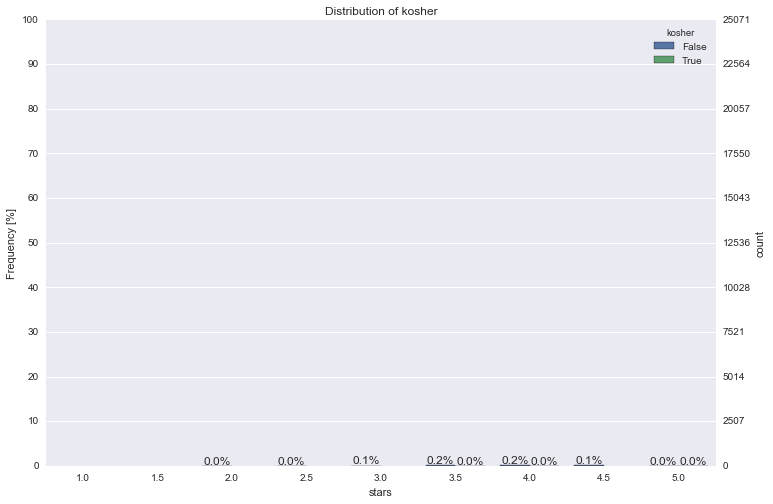

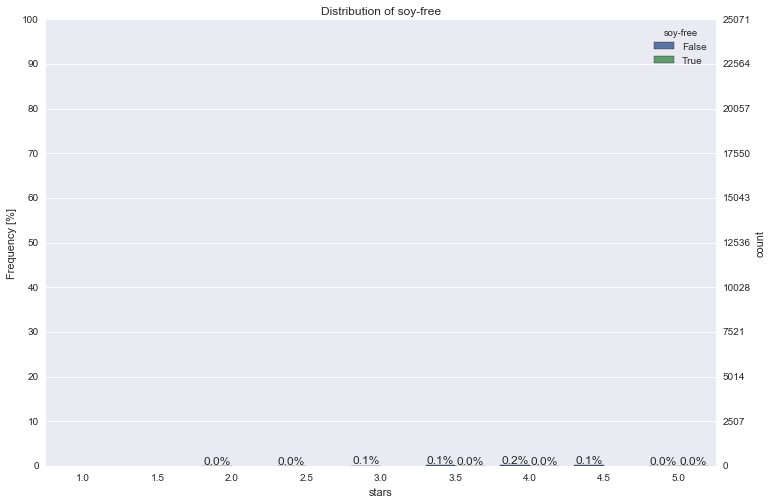

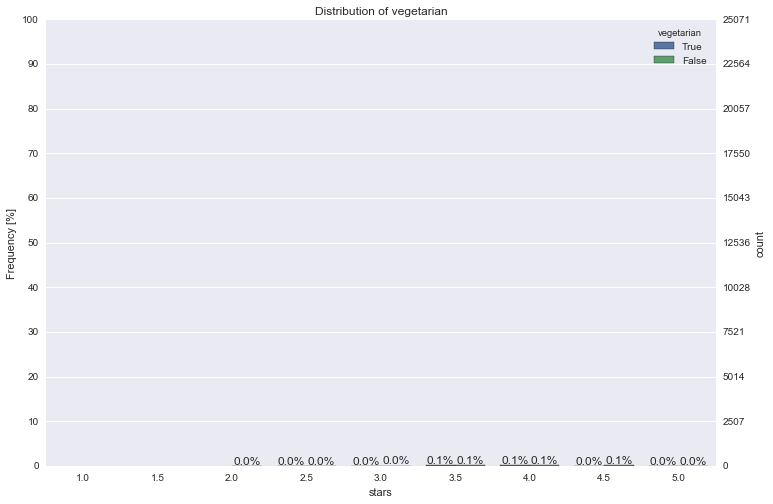

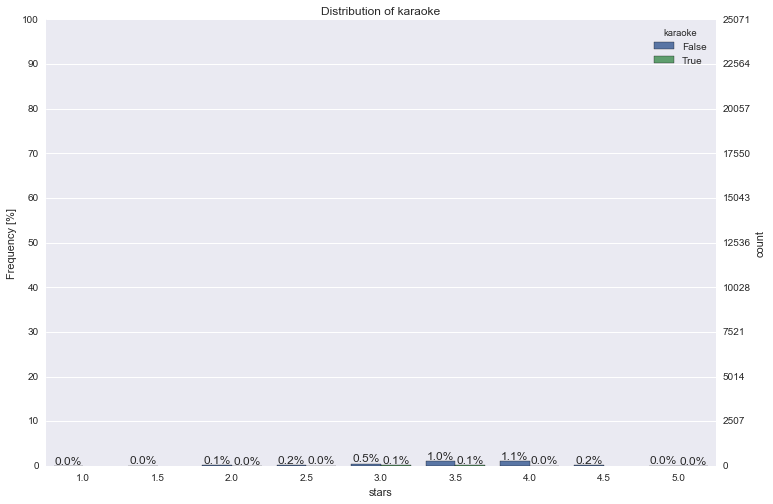

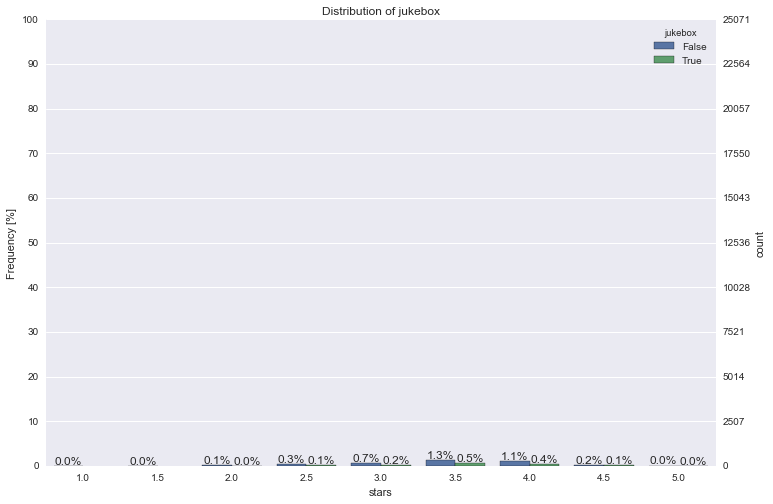

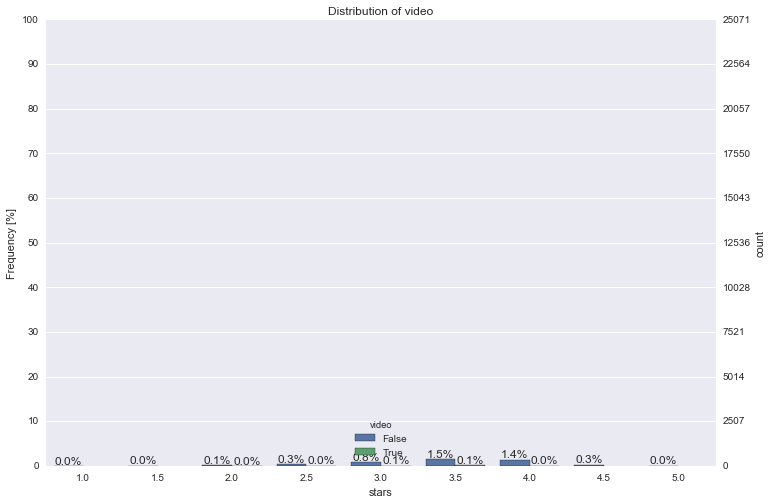

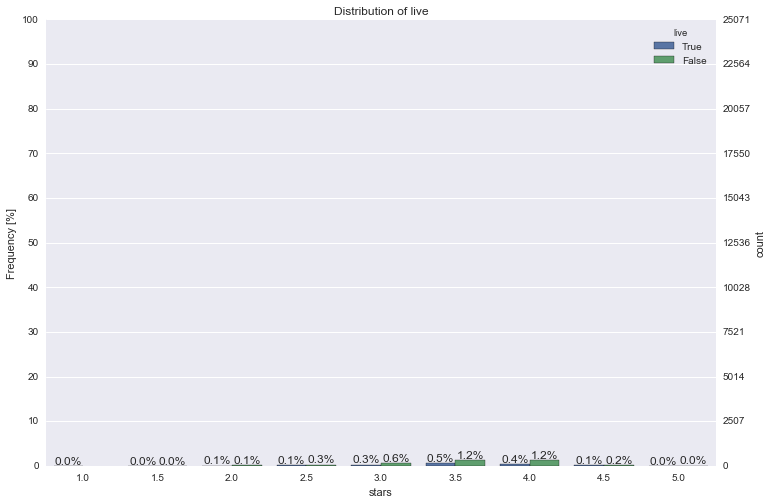

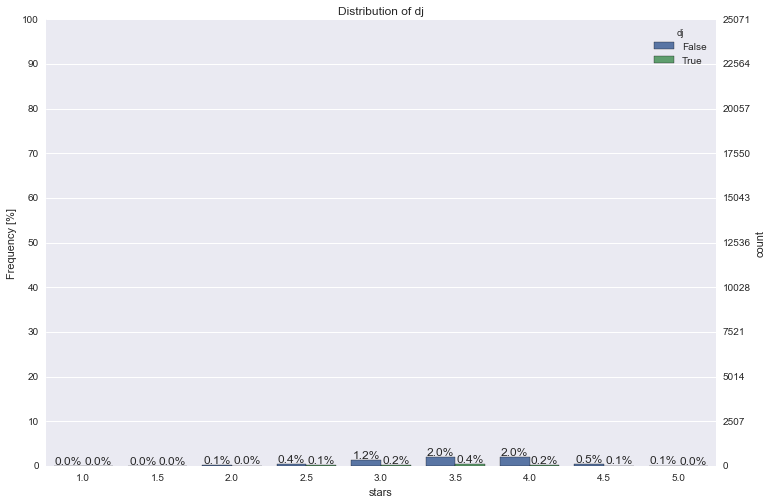

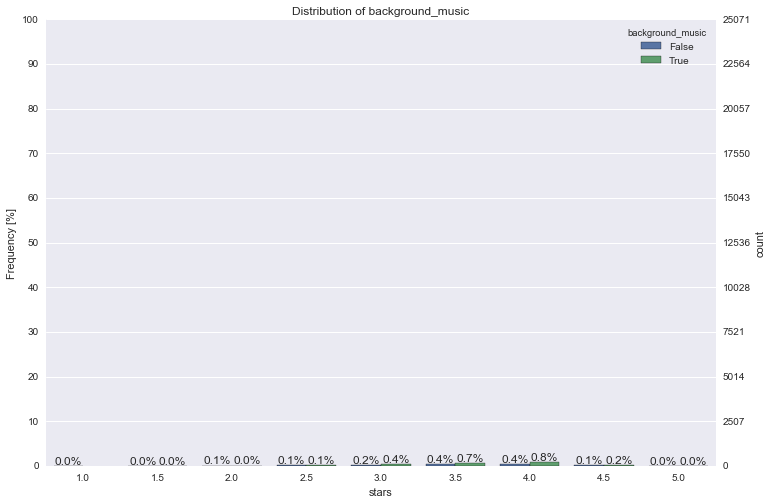

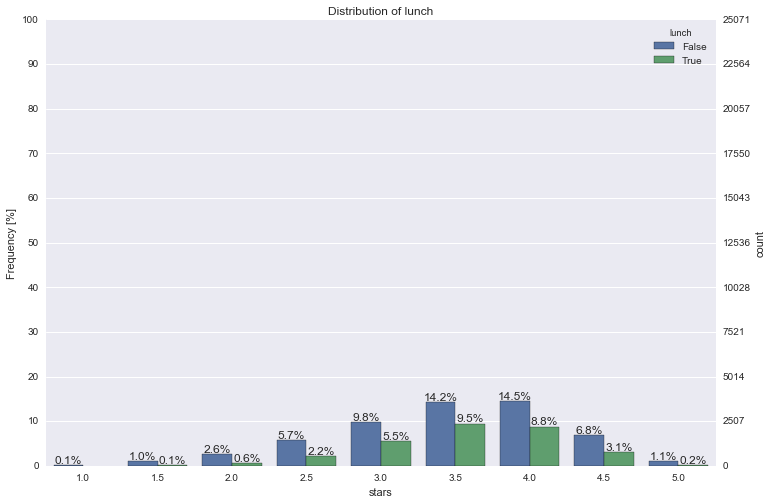

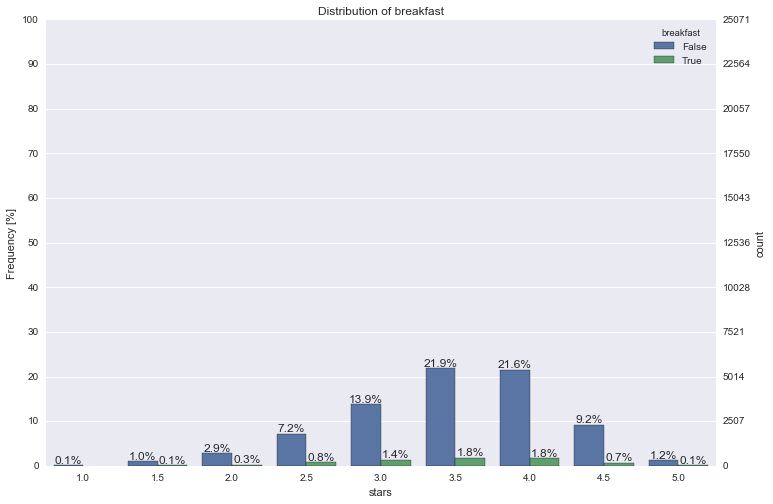

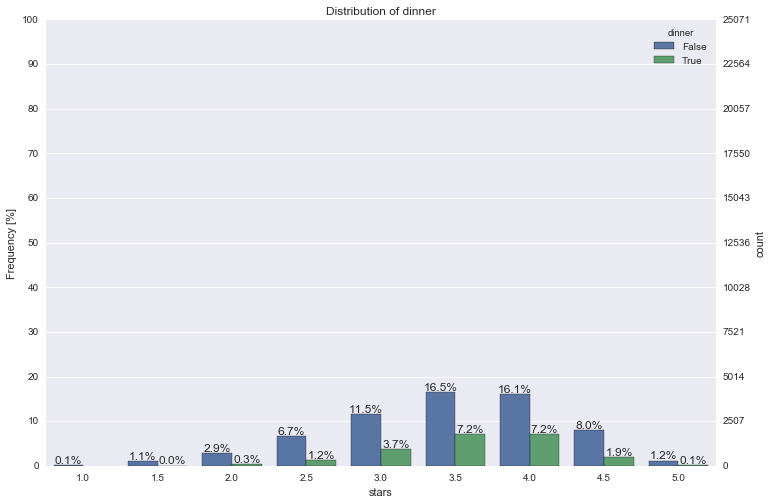

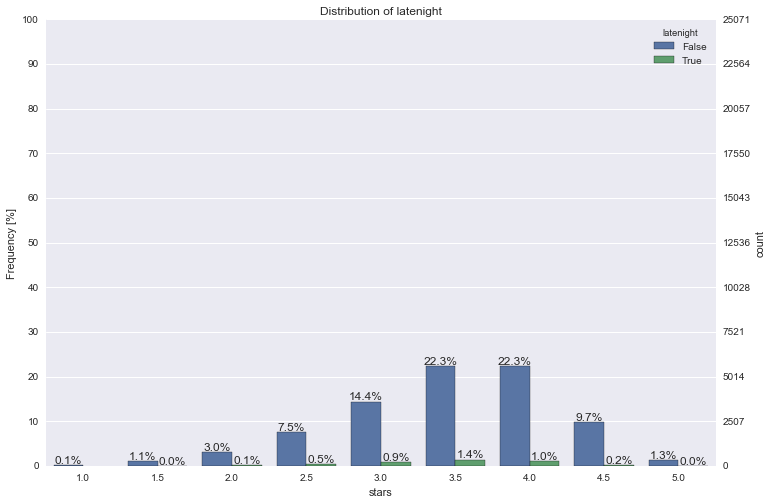

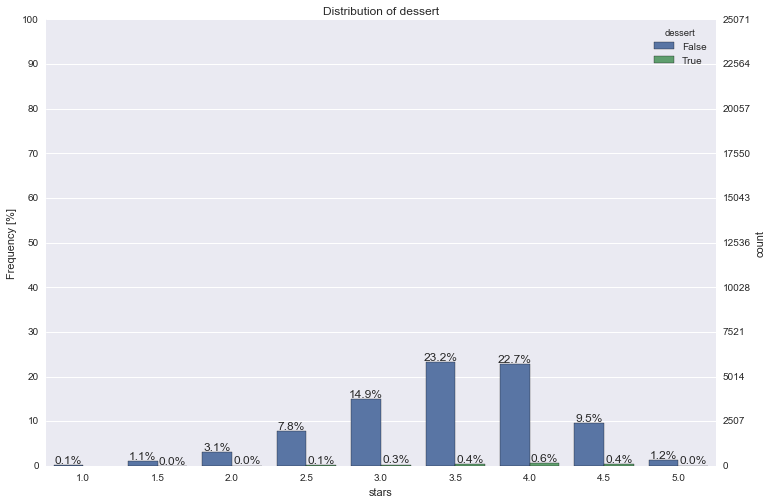

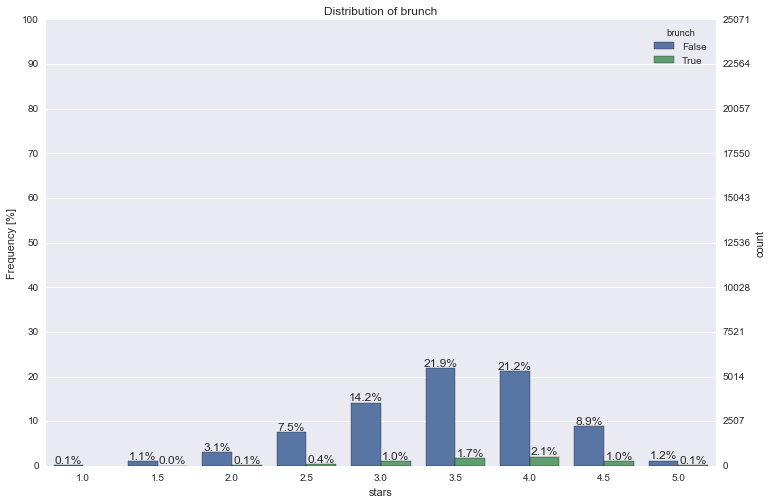

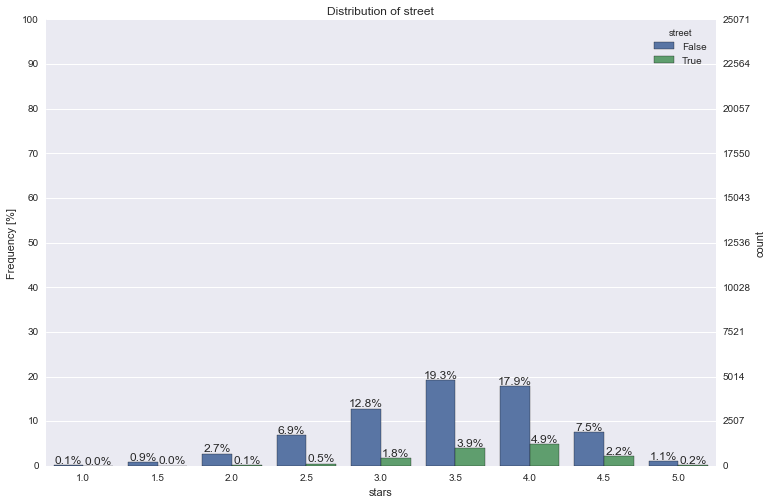

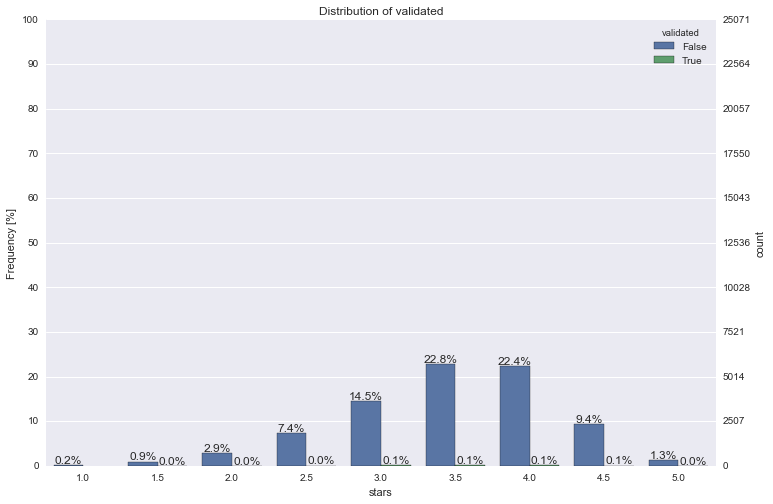

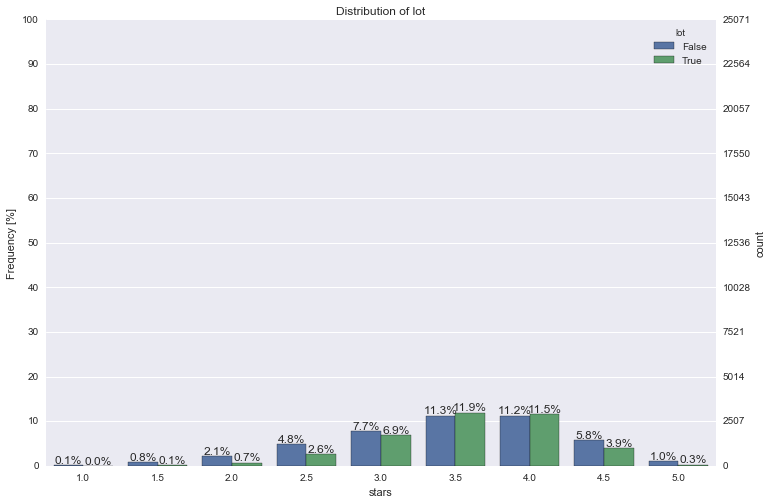

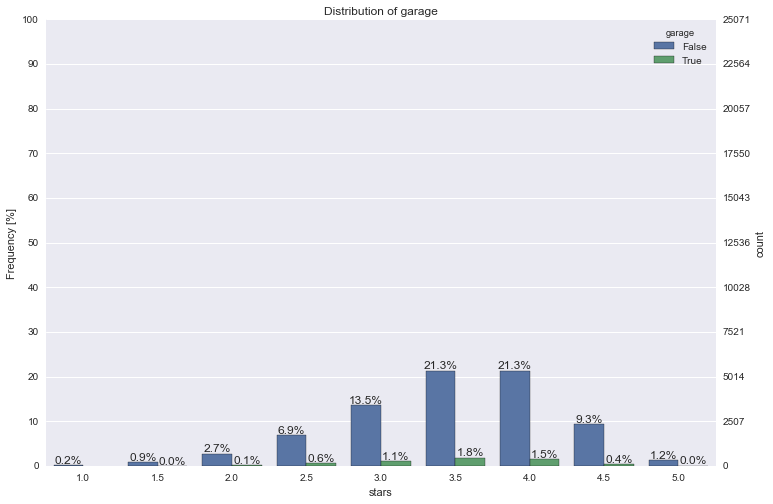

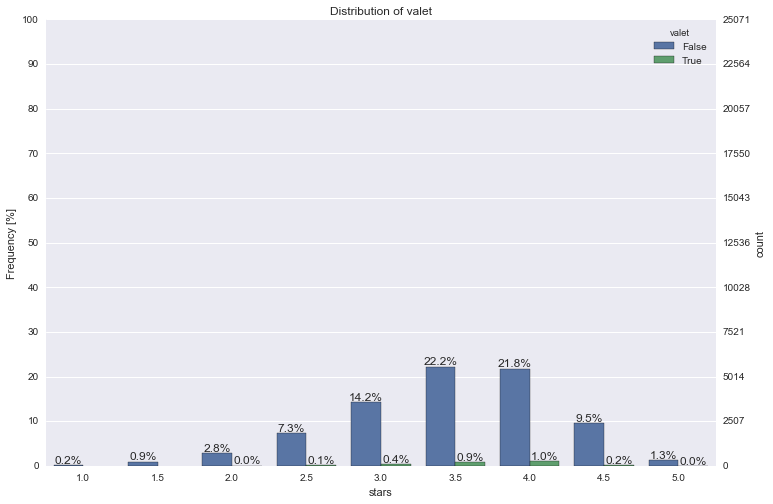

In [45]:
for attrNames in levels:
    for attrName in levels[attrNames]:
        histthis(attrName)

In [40]:
import numpy as np
print("mean: %f"%np.mean(rest_data_df['stars']))
print("standard deviation: %f"%np.std(rest_data_df['stars']))

mean: 3.482111
standard deviation: 0.749516


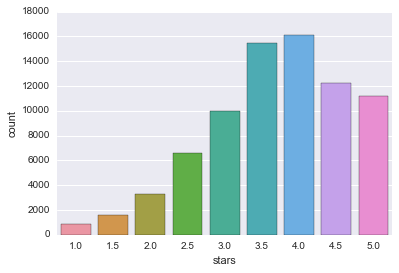

In [3]:
import seaborn as sns
%matplotlib inline
#sns.distplot(rest_data_df['stars']);
ax = sns.countplot(x='stars', data=data_df)

In [42]:
import matplotlib.pyplot as plt
plt.scatter(rest_data_df['Good For Dancing'], rest_data_df['stars'], s =  )

SyntaxError: invalid syntax (<ipython-input-42-9b6c6ec6a51b>, line 2)